# FullProgramTime.ipynb - Comprehensive Analysis Guide

## Table of Contents
1. [Introduction](#introduction)
2. [Data Preparation](#data-preparation)
   - [Library Imports](#library-imports)
   - [AWS Configuration](#aws-configuration)
   - [Data Loading](#data-loading)
   - [Data Preprocessing](#data-preprocessing)
3. [Data Integration and Processing](#data-integration-and-processing)
   - [DynamoDB Integration](#dynamodb-integration)
   - [Data Cleaning](#data-cleaning)
   - [Program Summarization](#program-summarization)
4. [Analysis and Insights](#analysis-and-insights)
   - [Thickness Return Analysis](#thickness-return-analysis)
   - [Time Period Analysis](#time-period-analysis)
   - [Metrics Distribution](#metrics-distribution)
   - [Outlier Detection](#outlier-detection)
5. [Visualization](#visualization)
   - [Downtime Analysis](#downtime-analysis)
   - [Program Comparison](#program-comparison)
   - [Dashboard Creation](#dashboard-creation)
   - [Date Range Selection](#date-range-selection)
6. [Advanced Analysis](#advanced-analysis)
   - [Velocity Calculation](#velocity-calculation)
   - [Material Property Analysis](#material-property-analysis)
   - [Material Usage Patterns](#material-usage-patterns)
7. [Configurable Parameters](#configurable-parameters)
8. [Conclusion](#conclusion)

<a id="introduction"></a>
## Introduction
The FullProgramTime.ipynb notebook provides a comprehensive analysis of laser cutting operations, focusing on time efficiency, material usage, and process optimization. The notebook integrates data from multiple sources, performs detailed statistical analysis, and creates sophisticated visualizations to identify patterns, inefficiencies, and opportunities for improvement in the manufacturing process.

<a id="data-preparation"></a>
## Data Preparation

<a id="library-imports"></a>
### Library Imports
The notebook begins by importing necessary libraries for data manipulation, visualization, and statistical analysis:
- Data handling: `pandas`, `numpy`, `boto3`
- Visualization: `matplotlib`, `seaborn`
- Statistical analysis: `sklearn`, `scipy`
- Custom modules from the project's source code

<a id="aws-configuration"></a>
### AWS Configuration
AWS session is configured to access DynamoDB tables containing operational data:
```python
session = boto3.Session(profile_name='kubeprofile', region_name='us-east-1')
```

<a id="data-loading"></a>
### Data Loading
Data is loaded from June 2024 to the current date using a custom function:
```python
combined_data = read_all_months_since(2024, 6)
```

<a id="data-preprocessing"></a>
### Data Preprocessing
Initial data preprocessing includes standardizing program IDs by ensuring they start with '0':
```python
combined_data['Programa'] = combined_data['Programa'].apply(lambda x: '0' + str(x) if not str(x).startswith('0') else str(x))
```

<a id="data-integration-and-processing"></a>
## Data Integration and Processing

<a id="dynamodb-integration"></a>
### DynamoDB Integration
The notebook integrates data from DynamoDB tables using a custom function `get_all_items_from_table()` that retrieves all items from a specified table. This data is then converted to a pandas DataFrame for analysis.

<a id="data-cleaning"></a>
### Data Cleaning
Data cleaning operations include:
- Normalizing program IDs by removing '.NC' and leading zeros
- Updating missing values for cutting length and material thickness
- Handling missing data by mapping values from the laser_close_df

<a id="program-summarization"></a>
### Program Summarization
The notebook includes functions for summarizing program data:
- `summarise_programsT()`: Summarizes program data with chronologically ordered results
- `summarise_programs()`: Similar function with filtering by year and month
- Both functions calculate real time, downtime between programs, and handle weekend off-hours

<a id="analysis-and-insights"></a>
## Analysis and Insights

<a id="thickness-return-analysis"></a>
### Thickness Return Analysis
The `analyze_thickness_returns()` function detects inefficiencies in material thickness changes:
- Analyzes returns to previously used thicknesses in sliding time windows
- Counts errors when returning to a thickness after switching to a different one
- Creates Harvard-style visualizations of error distributions
- Provides comprehensive statistics on thickness change patterns

<a id="time-period-analysis"></a>
### Time Period Analysis
The `process_machining_times_by_period()` function analyzes machining times by period:
- Calculates delay time and day/night distribution
- Filters data by year and month
- Distinguishes between day shift (7:00-21:00) and night shift hours
- Provides summary statistics for each time period

<a id="metrics-distribution"></a>
### Metrics Distribution
The `plot_metrics_distribution()` function creates sophisticated visualizations of time metrics:
- Handles outliers using z-score method
- Creates publication-quality Gaussian distribution plots
- Calculates correlations between different time metrics
- Provides comprehensive statistical summaries for each metric

<a id="outlier-detection"></a>
### Outlier Detection
The notebook includes window-based analysis for outlier detection:
- Uses 5-day windows to analyze thickness returns
- Identifies patterns and anomalies in the data
- Provides detailed visualizations of outliers

<a id="visualization"></a>
## Visualization

<a id="downtime-analysis"></a>
### Downtime Analysis
The `plot_downtime_analysis()` function creates visualizations of downtime patterns:
- Analyzes periods when the machine is not operating
- Limits visualization to a maximum downtime (default 24 hours)
- Identifies potential inefficiencies in the production schedule

<a id="program-comparison"></a>
### Program Comparison
The `plot_program_comparison()` function compares performance across different programs:
- Analyzes the top N programs by various metrics
- Provides insights into which programs are most efficient/inefficient
- Helps identify opportunities for program optimization

<a id="dashboard-creation"></a>
### Dashboard Creation
Multiple dashboard creation functions provide comprehensive views of the data:
- `plot_tiempo_dashboard()`: Creates a basic dashboard for a specific year and month
- `plot_tiempo_dashboard_enhance()`: Creates an enhanced dashboard with additional metrics
- Dashboards can be saved as high-resolution images for reporting

<a id="date-range-selection"></a>
### Date Range Selection
The `plot_tiempo_range()` function allows analysis across multiple months:
- Plots data between specified start and end dates
- Provides trend analysis over longer time periods
- Helps identify seasonal patterns or long-term improvements/degradations

<a id="advanced-analysis"></a>
## Advanced Analysis

<a id="velocity-calculation"></a>
### Velocity Calculation
The `velocity_from_df()` function calculates cutting velocity:
- Computes meters per minute for each material thickness
- Groups data by year, month, and material thickness
- Creates a structured dictionary of velocities for visualization
- The `plot_velocity()` function visualizes these velocity patterns

<a id="material-property-analysis"></a>
### Material Property Analysis
The notebook includes functions for analyzing material properties:
- `detect_outliers_regression()`: Detects outliers using regression analysis
- `plot_outliers_detailed()`: Creates detailed visualizations of outliers
- Helps identify anomalies in material processing

<a id="material-usage-patterns"></a>
### Material Usage Patterns
The `create_espesor_analysis_plots()` function analyzes material thickness usage patterns:
- Reads data from an Excel file
- Creates visualizations of material usage over time
- Helps optimize inventory and production planning

<a id="configurable-parameters"></a>
## Configurable Parameters
The notebook includes several warning sections highlighting configurable parameters:
- Year (`año`) and month (`mes`) variables must be changed to analyze different periods
- These parameters determine the time period analyzed in graphs and calculations
- Multiple instances of these parameters appear throughout the notebook for different analyses

<a id="conclusion"></a>
## Conclusion
The FullProgramTime.ipynb notebook provides a comprehensive toolkit for analyzing laser cutting operations. By integrating data from multiple sources, performing detailed statistical analysis, and creating sophisticated visualizations, the notebook helps identify inefficiencies, optimize processes, and improve overall manufacturing performance.

The analysis focuses on several key areas:
1. Time efficiency (real time, downtime, delay time)
2. Material usage (thickness patterns, velocity by thickness)
3. Operational patterns (day/night distribution, weekend operations)
4. Program performance (comparison between programs, outlier detection)

By adjusting the configurable parameters, users can analyze different time periods and gain insights specific to their operational needs.

In [4]:
## Import Libraries
import pandas as pd
from pathlib import Path
import os
# Data
from src.data.loader import read_all_rtf_in_dir
#Plots
from src.visualization.program_plots import plot_program_comparison
from src.visualization.downtime_plots import plot_downtime_analysis
from src.visualization.dashboard import plot_tiempo_dashboard
from src.visualization.time_range import plot_tiempo_range
from src.visualization.velocity import plot_velocity
from src.analysis.outliers import detect_outliers_regression
from src.visualization.material import create_espesor_analysis_plots
from src.visualization.plot_enhance import plot_tiempo_dashboard_enhance
from src.visualization.plot_metrics_distribution import plot_metrics_distribution
from src.visualization.plot_outliers_detailed import plot_outliers_detailed

# utils
from src.utils.update_missing_values import update_missing_values
from src.utils.summarise_programsT import summarise_programsT
from src.utils.process_machining_times_by_period import process_machining_times_by_period
from src.utils.summarise_programs import summarise_programs
from src.utils.velocity_from_df import velocity_from_df

In [5]:
# Read all data from June 2024 to current date
combined_data = read_all_rtf_in_dir()


Found 0 RTF files to process

Successfully processed 0 files


In [6]:
## Program ID Standardization
combined_data['Programa'] = combined_data['Programa'].apply(lambda x: '0' + str(x) if not str(x).startswith('0') else str(x))
# combined_data[(combined_data['Year']==2025) & (combined_data['Month']==7) & (combined_data['Day']==18)]

In [7]:
# Filter data for program 23546
df_filter_cnc = combined_data[(combined_data['Year']==2025) & (combined_data['Month']==7)]
explicit_df = df_filter_cnc[df_filter_cnc["Programa"].str.contains('23599', na=False)]

# Convert Timestamp column to datetime format
explicit_df = explicit_df.copy()
explicit_df['Timestamp'] = pd.to_datetime(explicit_df['Timestamp'])


# Sort by timestamp to ensure proper ordering
explicit_df = explicit_df.sort_values('Timestamp')

# Calculate total cutting time in hours
total_cutting_time_hours = explicit_df['Tiempo'].sum() / 3600

# Find the maximum and minimum timestamp values
max_timestamp = explicit_df['Timestamp'].max()
min_timestamp = explicit_df['Timestamp'].min()

# Calculate the difference and convert to hours
time_difference = max_timestamp - min_timestamp
time_difference_hours = time_difference.total_seconds() / 3600

# Display results
print(f"Tiempo corte Hr: {total_cutting_time_hours:.2f}")
print(f"HORA DE INICIO: {min_timestamp}")
print(f"Hora de TERMINO: {max_timestamp}")

print(f"TIEMPO CRONOLICO: {time_difference_hours:.2f} hours")

Tiempo corte Hr: 0.95
HORA DE INICIO: 2025-07-15 09:19:49
Hora de TERMINO: 2025-07-15 10:38:54
TIEMPO CRONOLICO: 1.32 hours


## 2. Data Integration and Processing
### 2.1 DynamoDB Integration

## Data Normalization
The `update_missing_values` function updates missing values in a DataFrame by matching program IDs with a reference dataset from laser cutting operations. It:
1. Normalizes program names by removing '.NC' extensions and leading zeros
2. Creates mappings for cutting length (metros) and material thickness (espesor) from the reference data
3. Updates missing values in target columns using these mappings
4. Removes any rows where matches couldn't be found
5. Returns the cleaned DataFrame with updated values
6. Add the Espesor, Longitud de corte, Timepo

This function is crucial for maintaining data completeness by filling gaps in cutting parameters using verified reference data.

## 3. Analysis and Insights
### 3.1 Thickness Return Analysis

## Day/Night Distribution Analysis
The `process_machining_times_by_period` function analyzes machining times distribution between day and night shifts. It processes timestamps to calculate real-time operations, delays, and work distribution across shifts (day: 7:00-21:00, night: 21:00-7:00). The function can filter data by specific year and month, providing detailed statistics including total hours per shift, average delays, and operational efficiency metrics. It returns a DataFrame with columns for real time, downtime, delay time, day/night hours, and temporal identifiers, along with a comprehensive period summary report.

<div style="background-color: #FFEB3B; color: #D32F2F; padding: 15px; border: 3px solid #F44336; border-radius: 10px; margin: 10px 0;">
    <h2 style="color: #D32F2F; text-align: center; margin: 0;">⚠️ ¡ATENCIÓN! ⚠️</h2>
    <h3 style="color: #D32F2F; text-align: center; margin: 10px 0;">PARÁMETROS CONFIGURABLES</h3>
    <p style="font-size: 16px; font-weight: bold; text-align: center;">
        Es <u>OBLIGATORIO</u> cambiar las variables <code>año</code> y <code>mes</code> para analizar diferentes periodos.
    </p>
    <p style="font-size: 14px; text-align: center;">
        Estas variables determinan el periodo de tiempo que será analizado en los gráficos y cálculos.
    </p>
</div>

### 3.3 Metrics Distribution

## Historical Data Loading
The `read_all_months_since` function processes RTF log files from a specified start date until the current date. It iteratively reads and processes monthly data files from the logs directory, filters relevant machining operations, and combines them into a single dataset. The function handles file paths dynamically using project root directory detection, processes RTF files month by month using read_all_rtf_in_dir utility, filters machining-related data, and combines all monthly results into a comprehensive DataFrame. The processed data is saved in CSV format for further analysis.

df_june_2025

### 3.4 Outlier Detection

## Return Pattern Detection
The `analyze_thickness_returns` function analyzes material thickness change patterns to identify inefficient sequencing in manufacturing processes. Using sliding time windows, it tracks when the process returns to previously used thicknesses after switching to different ones. For example, in a sequence 8,8,8,10,12,8,12,12,8,10, thickness 8 has two errors (reappears twice), while thicknesses 10 and 12 have one error each. The function creates Harvard-style visualizations showing error distributions and detailed statistics, helping optimize production scheduling and reduce unnecessary material thickness changes.

In [13]:
## Window-Based Analysis
# analysis_results = analyze_thickness_returns(df_june_2025, window_days=5)

## Program Summarization Function
The `summarise_programs` function analyzes manufacturing programs chronologically to generate time-based performance metrics. It processes program execution data with these key features:

### Parameters
- **DataFrame input**: Contains program execution data with timestamps
- **Optional filtering**: Can filter by year and/or month
- **Weekend handling**: Excludes off-hours (Friday 16:00 to Sunday 21:00)

### Key Calculations
1. **Program Duration**
   - Total time per program
   - Real execution time
   - Start/end timestamps

2. **Downtime Analysis**
   - Time between consecutive programs
   - Automatic weekend gap exclusion
   - Zero downtime assignment for last program

### Output Format
Returns a DataFrame with columns:
- `Tiempo`: Total execution time
- `Hora_Inicio`: Program start timestamp
- `Hora_Final`: Program end timestamp
- `Tiempo_Real`: Actual duration in hours
- `Tiempo_detenido`: Downtime between programs

This function is essential for identifying operational inefficiencies and optimizing production scheduling by providing detailed program execution metrics and highlighting gaps in production.

<div style="background-color: #FFEB3B; color: #D32F2F; padding: 15px; border: 3px solid #F44336; border-radius: 10px; margin: 10px 0;">
    <h2 style="color: #D32F2F; text-align: center; margin: 0;">⚠️ ¡ATENCIÓN! ⚠️</h2>
    <h3 style="color: #D32F2F; text-align: center; margin: 10px 0;">PARÁMETROS CONFIGURABLES</h3>
    <p style="font-size: 16px; font-weight: bold; text-align: center;">
        Es <u>OBLIGATORIO</u> cambiar las variables <code>año</code> y <code>mes</code> para analizar diferentes periodos.
    </p>
    <p style="font-size: 14px; text-align: center;">
        Estas variables determinan el periodo de tiempo que será analizado en los gráficos y cálculos.
    </p>
</div>

In [8]:
# Variables
año = 2025
mes = 7
# For a specific year and month
june_2025_summary = summarise_programs(combined_data, year=año, month=mes)
inicial_programs = len(june_2025_summary)
june_2025_summary= june_2025_summary[june_2025_summary['Tiempo_detenido']>0]
pp = f"Total programs loss: {inicial_programs - len(june_2025_summary)}"
print(pp)
june_2025_summary

Total programs loss: 4


Tiempo         Hora_Inicio          Hora_Final  \
Programa                                                                      
022527.NC                   2325.26 2025-07-04 08:19:39 2025-07-04 09:08:12   
022532.NC                    715.10 2025-07-04 12:55:37 2025-07-04 13:25:57   
022533.NC                   9060.69 2025-07-08 13:04:36 2025-07-08 16:11:49   
022537.NC                   4986.97 2025-07-03 16:57:26 2025-07-03 18:48:55   
022748.NC                   6597.11 2025-07-01 17:28:42 2025-07-01 19:32:40   
022750.NC                  13217.28 2025-07-03 08:13:37 2025-07-03 12:14:33   
022772.NC                    279.58 2025-07-04 10:38:55 2025-07-04 10:51:09   
022774.NC                    978.36 2025-07-09 14:24:40 2025-07-09 14:55:22   
022798.NC                    914.30 2025-07-04 09:17:32 2025-07-04 09:42:07   
022800.NC                   1024.75 2025-07-04 10:05:23 2025-07-04 10:35:06   
022801.NC                   3516.76 2025-07-04 11:15:45 2025-07-04 12:31:38   
022919.NC                    336.53 2025-07-09 09:48:39 2025-07-09 10:04:34   
022923.NC                    175.08 2025-07-03 19:25:12 2025-07-03 19:29:19   
022925.NC                    206.57 2025-07-03 19:09:45 2025-07-03 19:18:18   
022926.NC                    310.21 2025-07-04 13:31:53 2025-07-04 13:50:13   
023070.NC                    828.31 2025-07-03 13:46:48 2025-07-03 14:33:46   
023240.NC                    275.51 2025-07-03 14:49:09 2025-07-03 14:58:49   
023243.NC                   1212.52 2025-07-03 16:04:08 2025-07-03 16:39:16   
023244.NC                   4786.53 2025-07-09 12:32:37 2025-07-09 14:12:48   
023246.NC                   1907.87 2025-07-04 14:31:11 2025-07-04 15:17:48   
023284.NC                    626.62 2025-07-07 09:52:42 2025-07-07 10:16:08   
023320.NC                   6083.63 2025-07-08 09:53:40 2025-07-08 11:45:44   
023354.slp                  2214.92 2025-07-15 18:38:50 2025-07-15 19:27:56   
023397.NC                   5421.92 2025-07-09 16:22:45 2025-07-10 09:05:26   
023461.NC                  10162.67 2025-07-07 14:20:30 2025-07-08 09:10:22   
023462.NC                  11411.02 2025-07-07 10:30:11 2025-07-07 14:04:55   
023463.NC                    935.53 2025-07-08 09:22:13 2025-07-08 09:41:12   
023535.NC                    943.33 2025-07-14 11:07:43 2025-07-14 11:36:15   
023536.NC                   2950.36 2025-07-14 16:53:07 2025-07-14 17:58:33   
023544.NC                  16153.20 2025-07-17 10:00:32 2025-07-17 14:54:43   
023545.NC                   4422.64 2025-07-17 16:48:26 2025-07-17 18:09:41   
023546.NC                  15340.13 2025-07-15 12:18:39 2025-07-15 17:15:10   
023547.NC                    721.42 2025-07-14 12:44:34 2025-07-14 13:18:49   
023548.NC                   2475.98 2025-07-14 13:29:53 2025-07-14 14:35:53   
023583.NC                    619.25 2025-07-10 12:08:58 2025-07-10 12:28:59   
023584.NC                   1045.33 2025-07-10 11:27:30 2025-07-10 11:58:16   
023585.NC                    479.31 2025-07-10 11:02:15 2025-07-10 11:14:12   
023587.NC                     87.22 2025-07-14 15:29:14 2025-07-14 15:35:40   
023588.NC                    567.17 2025-07-18 09:27:09 2025-07-18 09:37:16   
023589.NC                    630.01 2025-07-14 14:49:57 2025-07-14 15:12:27   
023595.NC                   8244.43 2025-07-18 10:49:39 2025-07-18 14:16:09   
023596.NC                   2105.24 2025-07-14 18:39:43 2025-07-14 19:30:35   
023599.NC                   3422.22 2025-07-15 09:19:49 2025-07-15 10:38:54   
023600.NC                   1016.47 2025-07-17 08:54:43 2025-07-17 09:17:39   
023667.NC                   2445.41 2025-07-11 14:13:22 2025-07-11 15:13:27   
023669.NC                   6523.26 2025-07-14 08:25:44 2025-07-14 10:21:18   
023675.NC                    264.52 2025-07-11 12:42:14 2025-07-11 12:54:12   
023714.NC                   2464.15 2025-07-18 08:15:17 2025-07-18 09:11:33   
023715.NC                   1040.03 2025-07-17 18:54:51 2025-07-17 19:25:58   


## 4. Visualization
### 4.1 Downtime Analysis

## Downtime Analysis Visualization
The `plot_downtime_analysis` function creates a sophisticated visualization of machine downtime patterns, with these key features:

### Input Parameters
- **program_summary_df**: DataFrame containing program execution data with:
  - `Hora_Inicio`: Program start timestamps
  - `Hora_Final`: Program end timestamps
  - `Tiempo_detenido`: Downtime durations
- **max_downtime_hours**: Optional cap for maximum downtime (default: 24 hours)

### Key Features
1. **Shift Analysis**
   - Day shift (7:00 AM - 8:00 PM)
   - Night shift (8:00 PM - 7:00 AM)
   - Proportional allocation for cross-shift programs

2. **Visualization Components**
   - Stacked bar chart showing day/night distribution
   - Trend line showing total downtime
   - Weekend highlighting for pattern analysis
   - Week separators for temporal context

3. **Statistical Summary**
   - Total downtime hours
   - Average daily downtime
   - Maximum downtime periods
   - Shift distribution percentages

### Visualization Style
- Modern, high-contrast design
- Professional color scheme:
  - Day shift: Vibrant blue
  - Night shift: Deep purple
  - Total line: Bold red
  - Weekends: Light gray highlight

This visualization helps identify patterns in machine downtime and optimize scheduling by providing clear insights into operational gaps across different shifts and days.

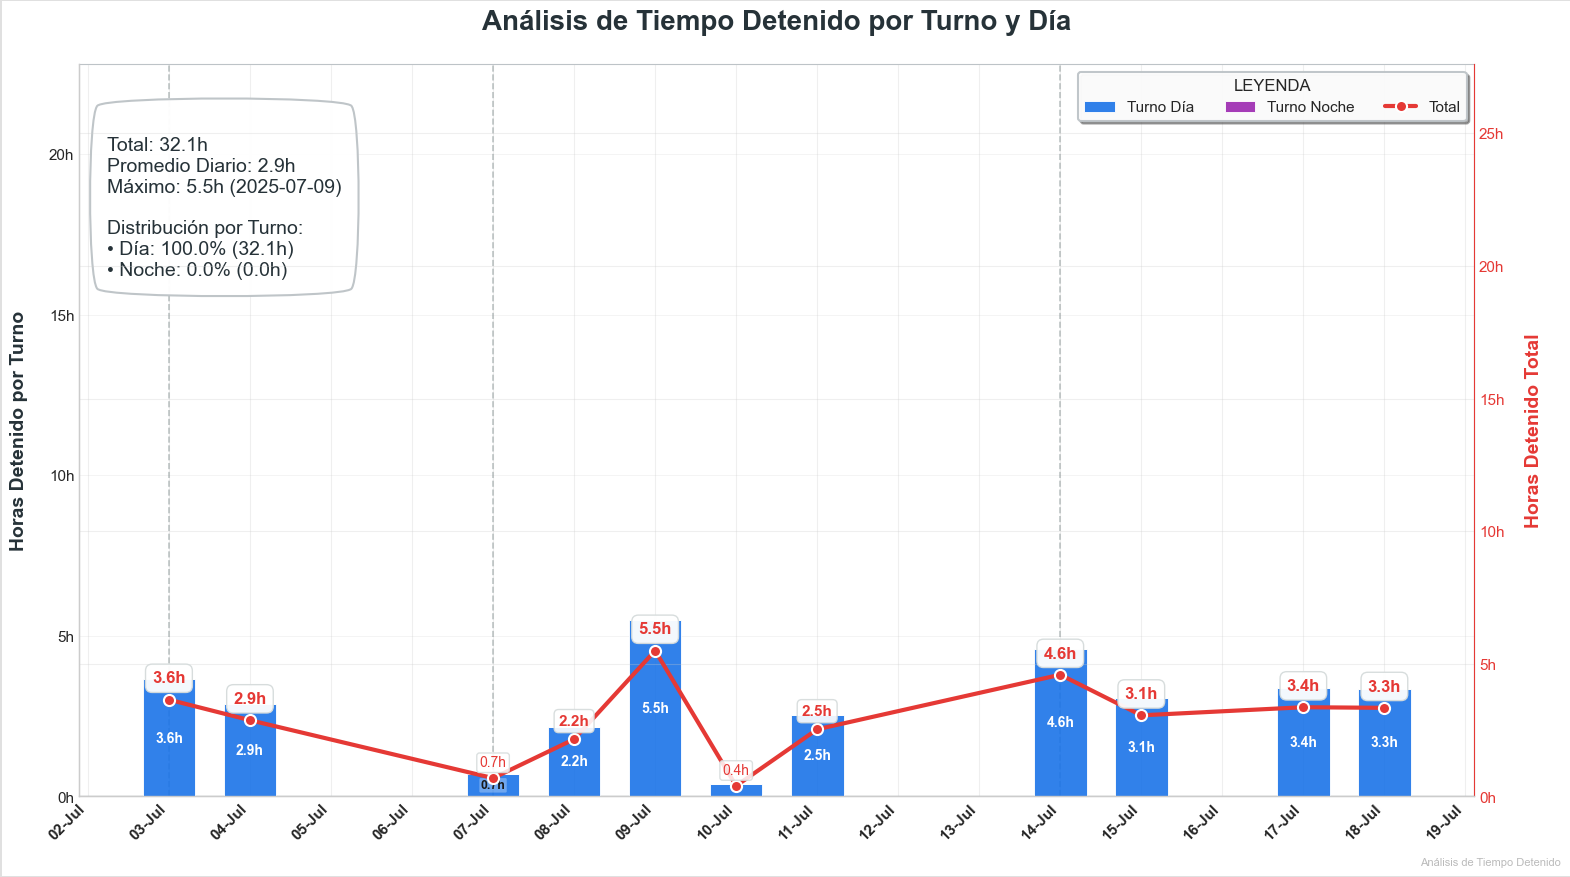

In [9]:
## Downtime Plotting
# Create the downtime analysis plot
june_2025_summary = june_2025_summary[june_2025_summary['Tiempo_detenido']<12]
fig_downtime = plot_downtime_analysis(june_2025_summary, max_downtime_hours=24)

### 4.2 Program Comparison

## Program Analysis and Visualization Functions

### 1. Program Comparison (`plot_program_comparison`)
Creates sophisticated visualizations comparing theoretical vs. actual machining times:

- **Input Parameters:**
  - `program_summary_df`: DataFrame with program data (ID, theoretical/real time)
  - `top_n`: Number of top programs to display (default: 15)

- **Key Features:**
  - Harvard-style visualization with professional color scheme
  - Stacked bar chart showing machining time and time differences
  - Statistical summary with averages and outliers
  - Interactive annotations and tooltips
  - Automatic filtering of extreme outliers (>20 hours)

### 2. Downtime Analysis (`plot_downtime_analysis`)
Generates visualizations for machine downtime patterns:

- **Input Parameters:**
  - `df`: DataFrame with downtime data
  - `max_downtime_hours`: Cap for maximum downtime (default: 24)
  - `outlier_threshold`: Optional threshold for outlier filtering

- **Features:**
  - Day/night shift breakdown
  - Weekend highlighting
  - Statistical summary box
  - Automatic outlier handling
  - Comprehensive legends and annotations

### 3. Bar Plot Creation (`create_barplot`)
Creates customizable bar plots for data visualization:

- **Input Parameters:**
  - `df`: Source DataFrame
  - `x_col`, `y_col`: Column names for plotting
  - `a`, `b`: Figure dimensions
  - `width`: Bar width
  - `text_size`: Label text size
  - `text_angle`: Label rotation angle (default: 45°)
  - `text_color`: Label color (default: "black")

- **Features:**
  - Automatic value labeling
  - Customizable formatting
  - Dynamic sizing and rotation
  - File export functionality
  - Monthly tracking

These functions provide a comprehensive toolkit for analyzing and visualizing manufacturing process data, with emphasis on time efficiency, downtime patterns, and program performance comparisons.

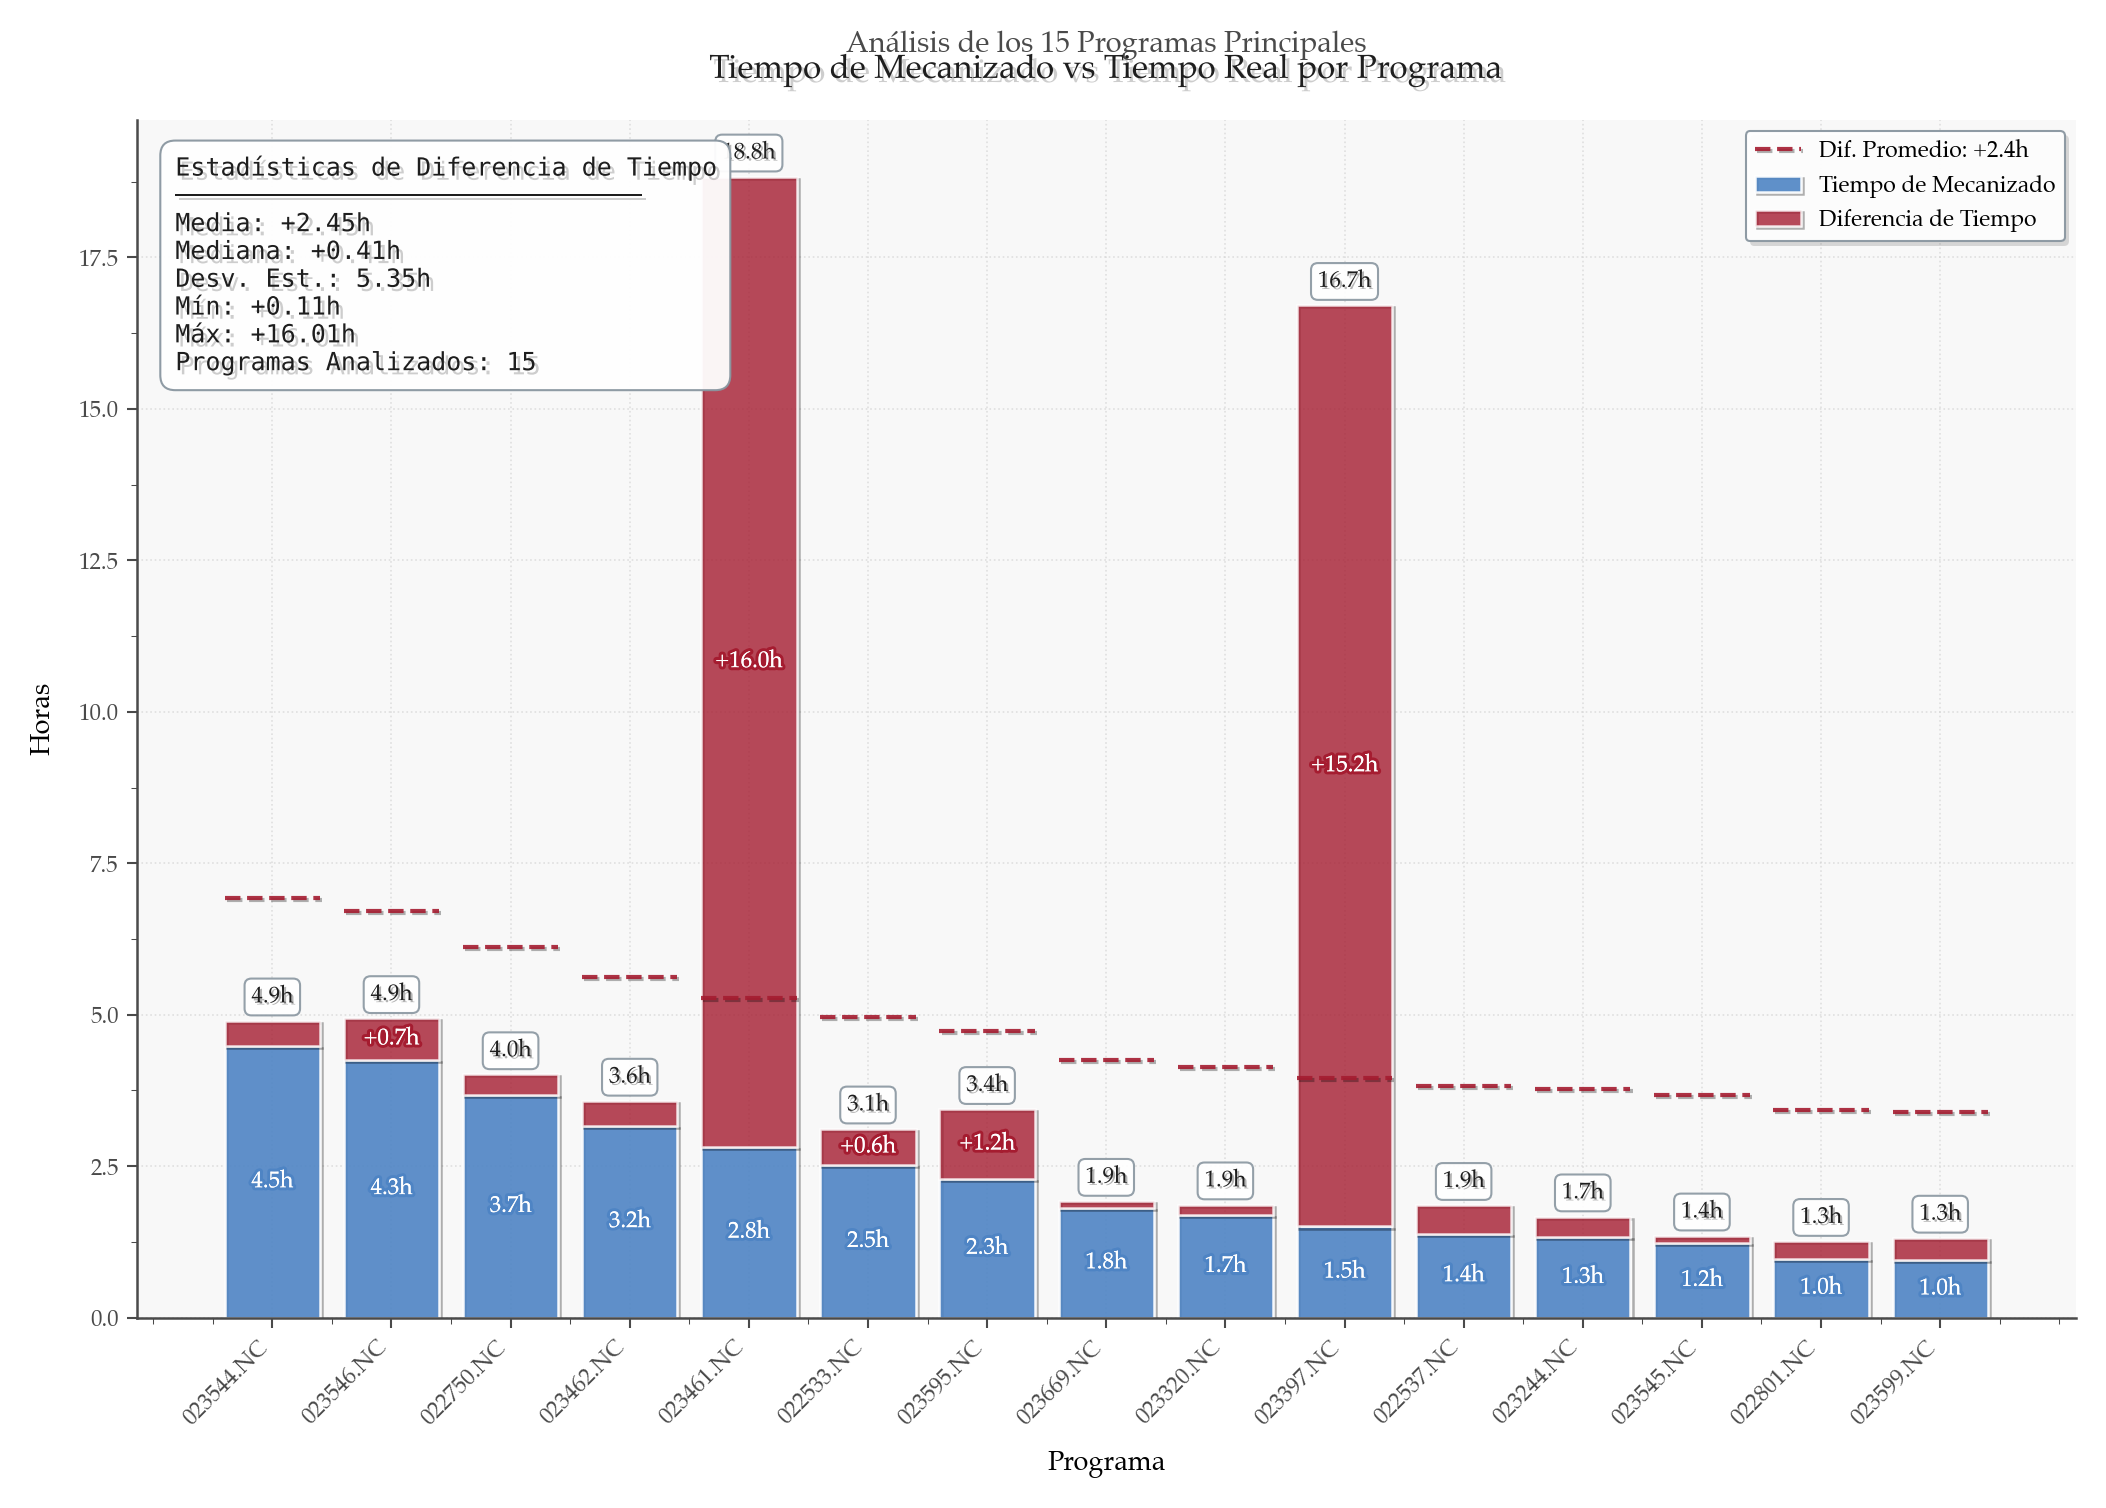

In [10]:
## Top Program Analysis
# Create the program comparison plot
fig_program = plot_program_comparison(june_2025_summary, top_n=15)

## Enhanced Time Dashboard Visualization Function

### `plot_tiempo_dashboard_enhance(df, year, month, save_dir="data_planta", display=True)`

Creates sophisticated visualizations for machining time analysis with custom week definitions and detailed statistics.

#### Parameters
- `df`: DataFrame containing machining data
- `year`: Starting year for data filtering
- `month`: Starting month for data filtering
- `save_dir`: Directory for saving output images (default: "data_planta")
- `display`: Whether to show plots in notebook (default: True)

#### Key Features

1. **Customized Time Analysis**
   - Filters data from specified month/year to current date
   - Defines custom weeks starting Sundays at 20:00
   - Handles data across multiple years

2. **Main Analysis Plot**
   - Daily machining time breakdown by shifts
   - Custom Harvard-style color scheme:
     - Day shift: Deep blue (#2c7fb8)
     - Night shift: Warm orange (#f46d43)
     - Week boundaries: Purple (#7a0177)
   - Value labels on bars showing exact hours
   - Week boundary markers at Sunday 20:00
   - Alternating background colors for better week visualization

3. **Weekly Average Plot**
   - Stacked bar chart showing average hours per week
   - Week labels including year reference
   - Comprehensive statistics for each week
   - Clear shift comparison with color coding

4. **Statistical Features**
   - Detailed summary boxes with shift totals and percentages
   - Weekly averages and trends
   - Custom week calculations considering shift changes
   - Handles missing data and outliers

#### Output
Returns a dictionary containing:
- File paths for saved visualizations
- Figure objects if display=True
- Saves high-resolution PNG files (300 DPI)

#### Usage Example

<div style="background-color: #FFEB3B; color: #D32F2F; padding: 15px; border: 3px solid #F44336; border-radius: 10px; margin: 10px 0;">
    <h2 style="color: #D32F2F; text-align: center; margin: 0;">⚠️ ¡ATENCIÓN! ⚠️</h2>
    <h3 style="color: #D32F2F; text-align: center; margin: 10px 0;">PARÁMETROS CONFIGURABLES</h3>
    <p style="font-size: 16px; font-weight: bold; text-align: center;">
        Es <u>OBLIGATORIO</u> cambiar las variables <code>año</code> y <code>mes</code> para analizar diferentes periodos.
    </p>
    <p style="font-size: 14px; text-align: center;">
        Estas variables determinan el periodo de tiempo que será analizado en los gráficos y cálculos.
    </p>
</div>

In [11]:

# Get current working directory and navigate up to project root
project_root = Path(os.getcwd()).parent.parent
output_dir = str(project_root / 'data' / 'processed' / 'plots')

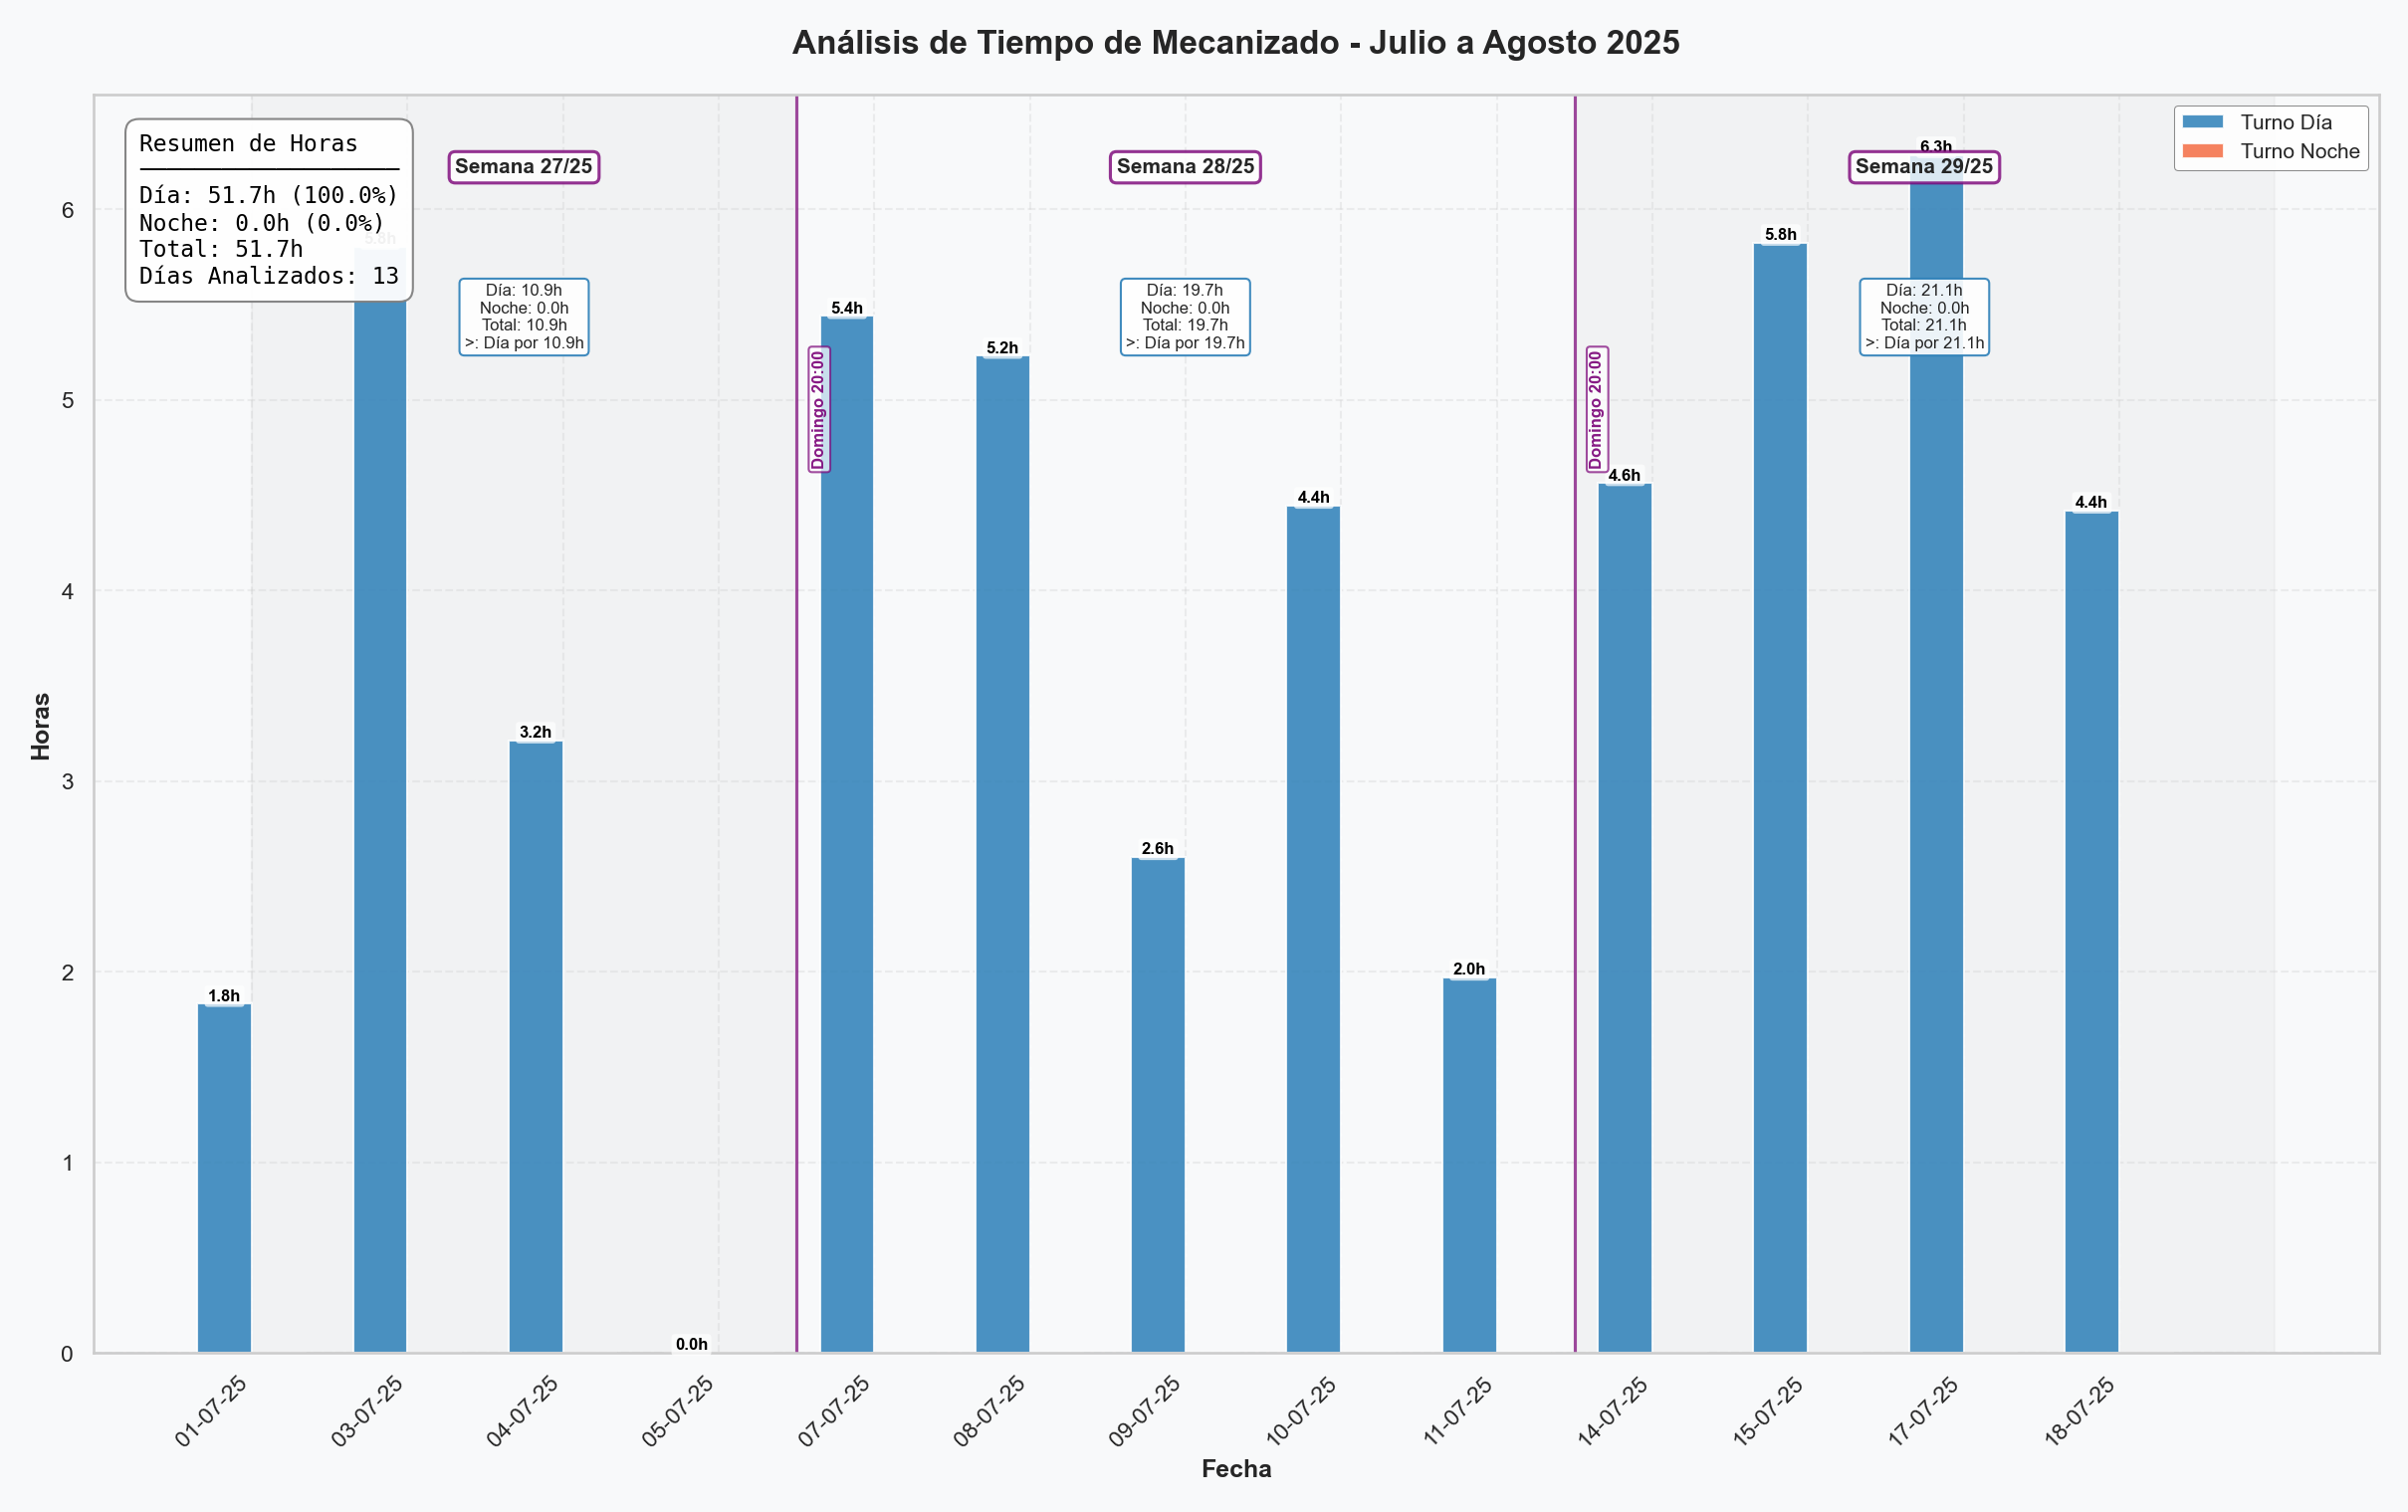

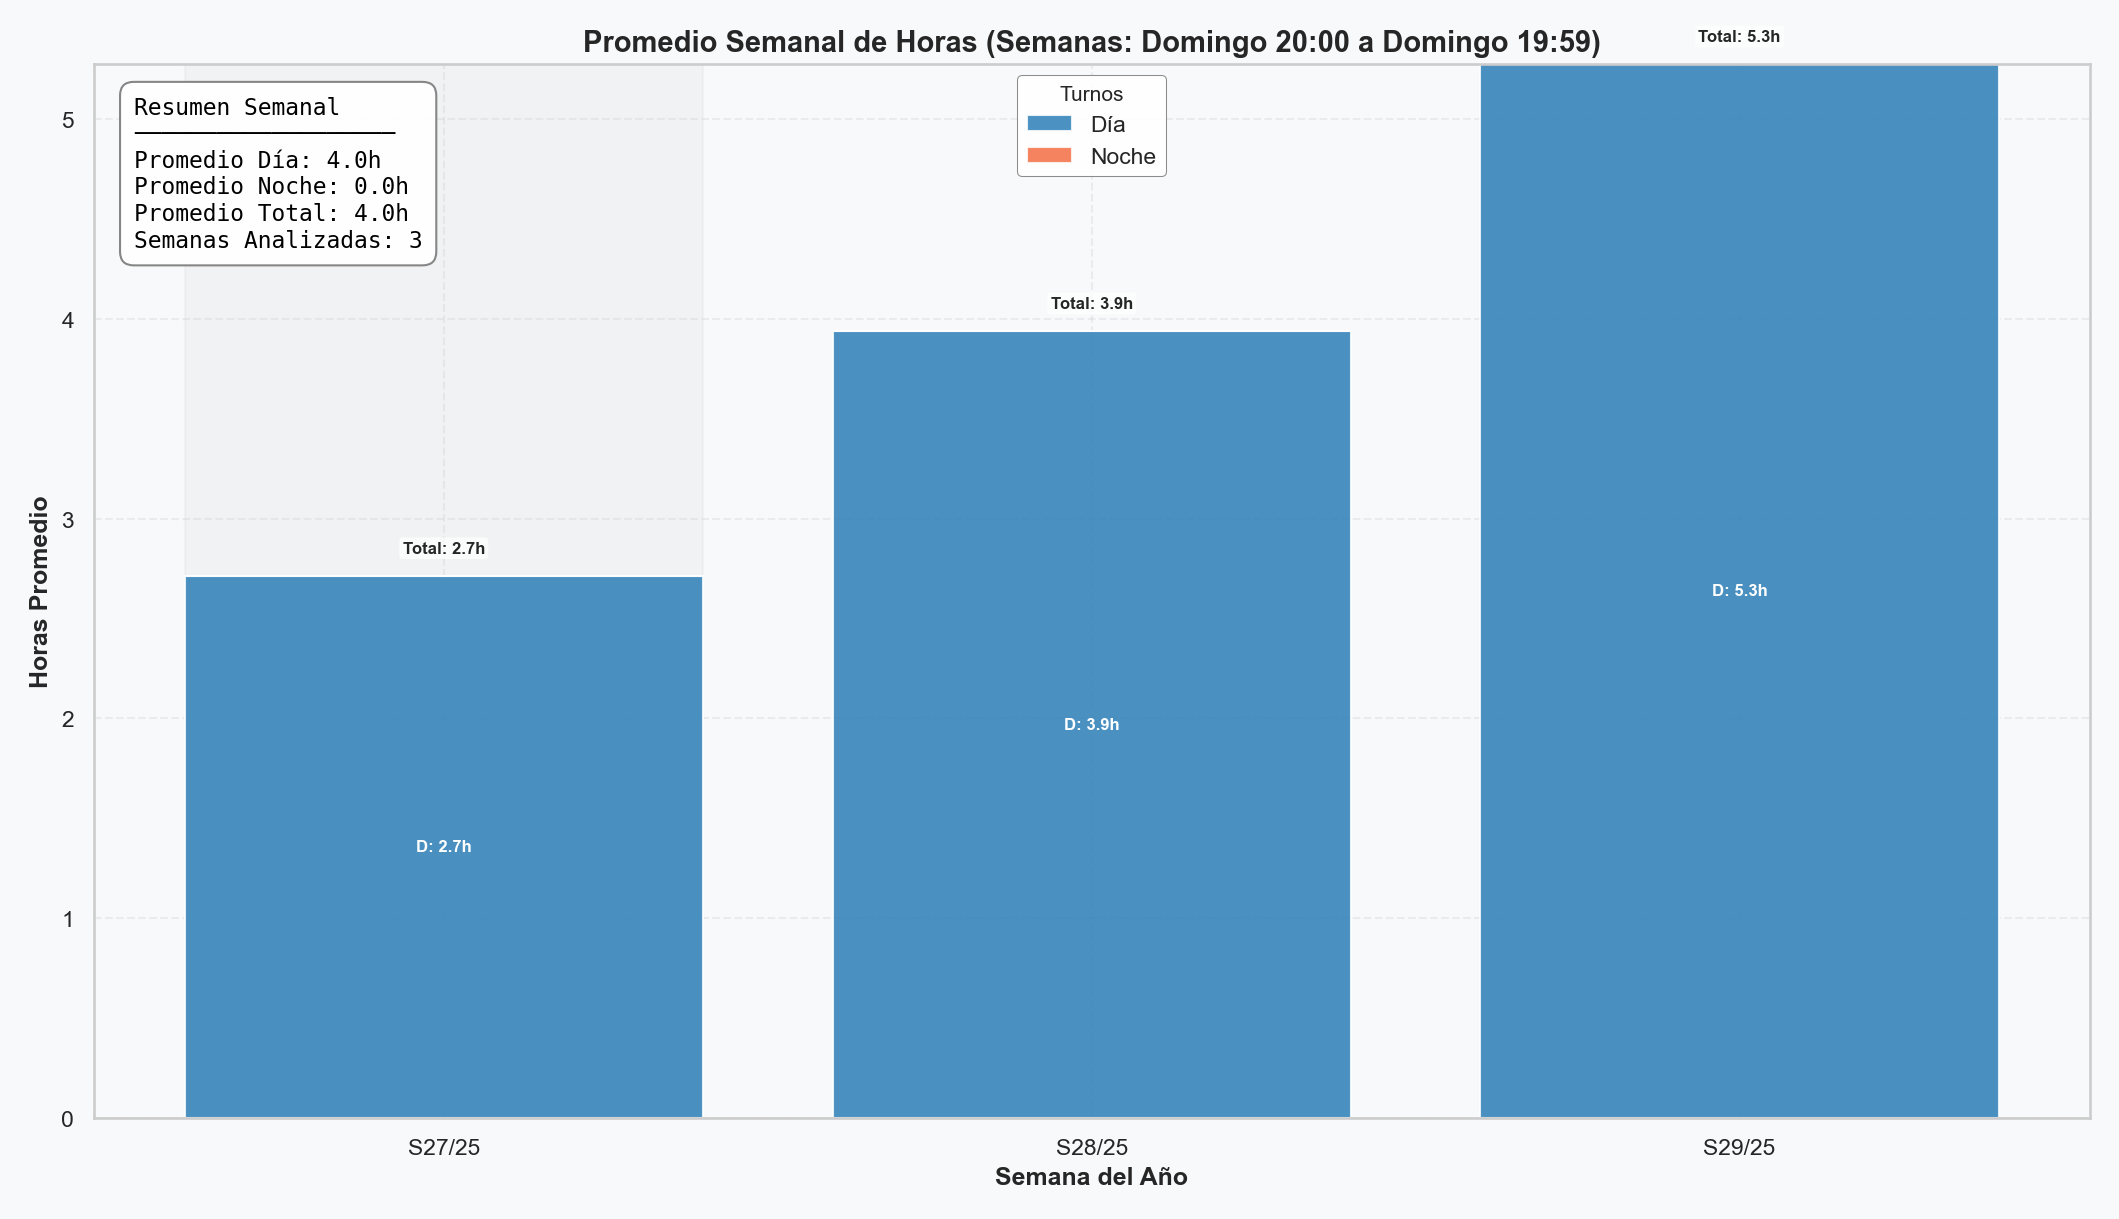

Gráficos guardados en la carpeta: /Users/joserubio/Desktop/proyectos/Kupfer/Casos/JKI/data/processed/plots


In [12]:
## Dashboard Creation Variables
año = 2025
mes = 7

fig = plot_tiempo_dashboard_enhance(combined_data, año, mes, save_dir=output_dir)

# plot_tiempo_dashboard Function

Creates a comprehensive time analysis dashboard with 8 visualizations:

1. Main Analysis Plot
- Shows day/night shift hours
- Weekly averages and trends
- Detailed hour labels

2. Stacked Bar Chart & Weekly Averages
- Daily totals by shift
- Week-by-week analysis

3. Heatmap & Day vs Night Analysis
- Daily hours by week
- Shift performance comparison

4. Program Analysis & Production Distribution
- Top programs by time
- Hourly production analysis
- Efficiency metrics

Takes DataFrame with machining data and year/month parameters. Returns figure object with integrated visualizations for analyzing machine utilization patterns and productivity metrics.

<div style="background-color: #FFEB3B; color: #D32F2F; padding: 15px; border: 3px solid #F44336; border-radius: 10px; margin: 10px 0;">
    <h2 style="color: #D32F2F; text-align: center; margin: 0;">⚠️ ¡ATENCIÓN! ⚠️</h2>
    <h3 style="color: #D32F2F; text-align: center; margin: 10px 0;">PARÁMETROS CONFIGURABLES</h3>
    <p style="font-size: 16px; font-weight: bold; text-align: center;">
        Es <u>OBLIGATORIO</u> cambiar las variables <code>año</code> y <code>mes</code> para analizar diferentes periodos.
    </p>
    <p style="font-size: 14px; text-align: center;">
        Estas variables determinan el periodo de tiempo que será analizado en los gráficos y cálculos.
    </p>
</div>

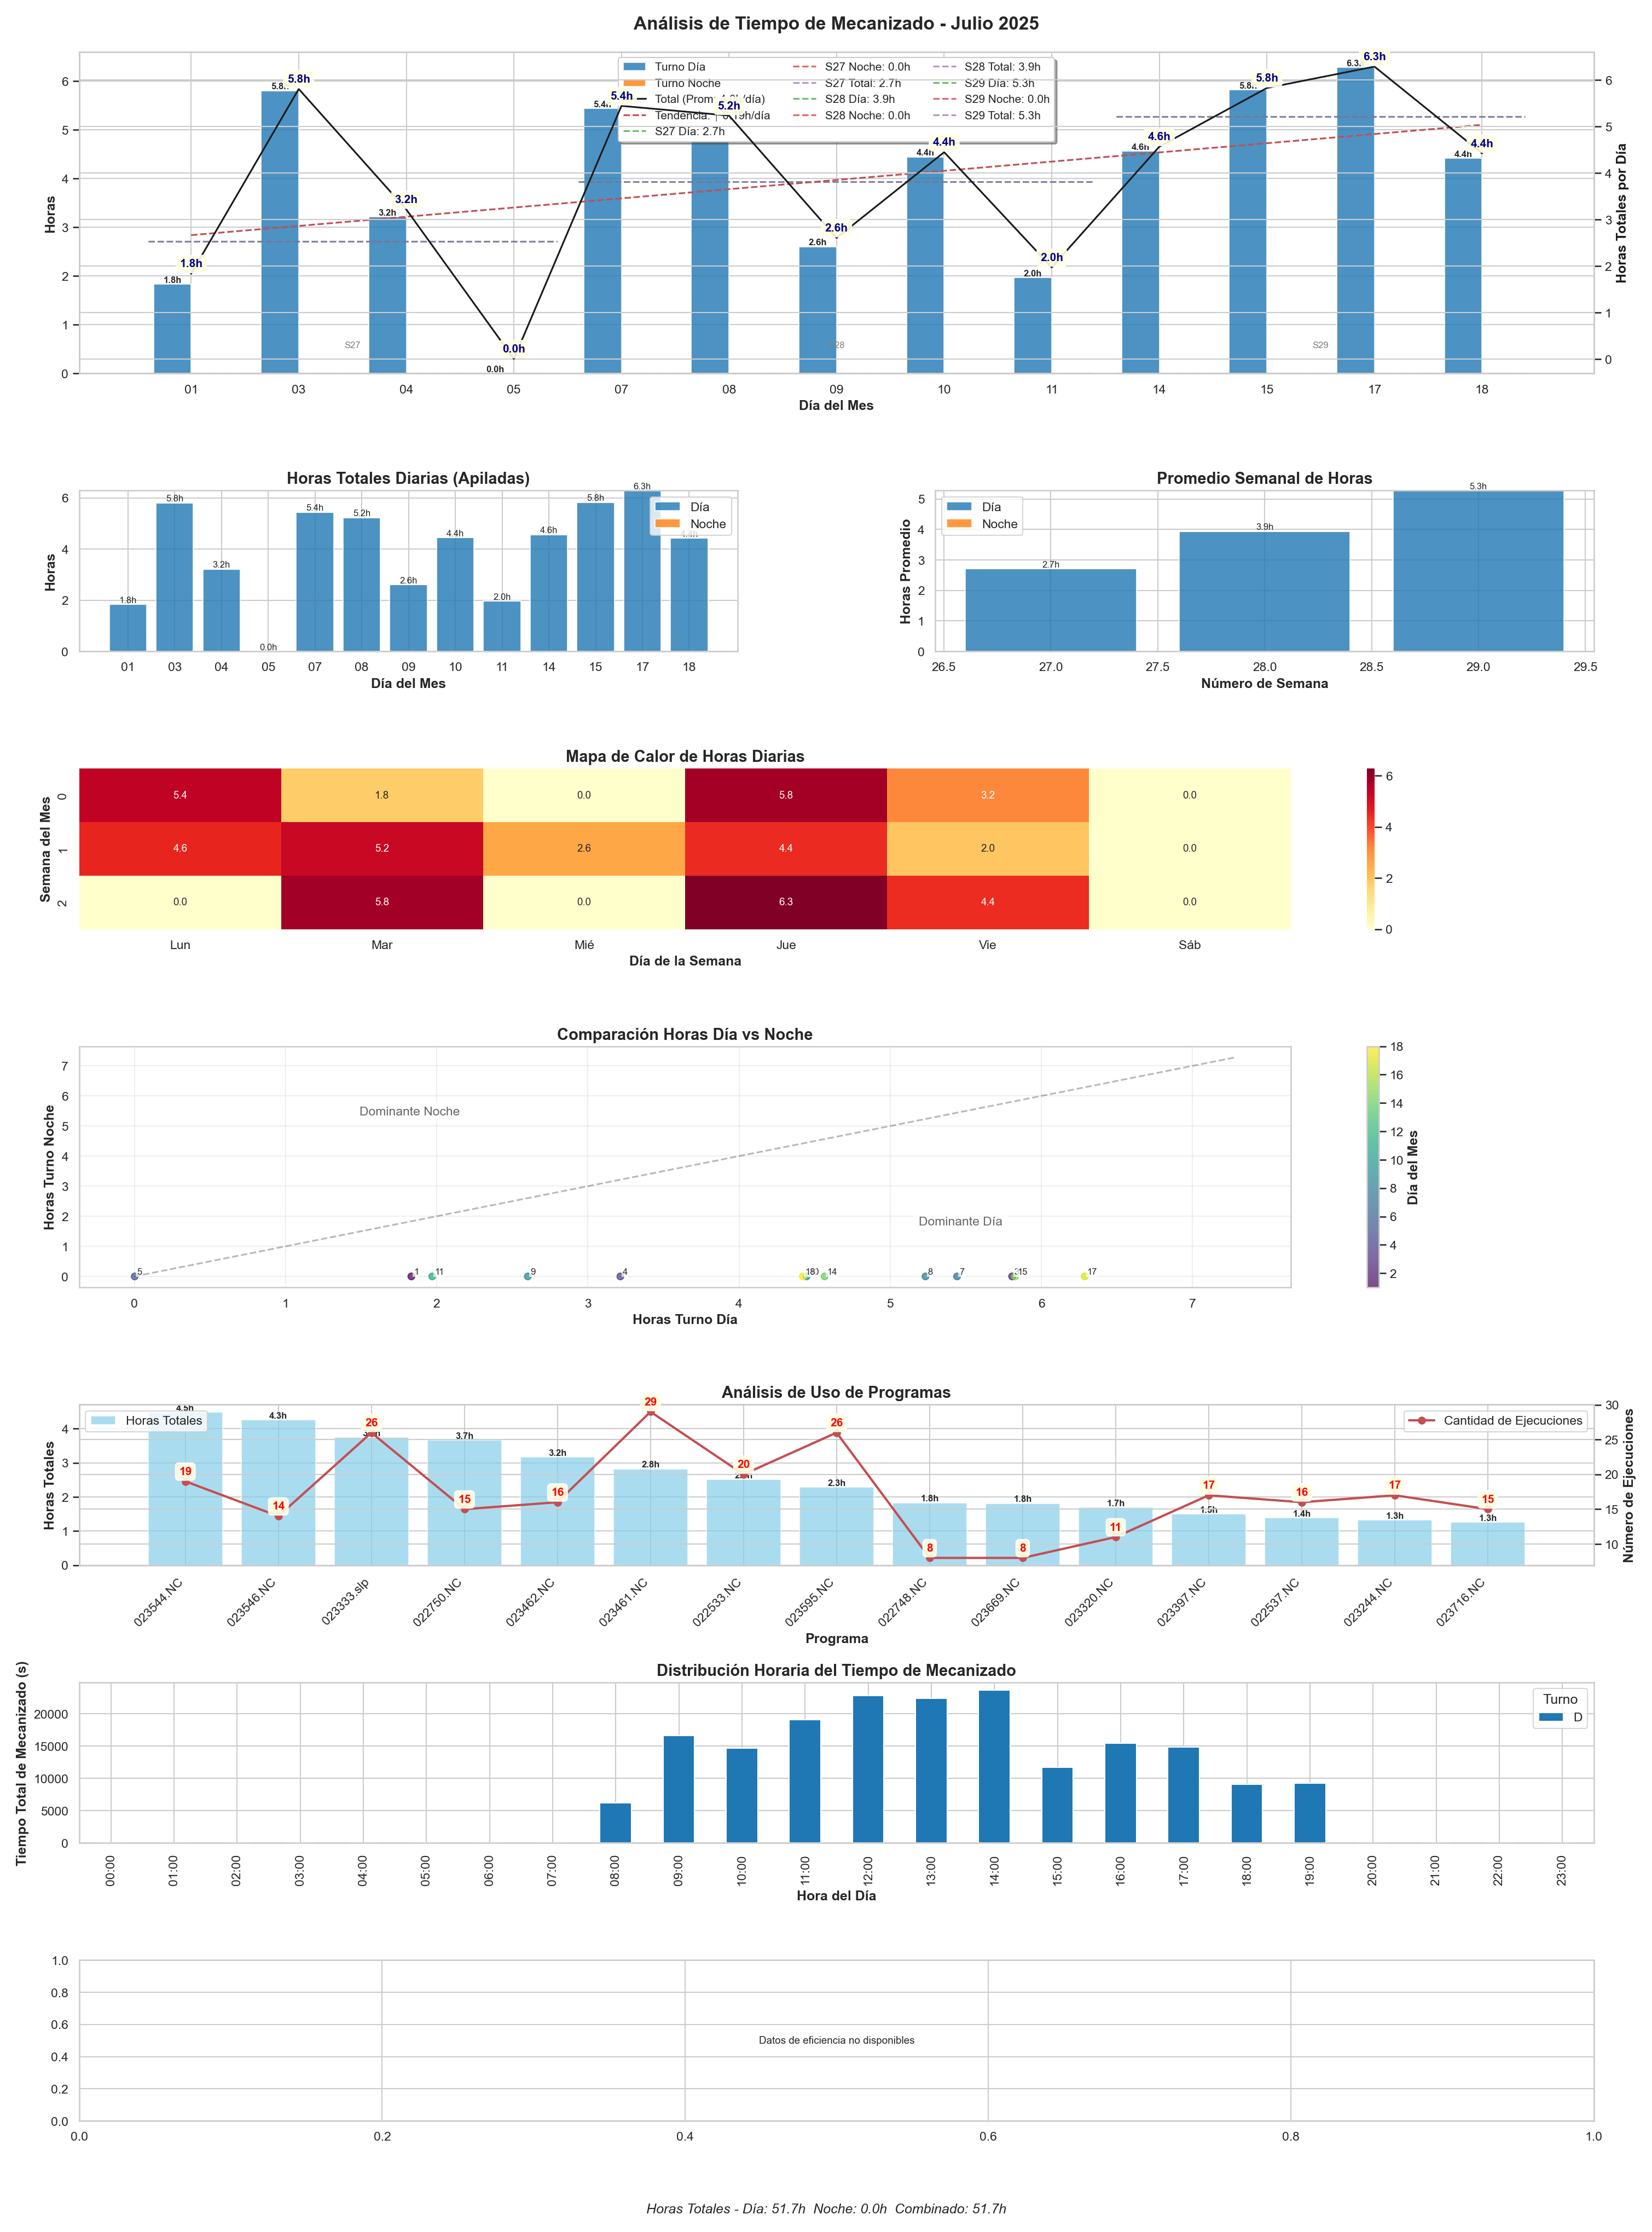

In [13]:
## Dashboard Creation
año = 2025
mes = 7
fig = plot_tiempo_dashboard(combined_data, año, mes)

<div style="background-color: #FFEB3B; color: #D32F2F; padding: 15px; border: 3px solid #F44336; border-radius: 10px; margin: 10px 0;">
    <h2 style="color: #D32F2F; text-align: center; margin: 0;">⚠️ ¡ATENCIÓN! ⚠️</h2>
    <h3 style="color: #D32F2F; text-align: center; margin: 10px 0;">PARÁMETROS CONFIGURABLES</h3>
    <p style="font-size: 16px; font-weight: bold; text-align: center;">
        Es <u>OBLIGATORIO</u> cambiar las variables <code>año</code> y <code>mes</code> para analizar diferentes periodos.
    </p>
    <p style="font-size: 14px; text-align: center;">
        Estas variables determinan el periodo de tiempo que será analizado en los gráficos y cálculos.
    </p>
</div>

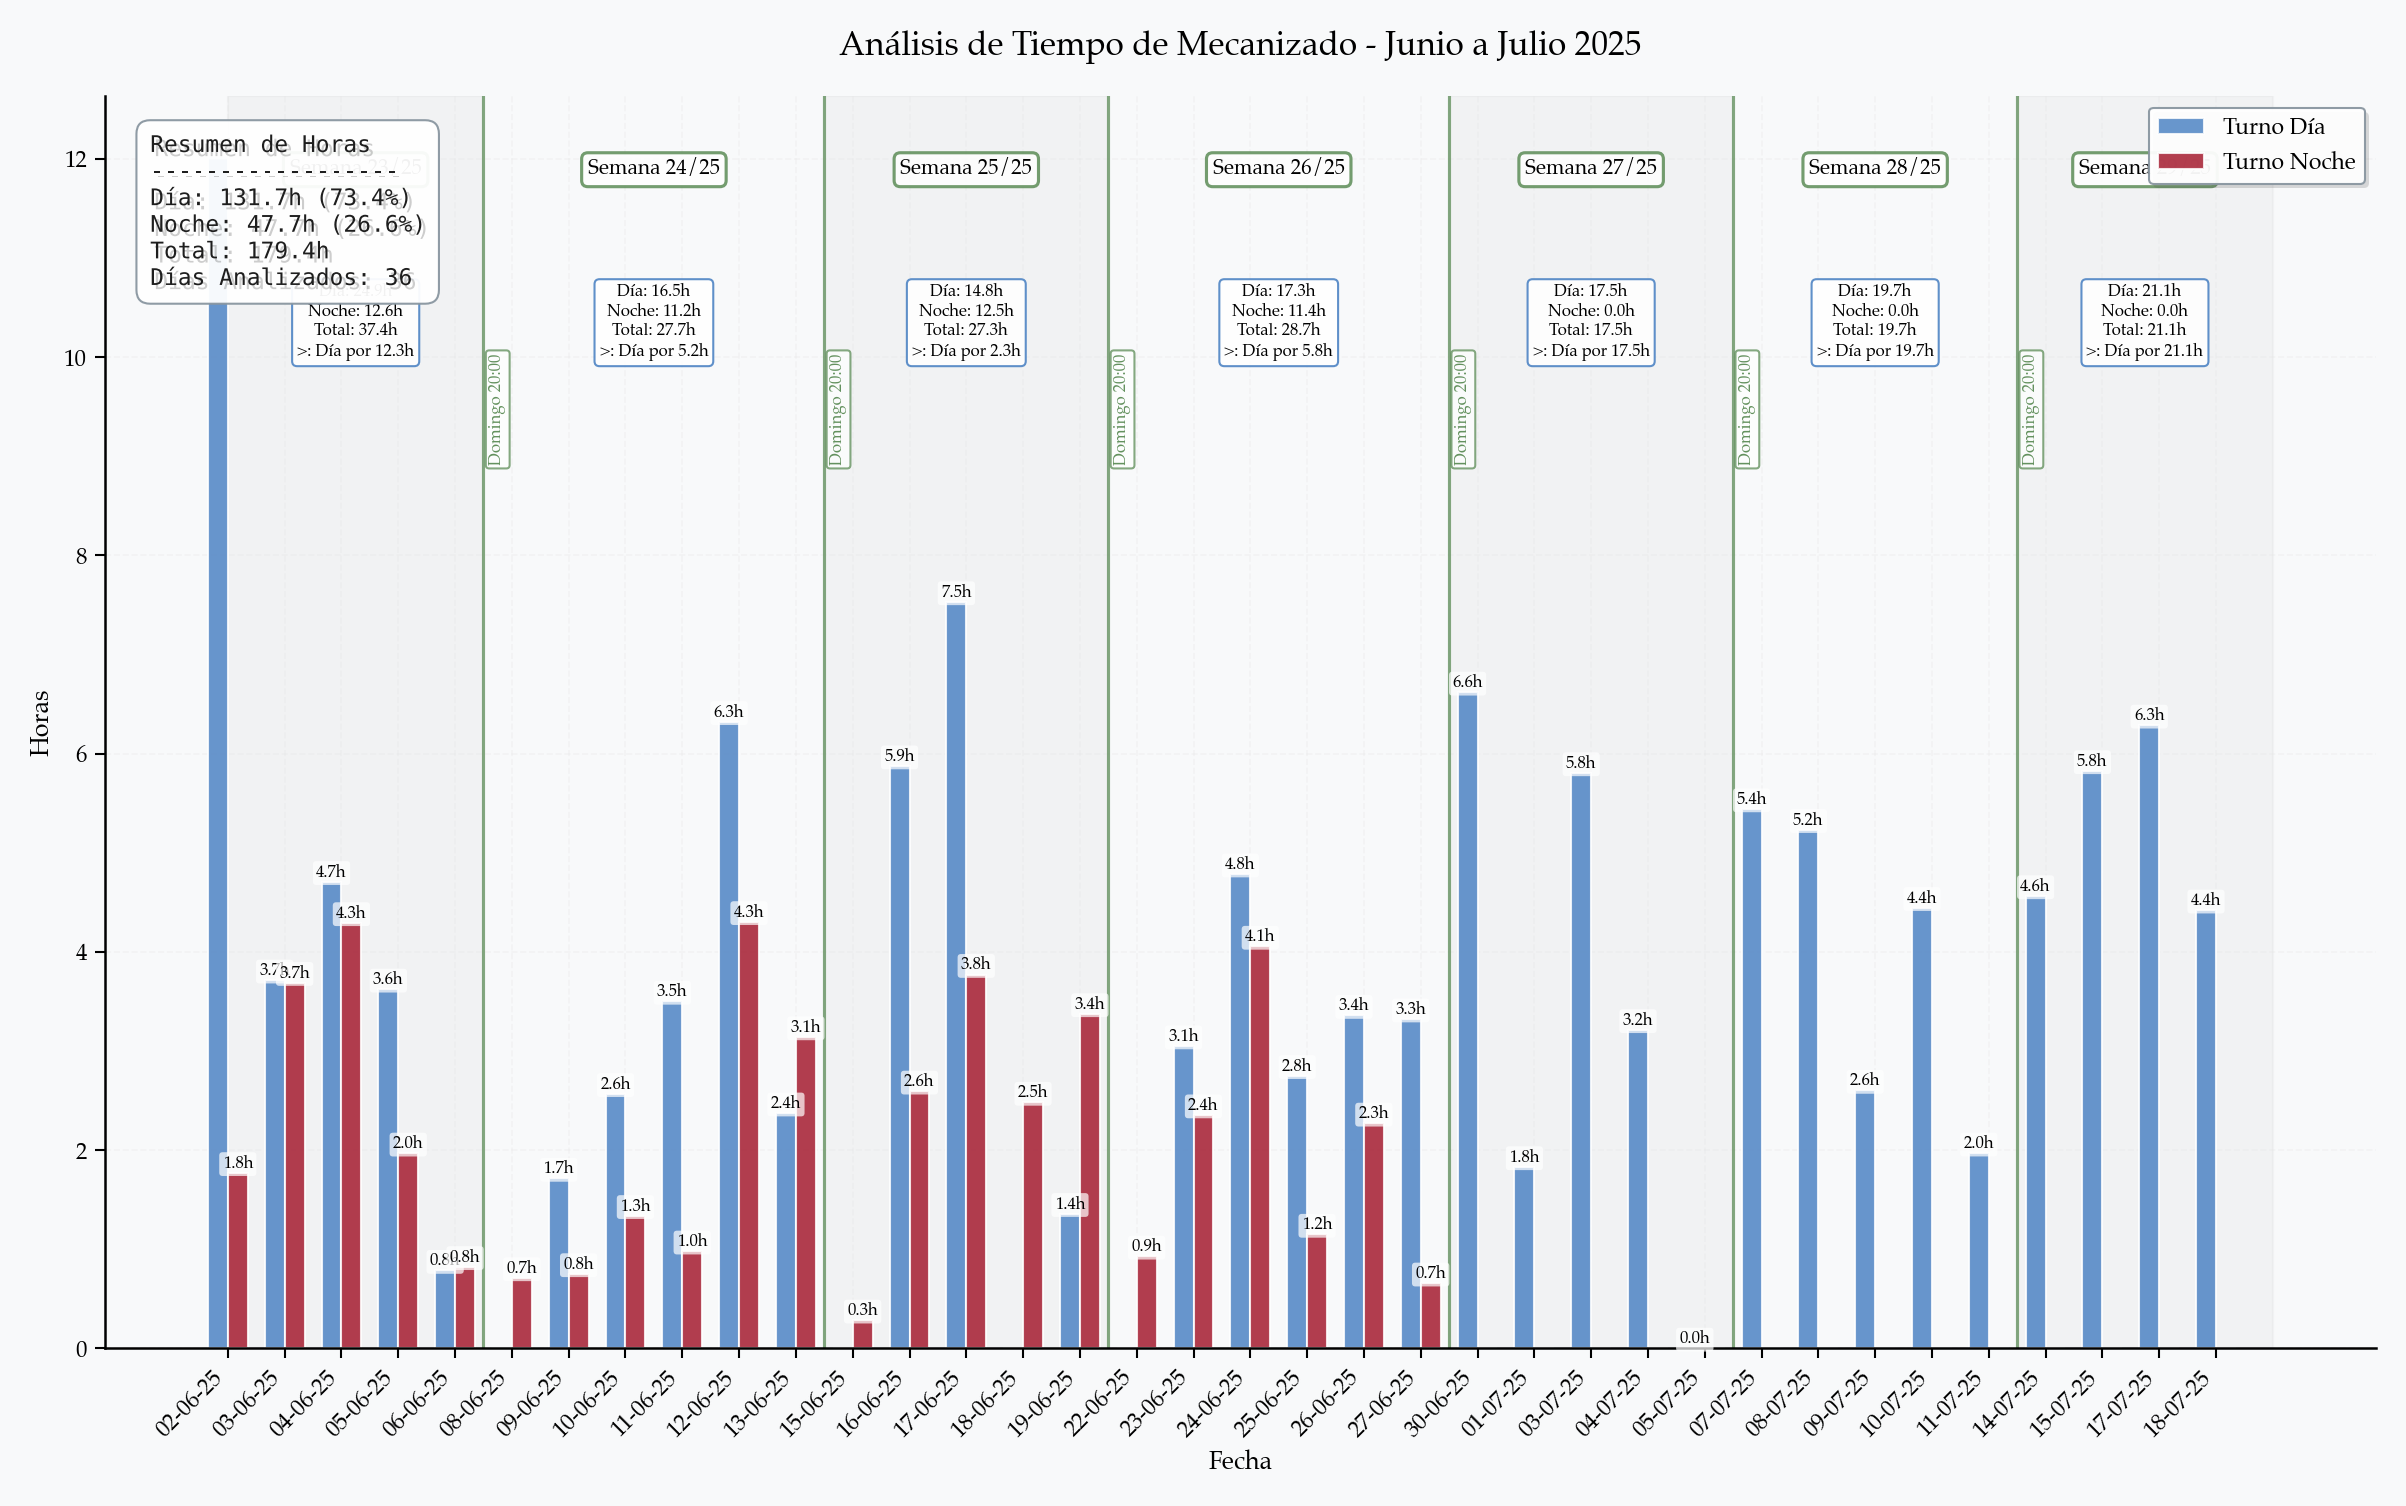

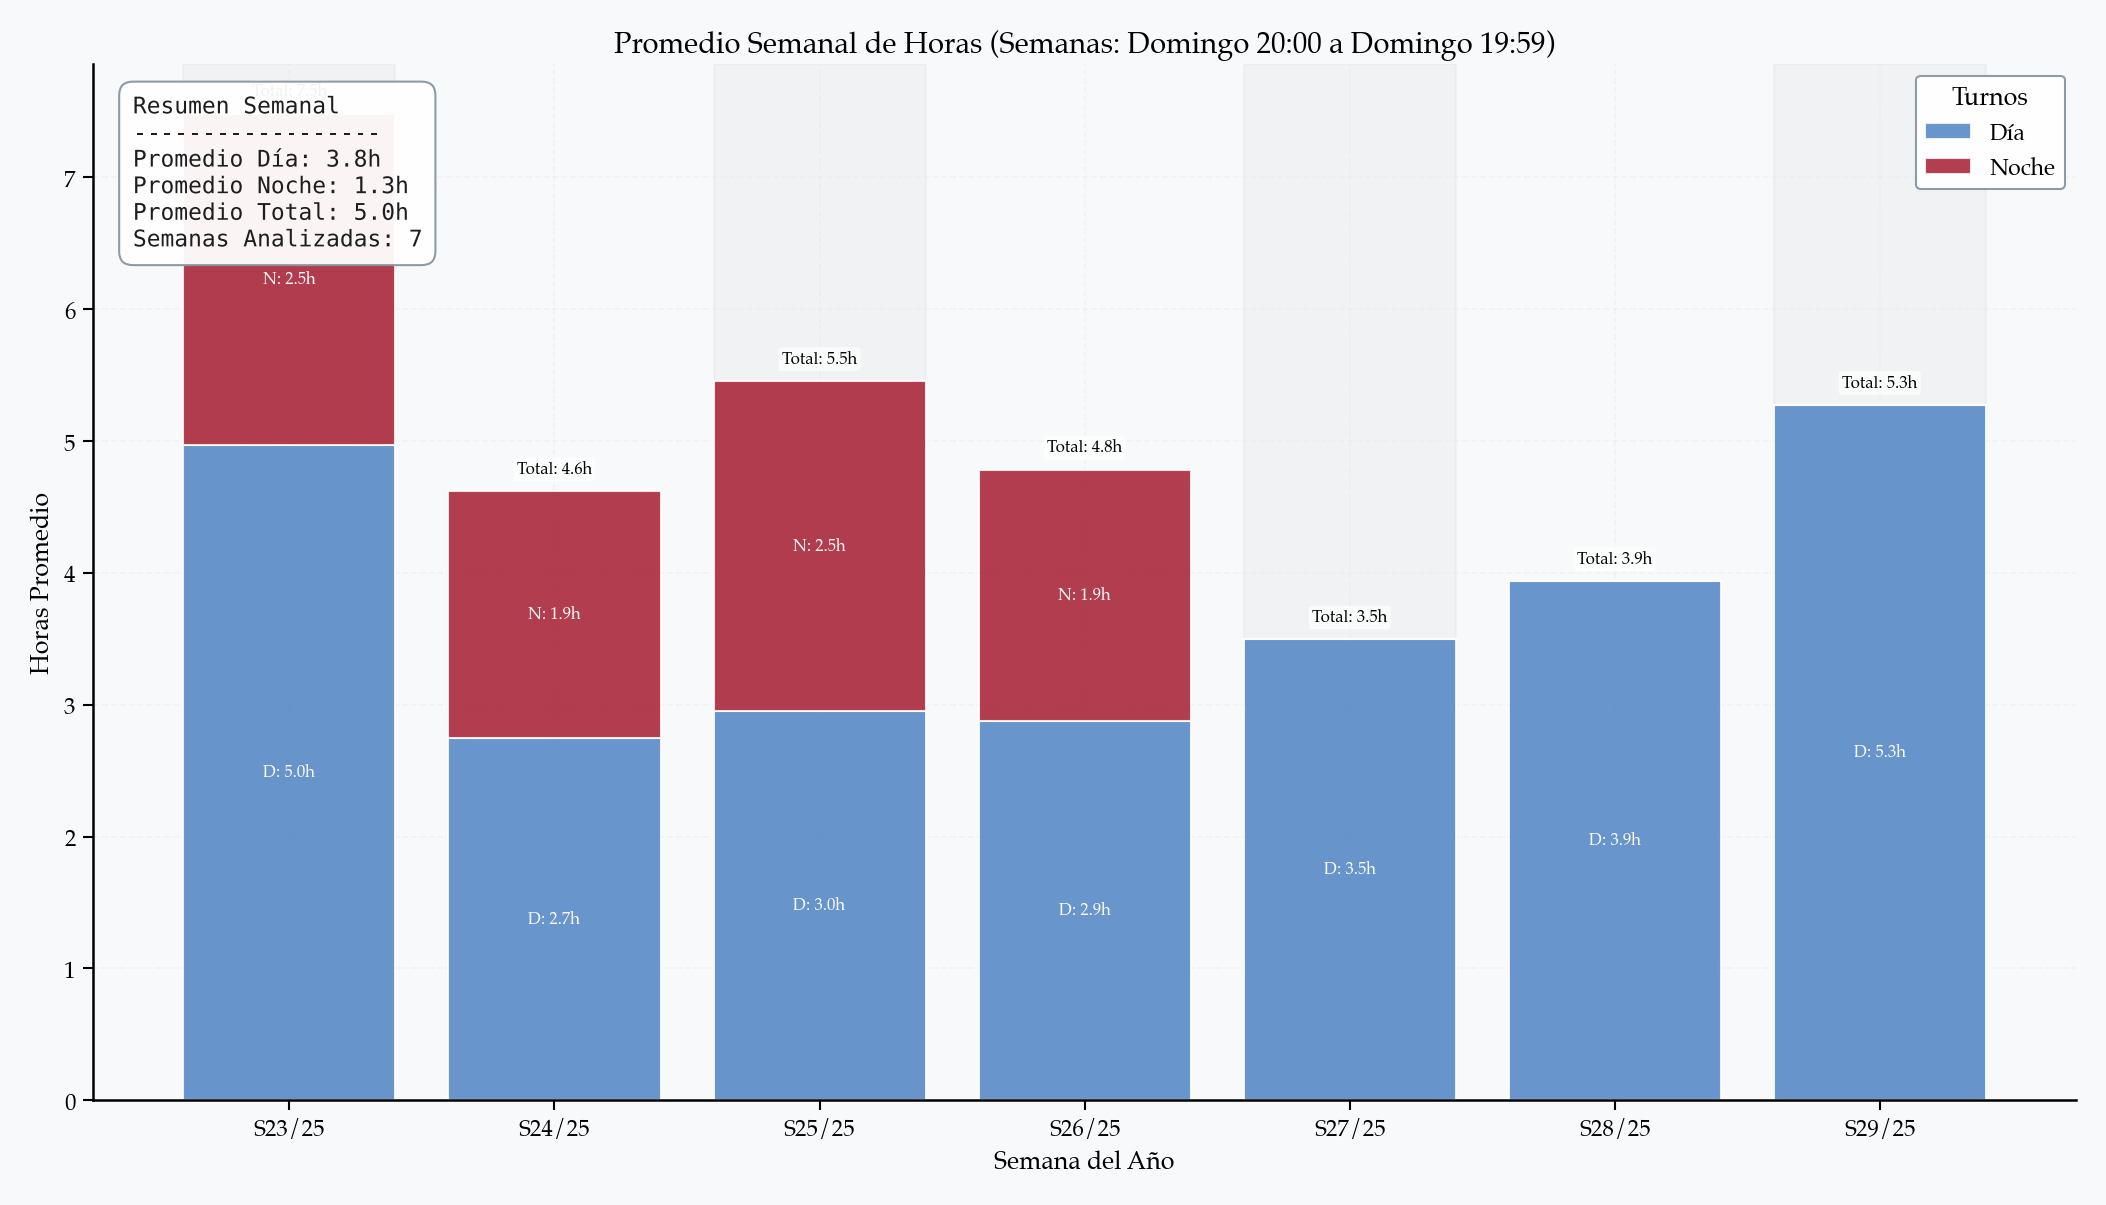

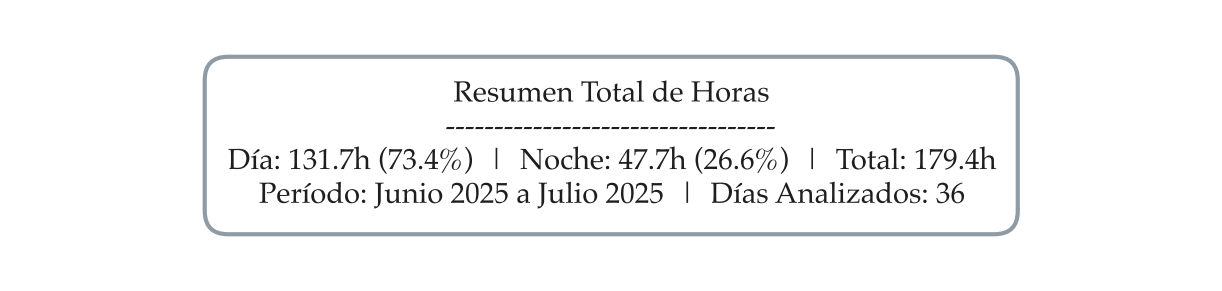

Gráficos guardados en la carpeta: /Users/joserubio/Desktop/proyectos/Kupfer/Casos/JKI/data/processed/plots


{'paths': {'analisis_tiempo': '/Users/joserubio/Desktop/proyectos/Kupfer/Casos/JKI/data/processed/plots/analisis_tiempo_2025_6_a_2025_7.png',
  'promedio_semanal': '/Users/joserubio/Desktop/proyectos/Kupfer/Casos/JKI/data/processed/plots/promedio_semanal_2025_6_a_2025_7.png',
  'horas_totales': '/Users/joserubio/Desktop/proyectos/Kupfer/Casos/JKI/data/processed/plots/horas_totales_2025_6_a_2025_7.png'},
 'figures': {'analisis_tiempo': <Figure size 2400x1500 with 1 Axes>,
  'promedio_semanal': <Figure size 2100x1200 with 1 Axes>,
  'horas_totales': <Figure size 1500x300 with 1 Axes>}}

In [14]:
## Date Range Selection
# Example: Plot data from June 2024 to February 2025
# Variables
start_año = 2025
start_mes = 6
end_año = 2025
end_mes = 7


plot_tiempo_range(combined_data, start_año, start_mes, end_año, end_mes, save_dir=output_dir)


# Function: velocity_from_df

## Overview
This function calculates cutting velocities from a DataFrame containing machining operation data, organizing results by year, month, and material thickness.

## Parameters
- **df**: pandas.DataFrame
  - Input DataFrame containing machining data
  - Required columns:
    - 'Timestamp': Time of operation
    - 'Tiempo': Operation duration (in seconds)
    - 'Longitude Corte (m)': Cutting length in meters
    - 'Espesor': Material thickness

## Process
1. **Data Preparation**
   - Creates a copy of input DataFrame to preserve original data
   - Converts timestamps to datetime format if needed
   - Extracts year and month from timestamps

2. **Data Aggregation**
   - Groups data by year, month, and material thickness
   - Calculates total cutting time and length for each group

3. **Velocity Calculation**
   - Computes velocity in meters per minute (m/min)
   - Uses formula: (cutting length / time) * 60
   - Handles zero-time cases safely
   - Rounds results to 2 decimal places

4. **Result Organization**
   - Creates a nested dictionary structure:
     - First level: year_month (e.g., "2025_7")
     - Second level: material thickness
     - Values: calculated velocities

In [15]:
programa_summary = combined_data_dynamodb.groupby('Programa').agg({
    'Tiempo': 'sum',
    'Timestamp': 'first',  # This keeps the first timestamp for each program
    'Longitude Corte (m)': 'first',  # This keeps the first timestamp for each program
    'Espesor': 'first',  # This keeps the first timestamp for each program
}).reset_index()
programa_summary

NameError: name 'combined_data_dynamodb' is not defined

In [16]:
## Velocity Calculation example usage:
result = velocity_from_df(programa_summary)
print(result)


NameError: name 'programa_summary' is not defined

In [17]:

## Velocity Visualization
plot_velocity(result)

NameError: name 'result' is not defined

# Functions for Outlier Analysis in Manufacturing Data

## detect_outliers_regression
Identifies outliers in machining data using linear regression. Analyzes cutting time based on material properties (length and thickness) using studentized residuals. Saves outlier details and clean data to Excel files.

## plot_outliers_detailed
Creates a 2x2 grid of plots visualizing outliers and regression model fit:
- Actual vs Predicted times
- Studentized Residuals analysis
- 3D visualization of relationships
- Leverage vs Residuals plot

Both functions work together to identify and visualize anomalies in manufacturing process data.

In [18]:
## Material Property Analysis
# Use the functions
output_dir = str(project_root / 'data' / 'processed' / 'clean_data')
outliers_mask, diagnostics = detect_outliers_regression(programa_summary, output_dir=output_dir)
plot_outliers_detailed(programa_summary, outliers_mask, diagnostics)

NameError: name 'programa_summary' is not defined

# create_espesor_analysis_plots

Creates comprehensive visualizations for analyzing material thickness (Espesor) relationships in manufacturing data. Generates a 2x2 grid of plots for each group of thicknesses, including:

- Scatter plot showing cutting time as color gradient
- Box plot of cutting length by thickness
- Heatmap of average processing times
- Line plot showing relationships between variables

Takes DataFrame or Excel file as input. Optional parameters for group size and save directory.

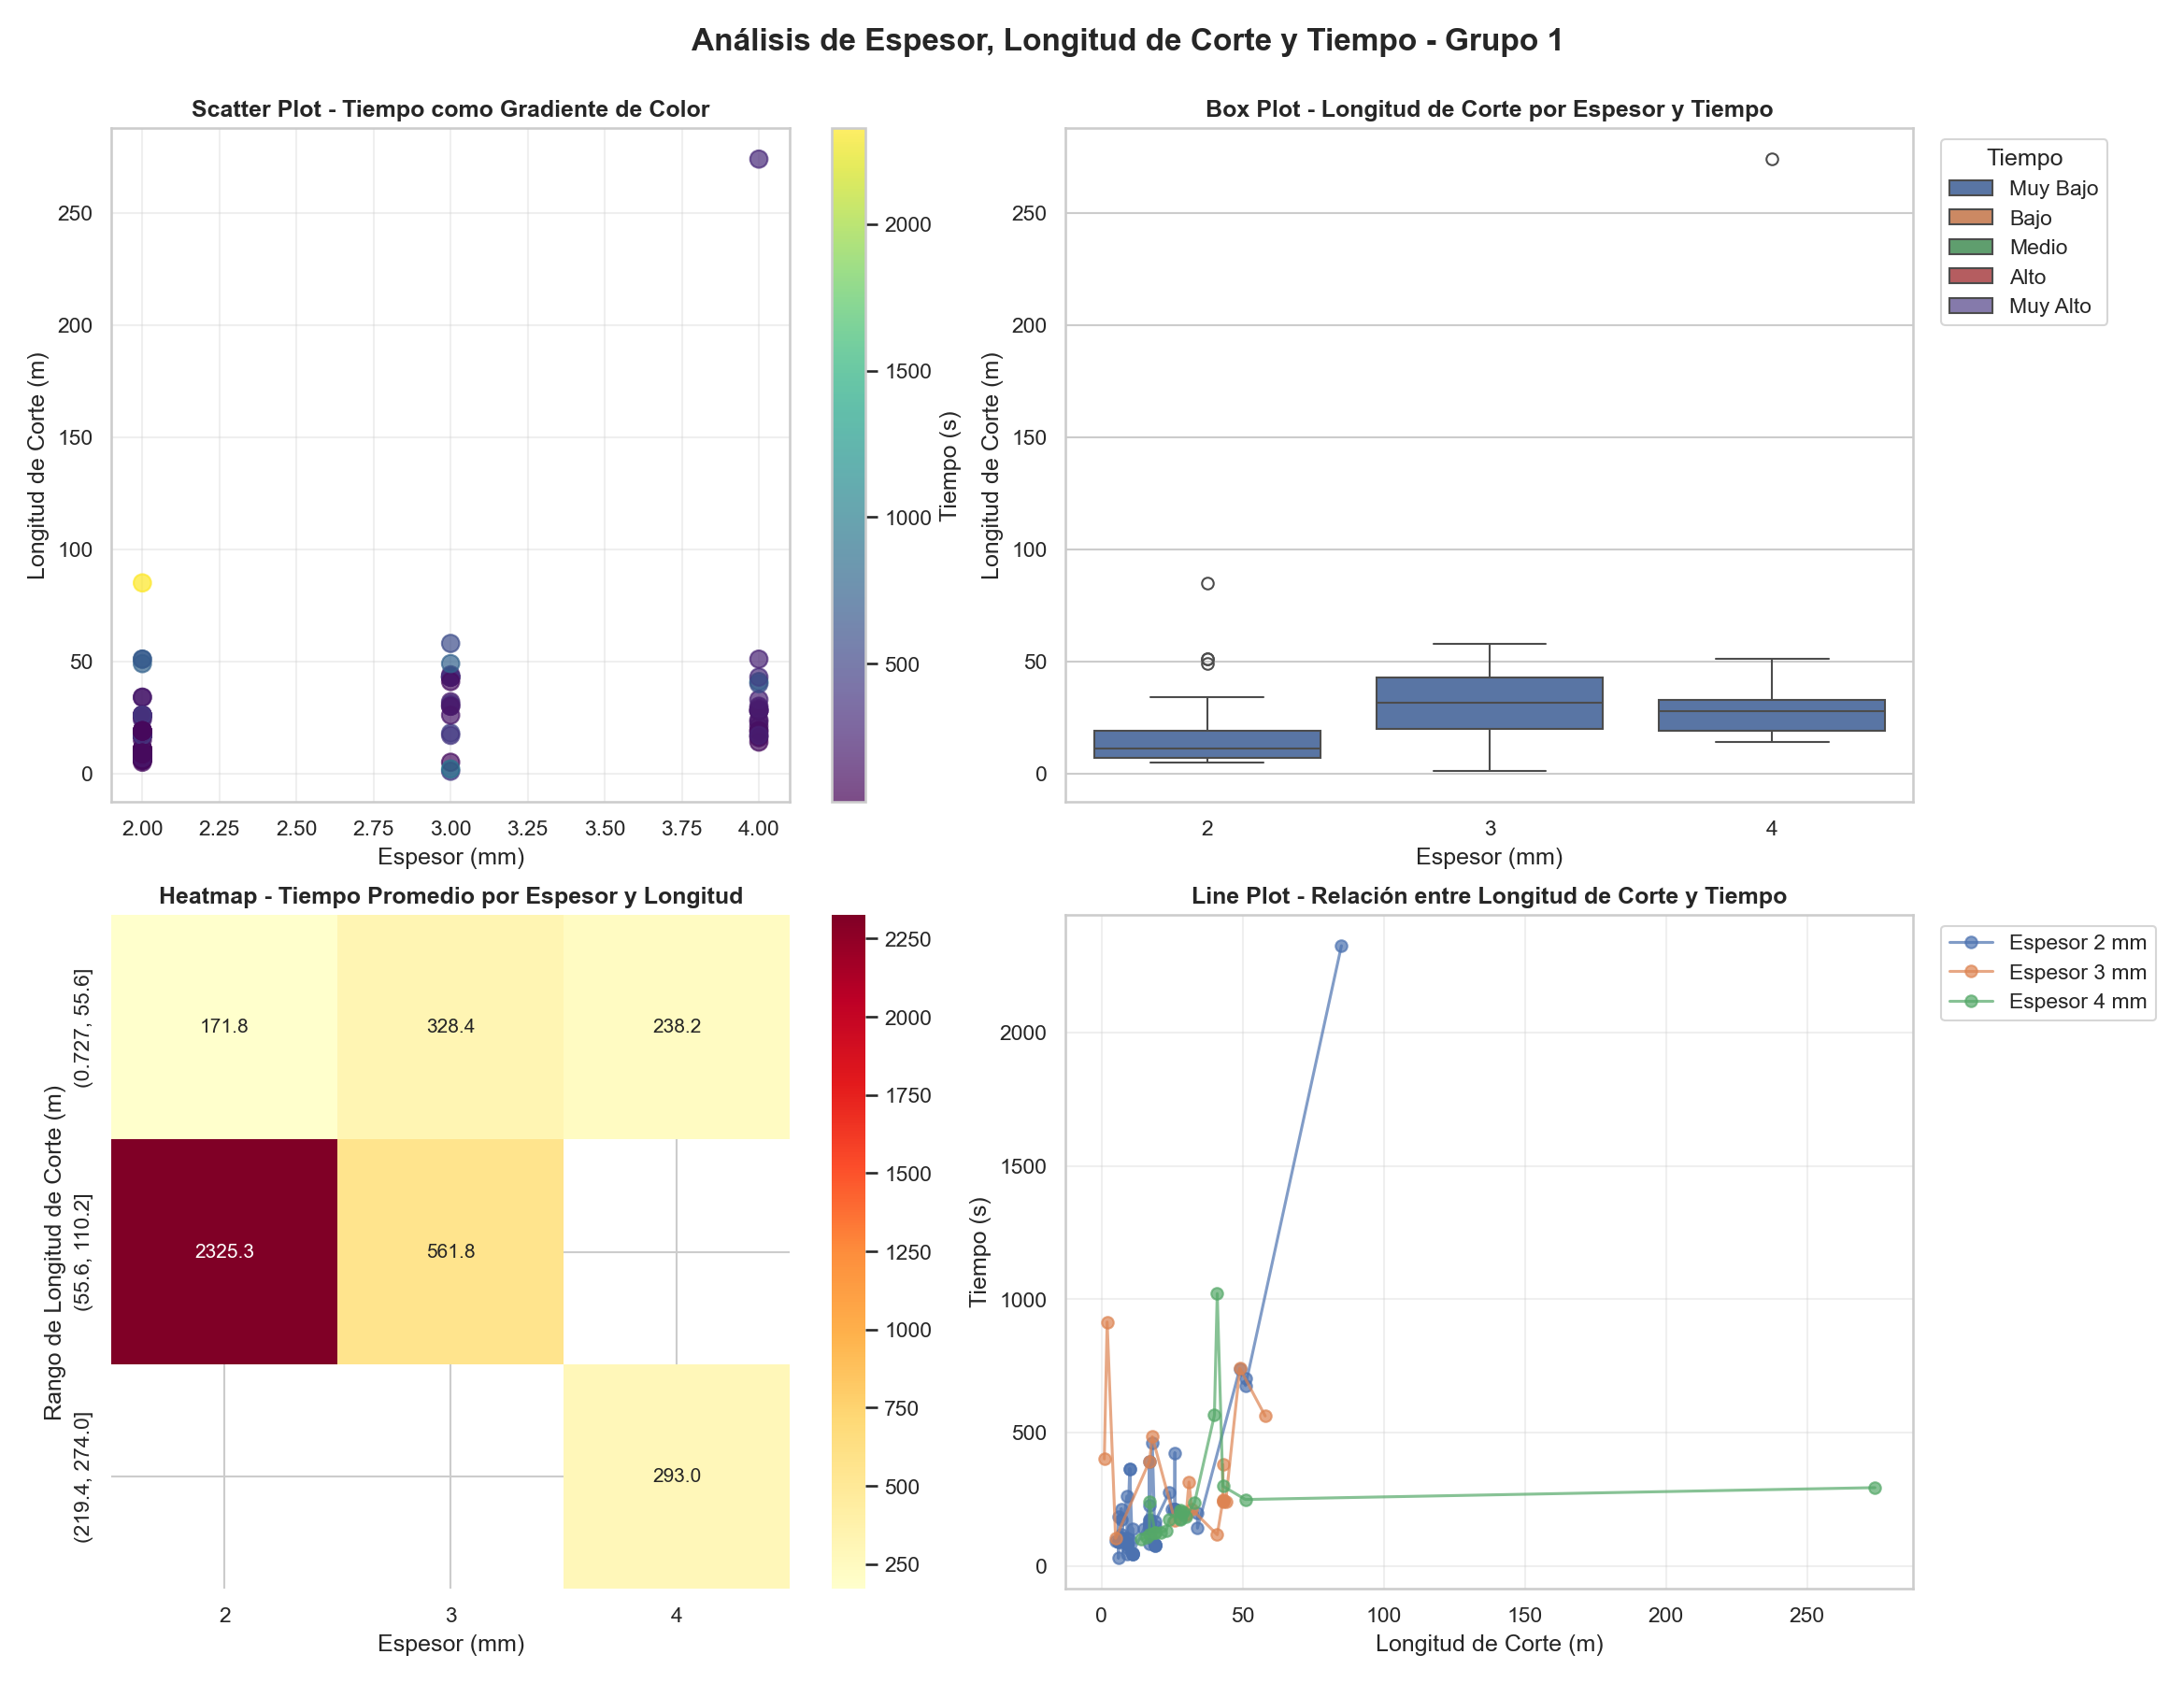

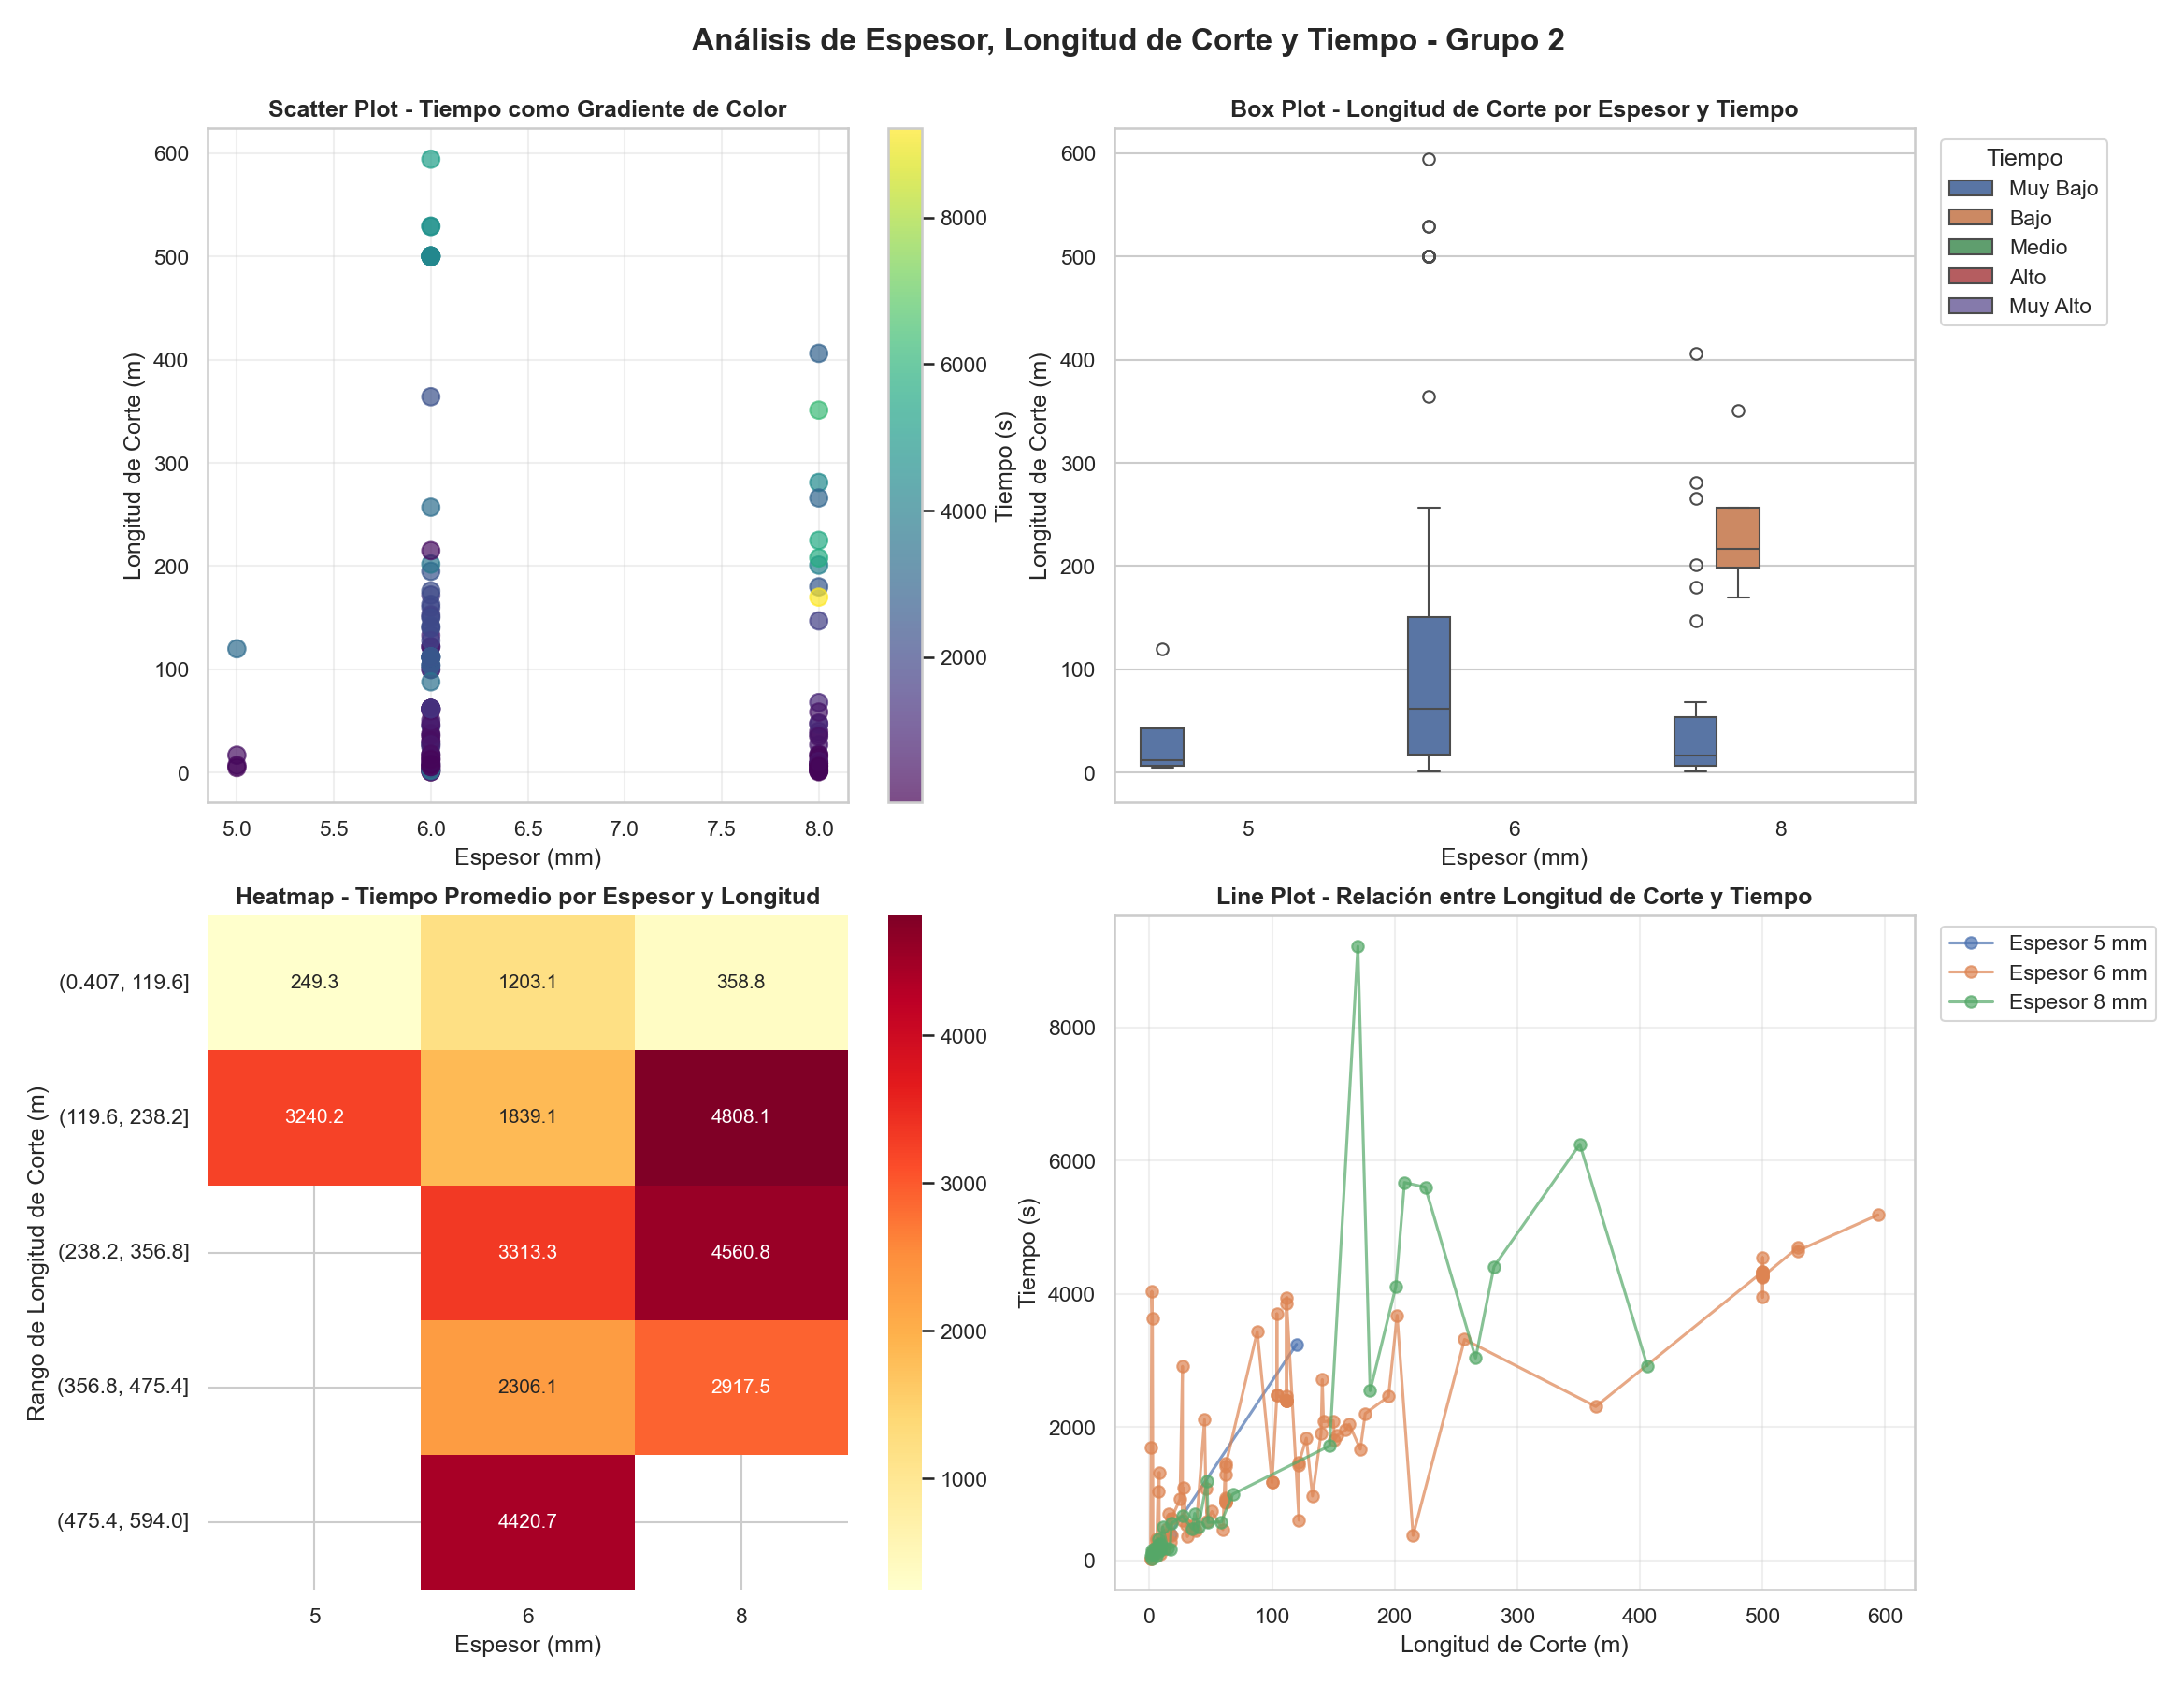

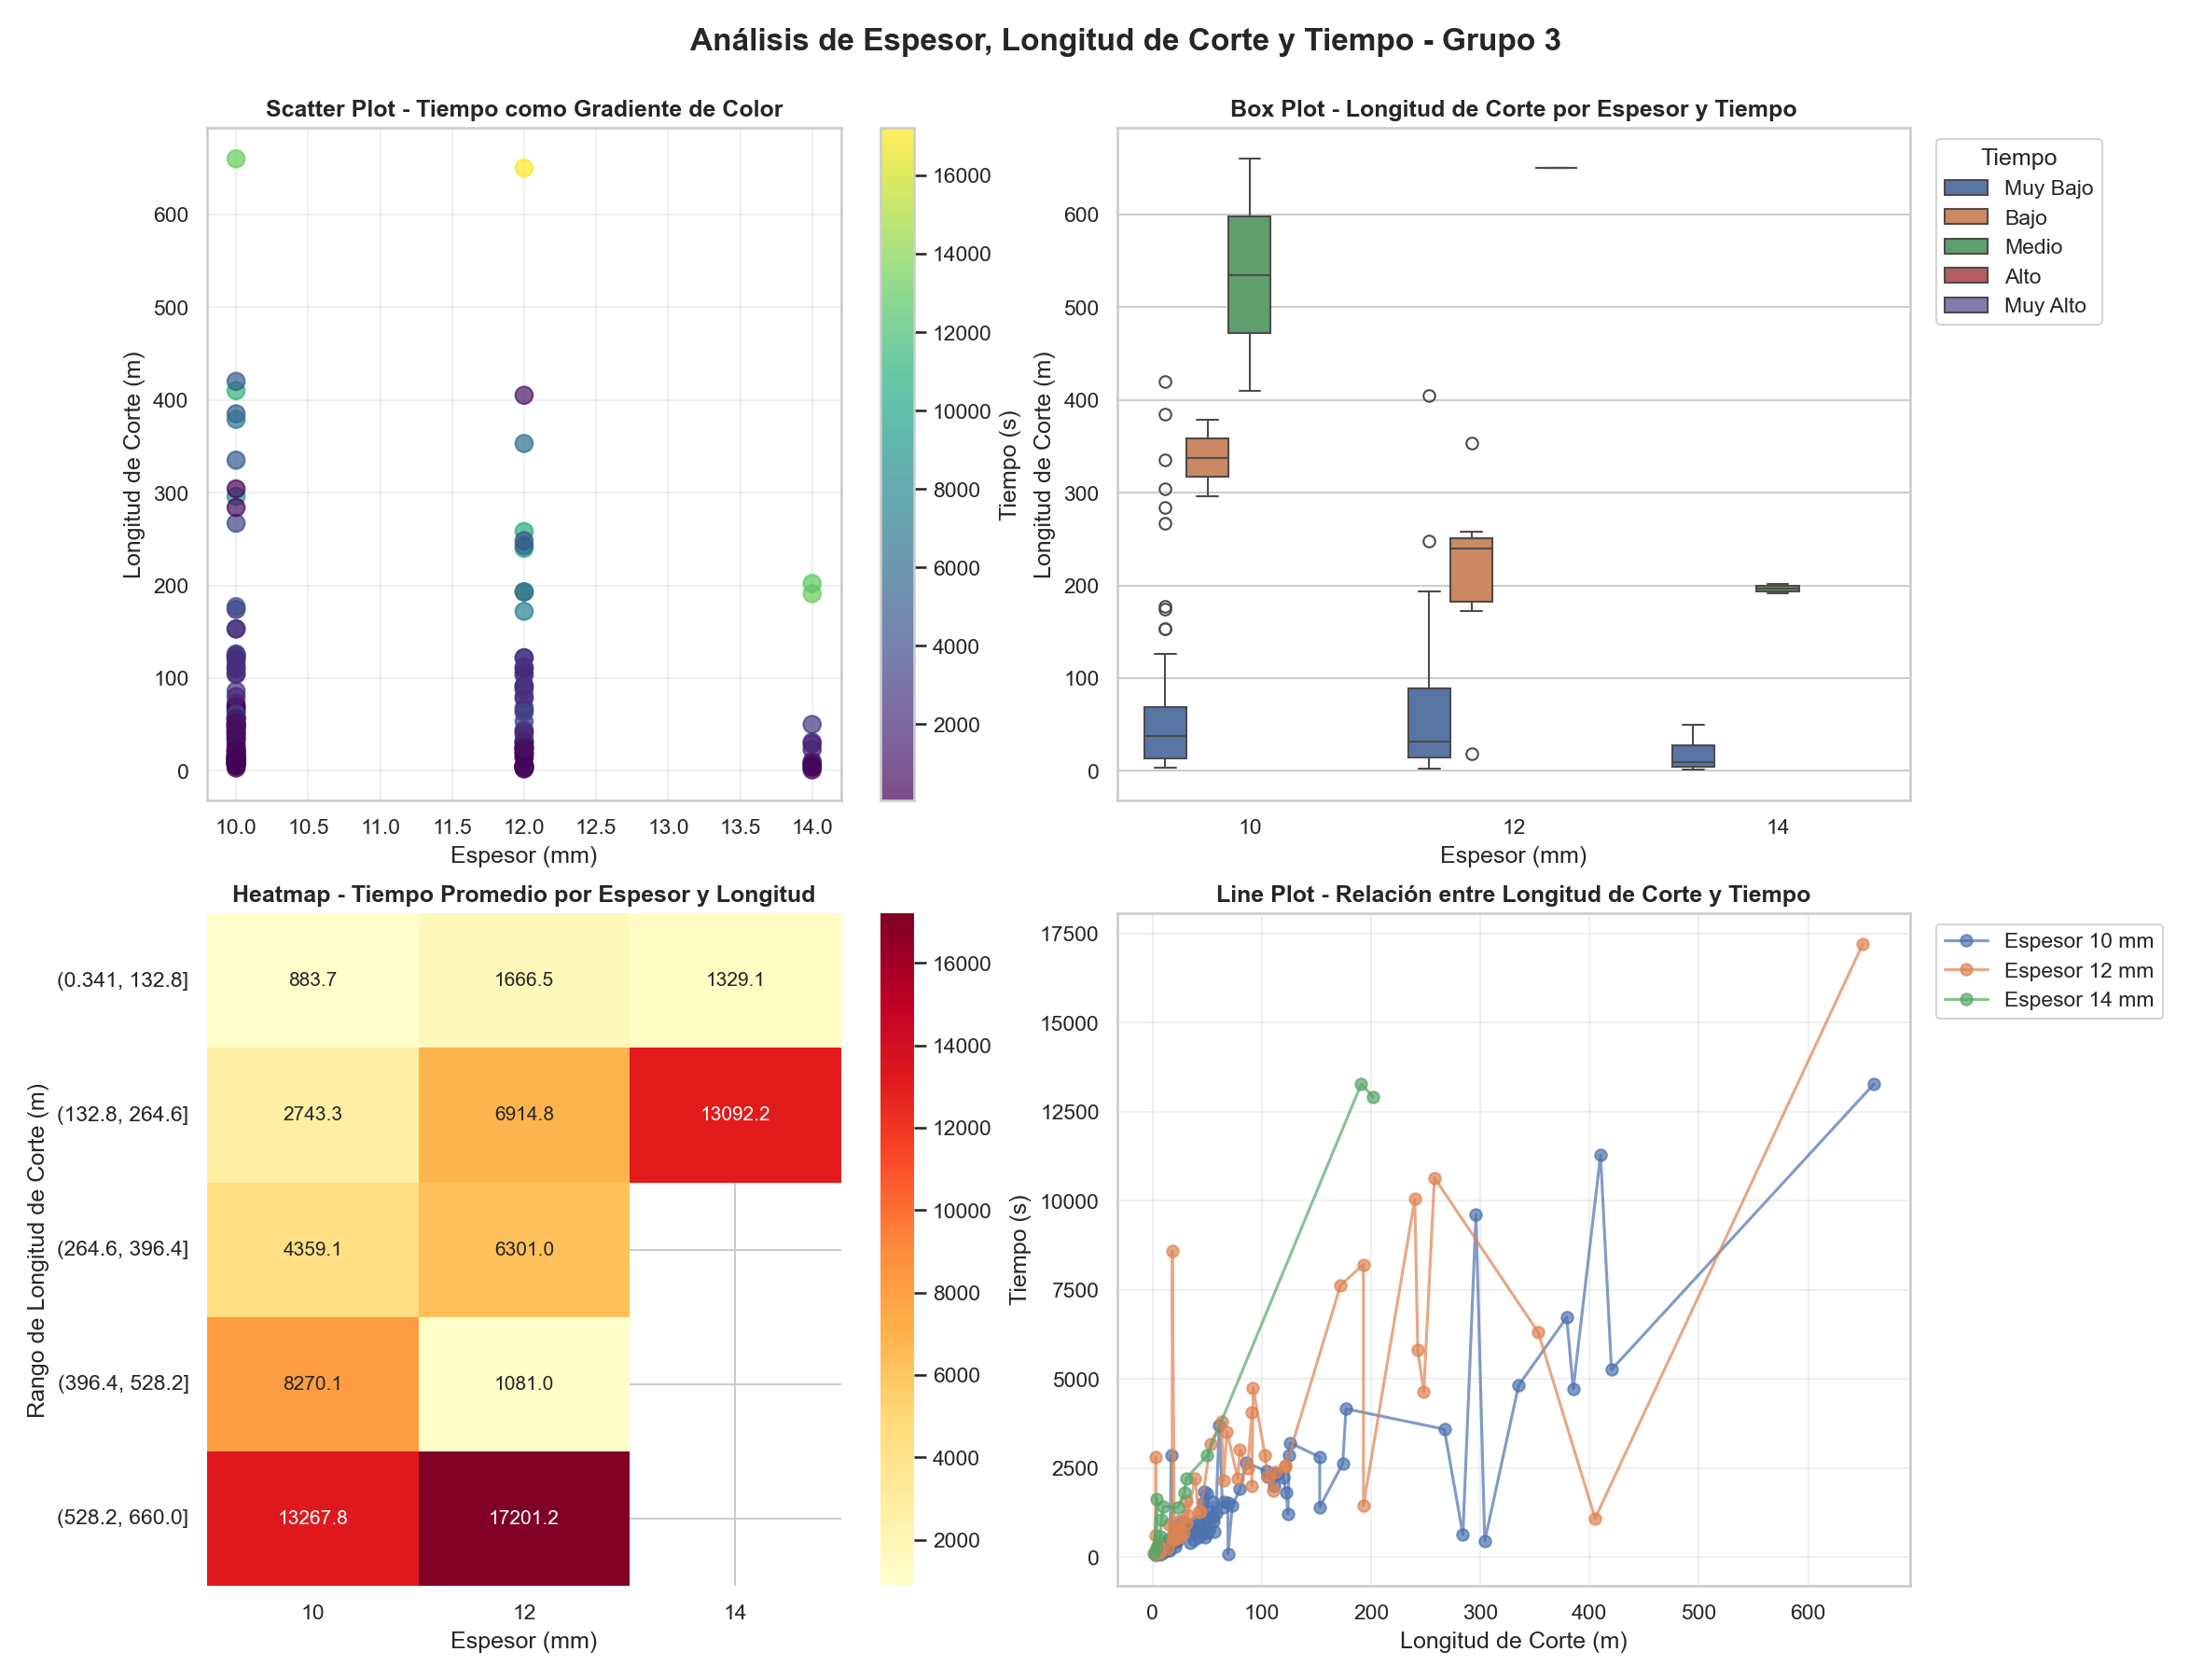

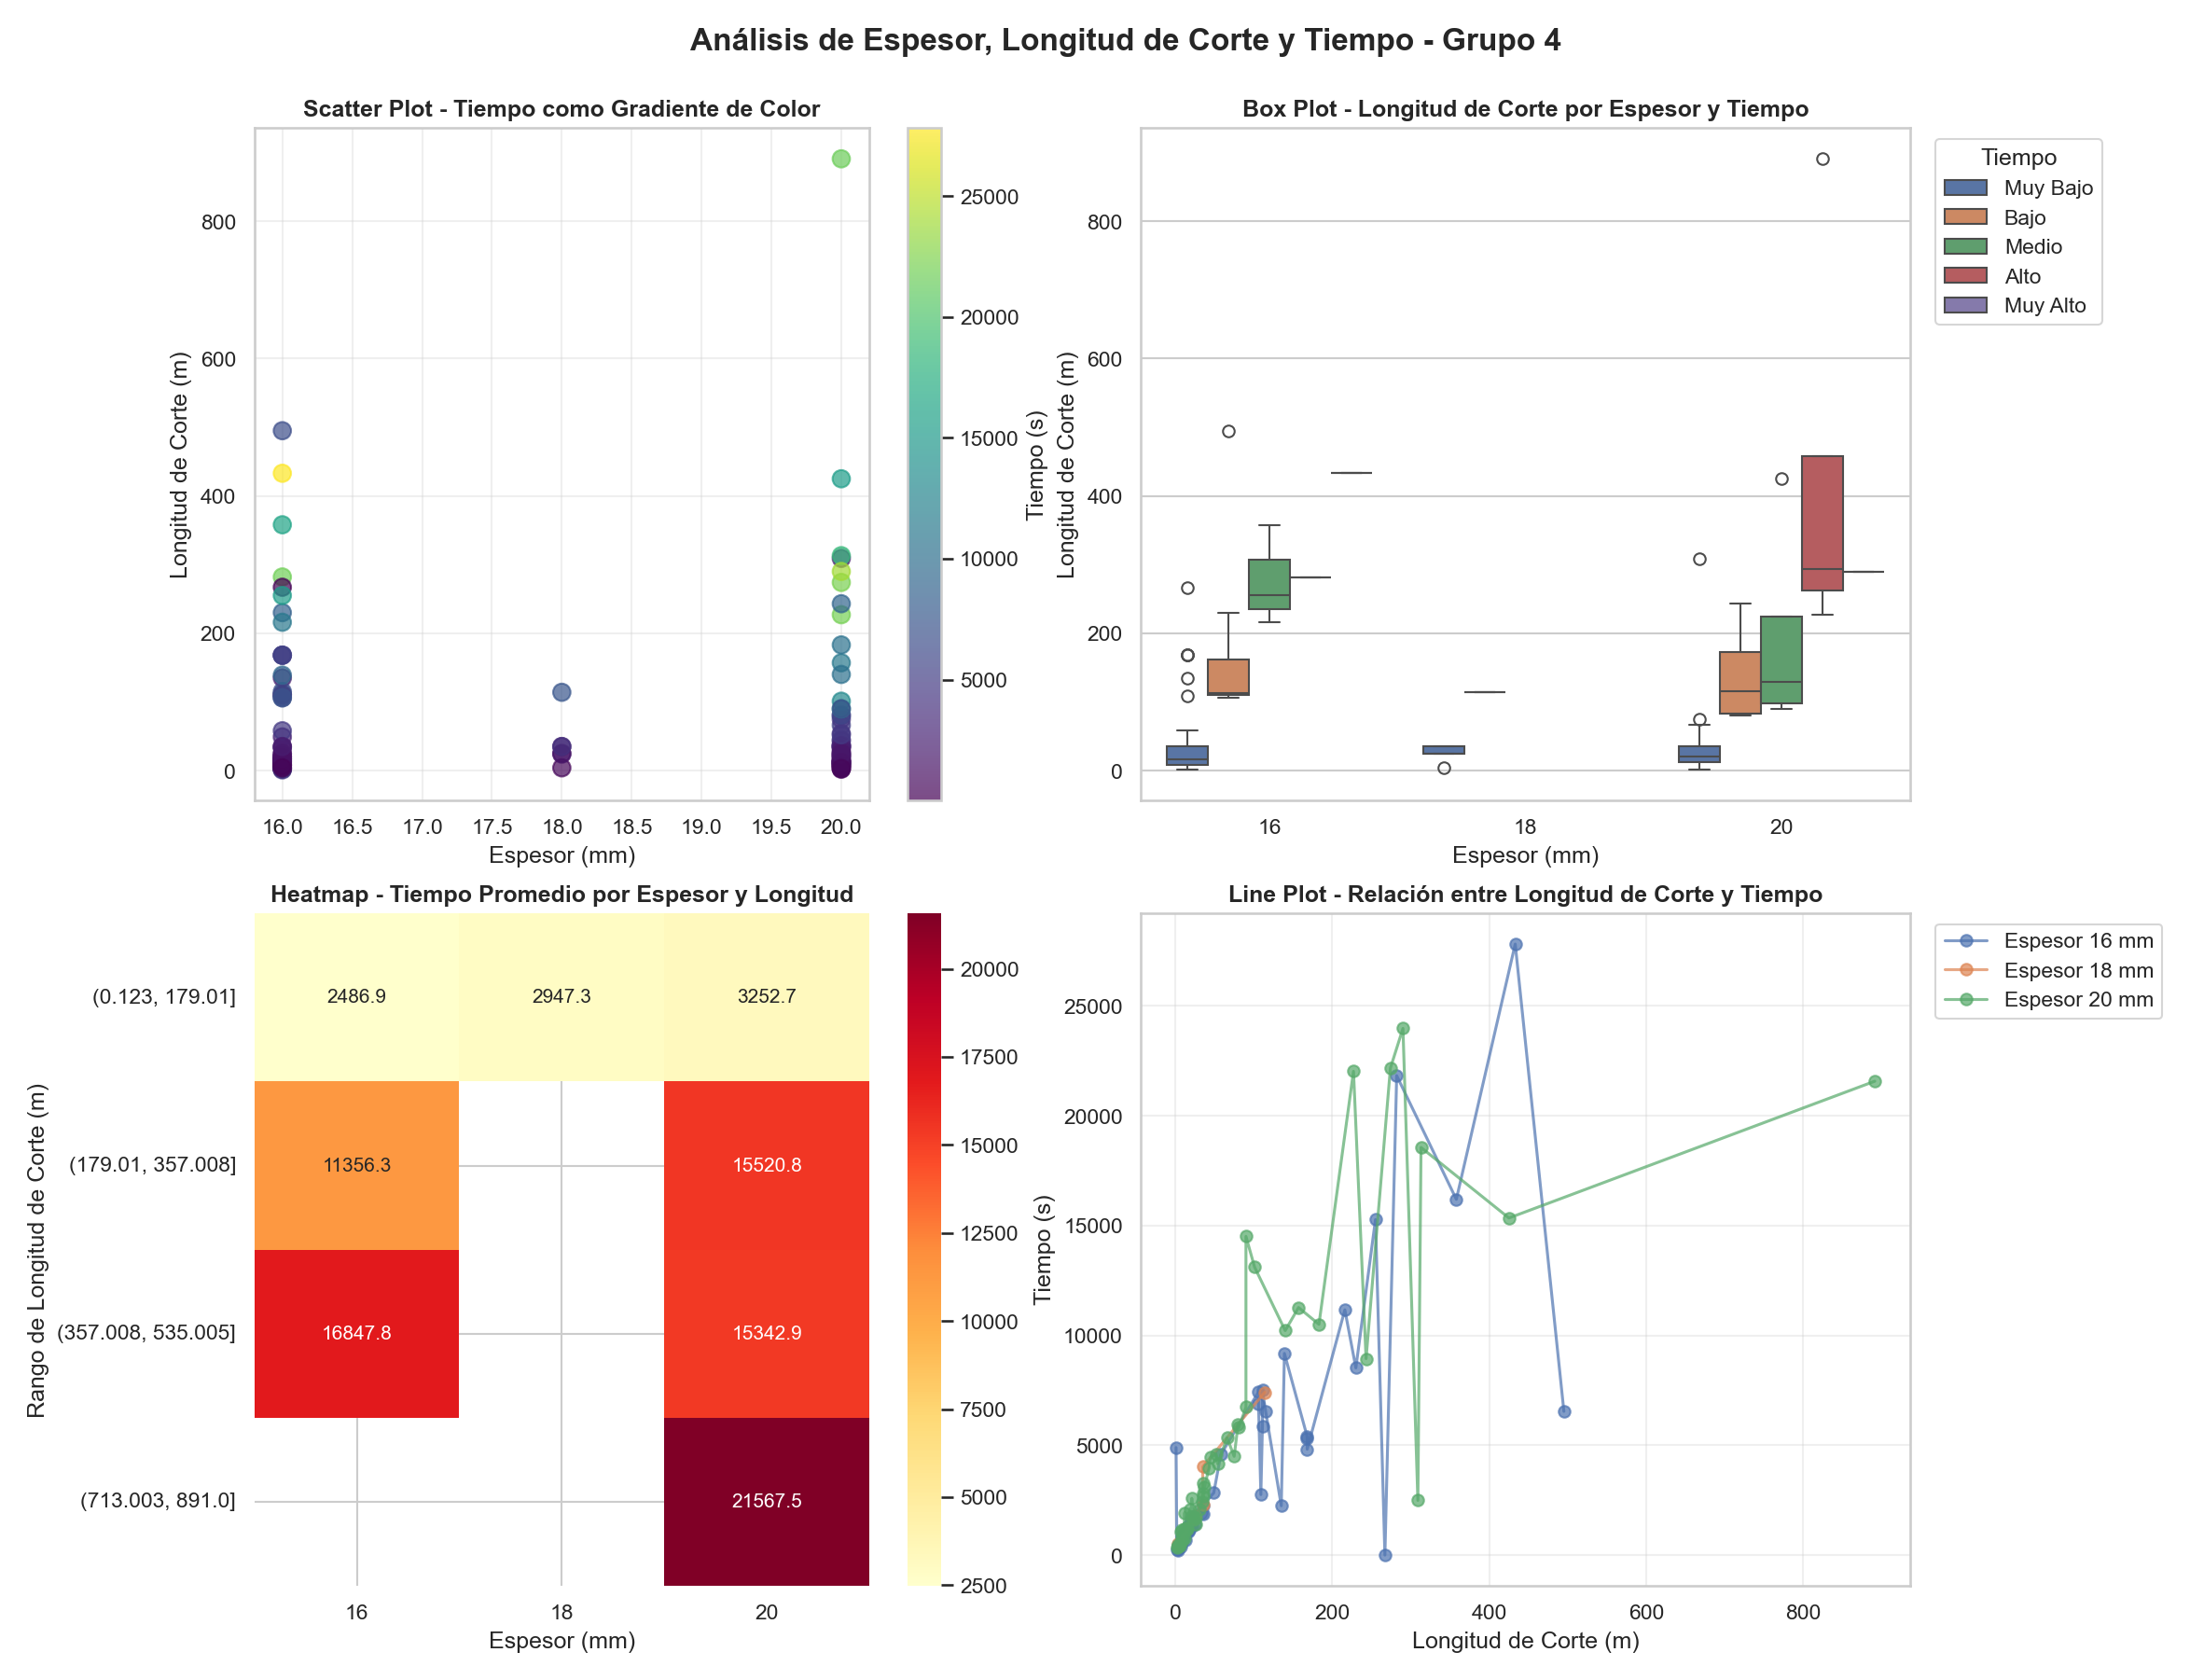

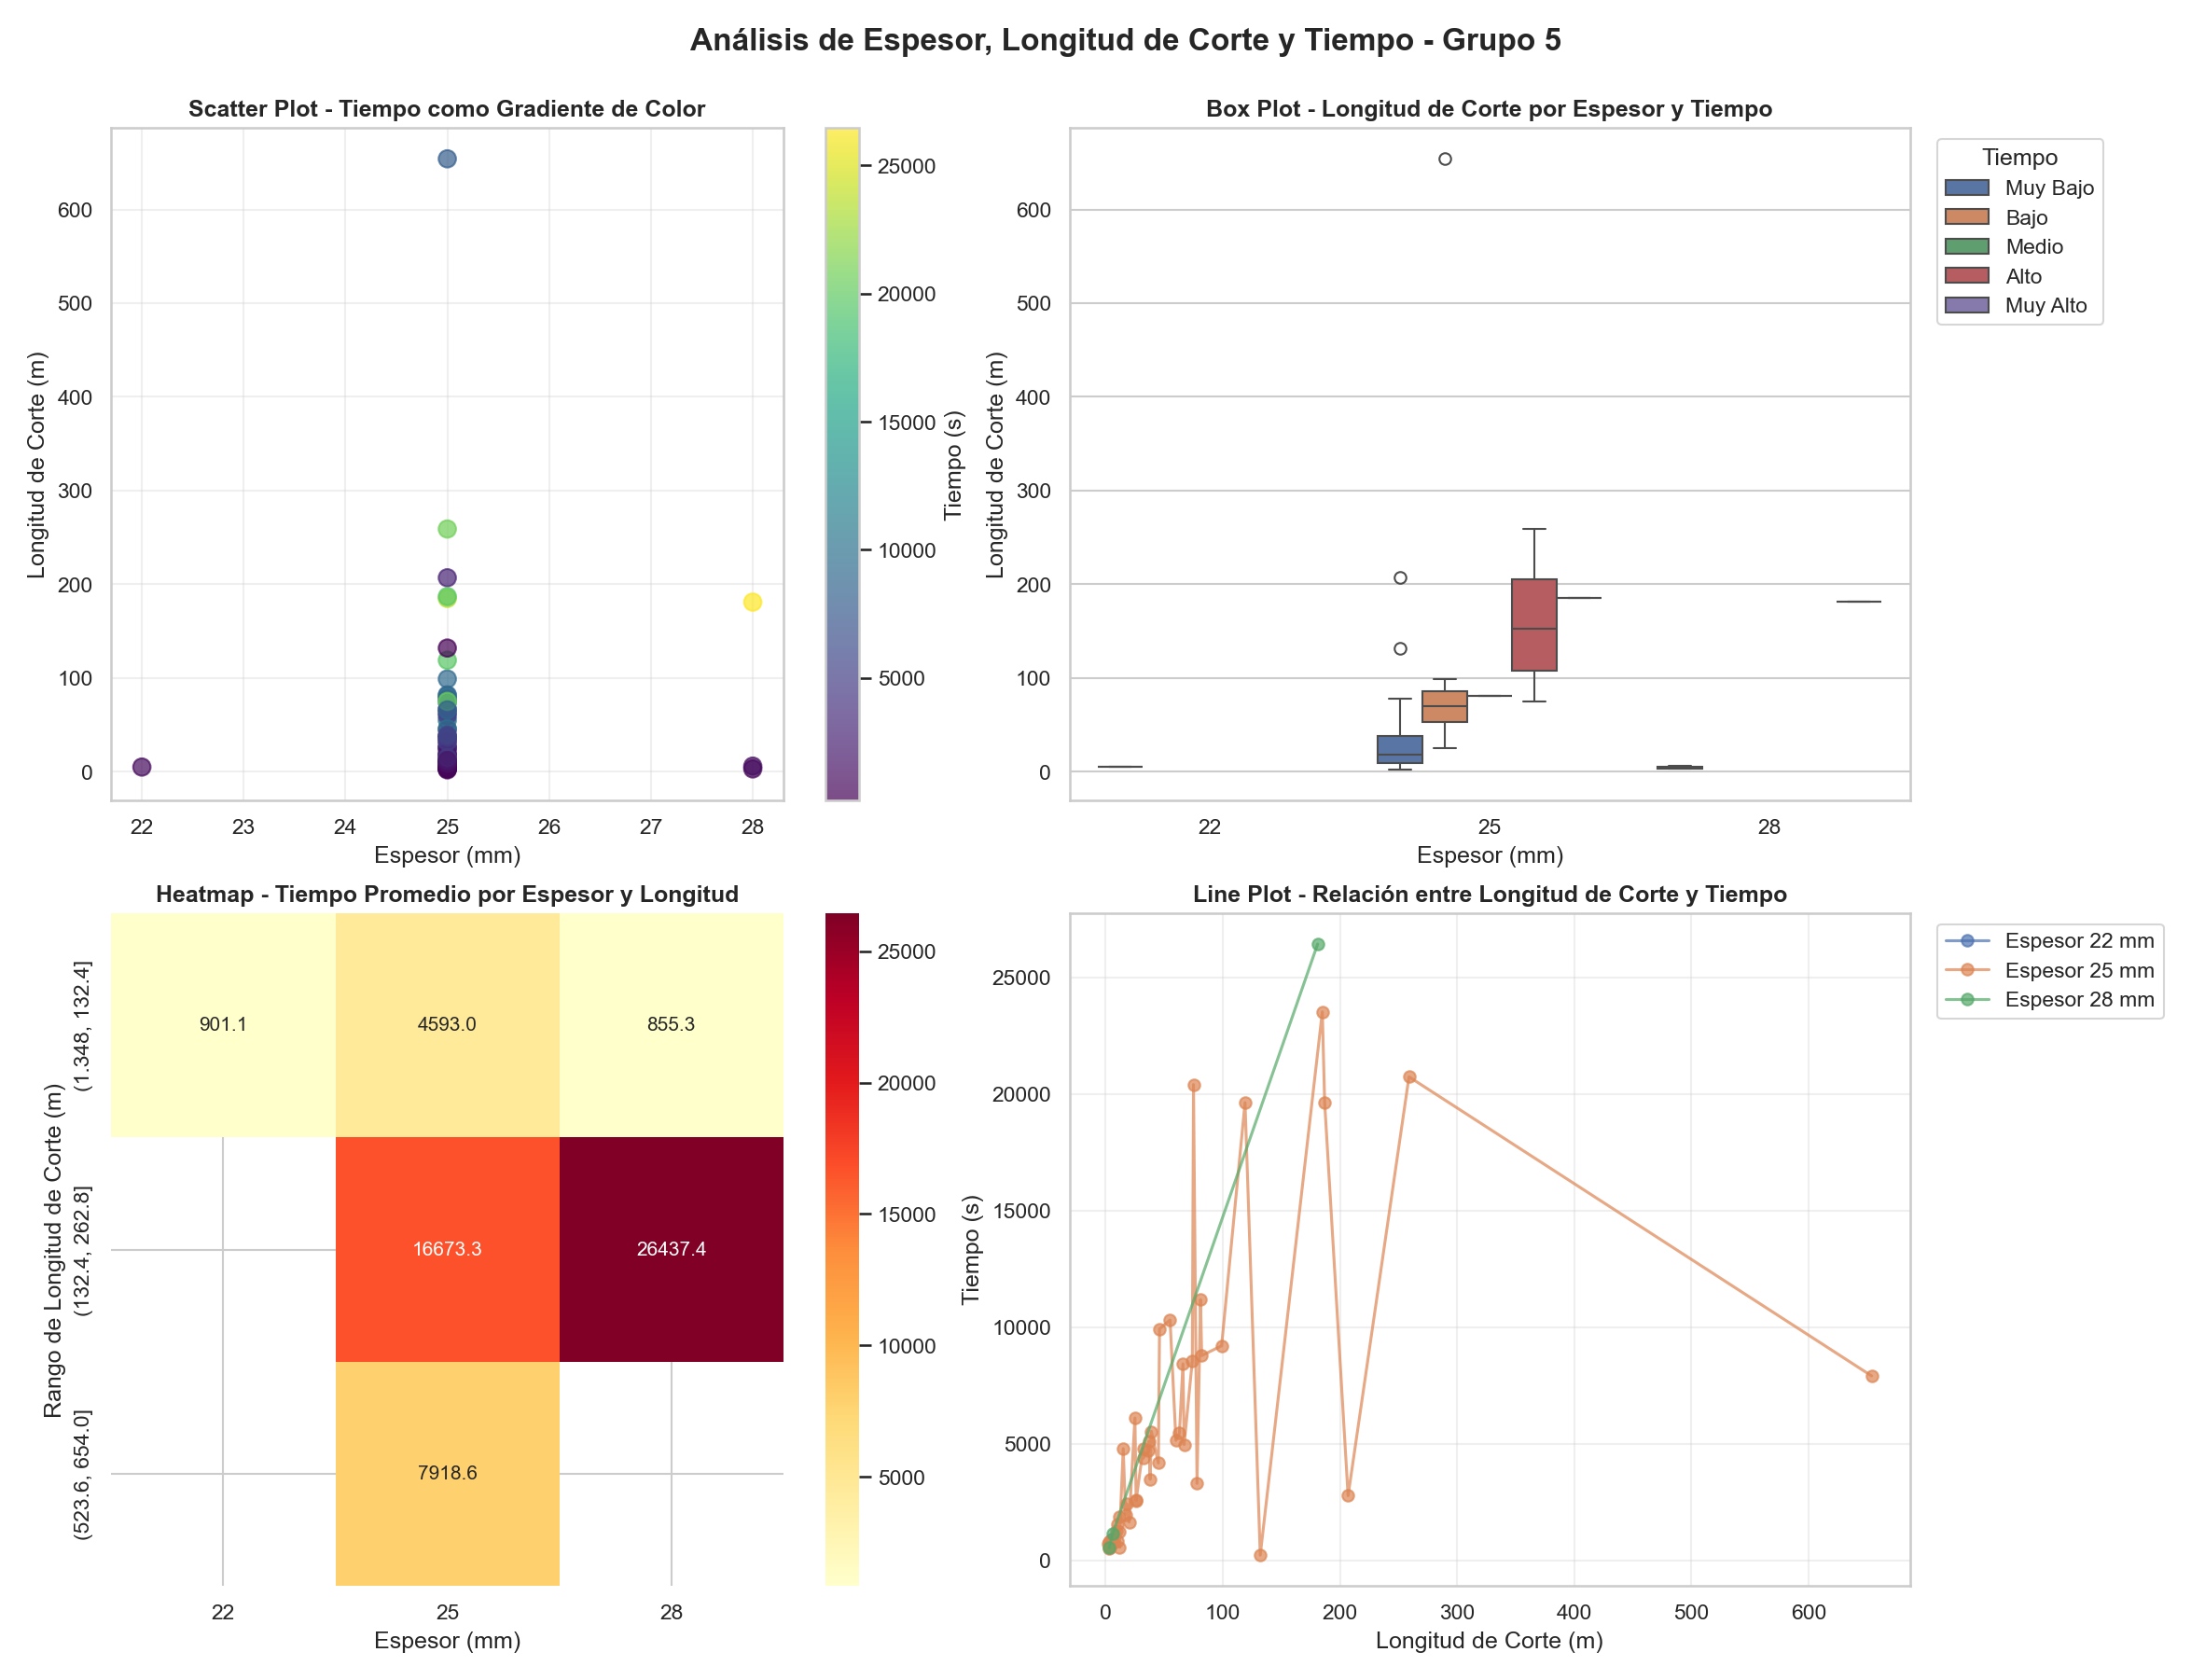

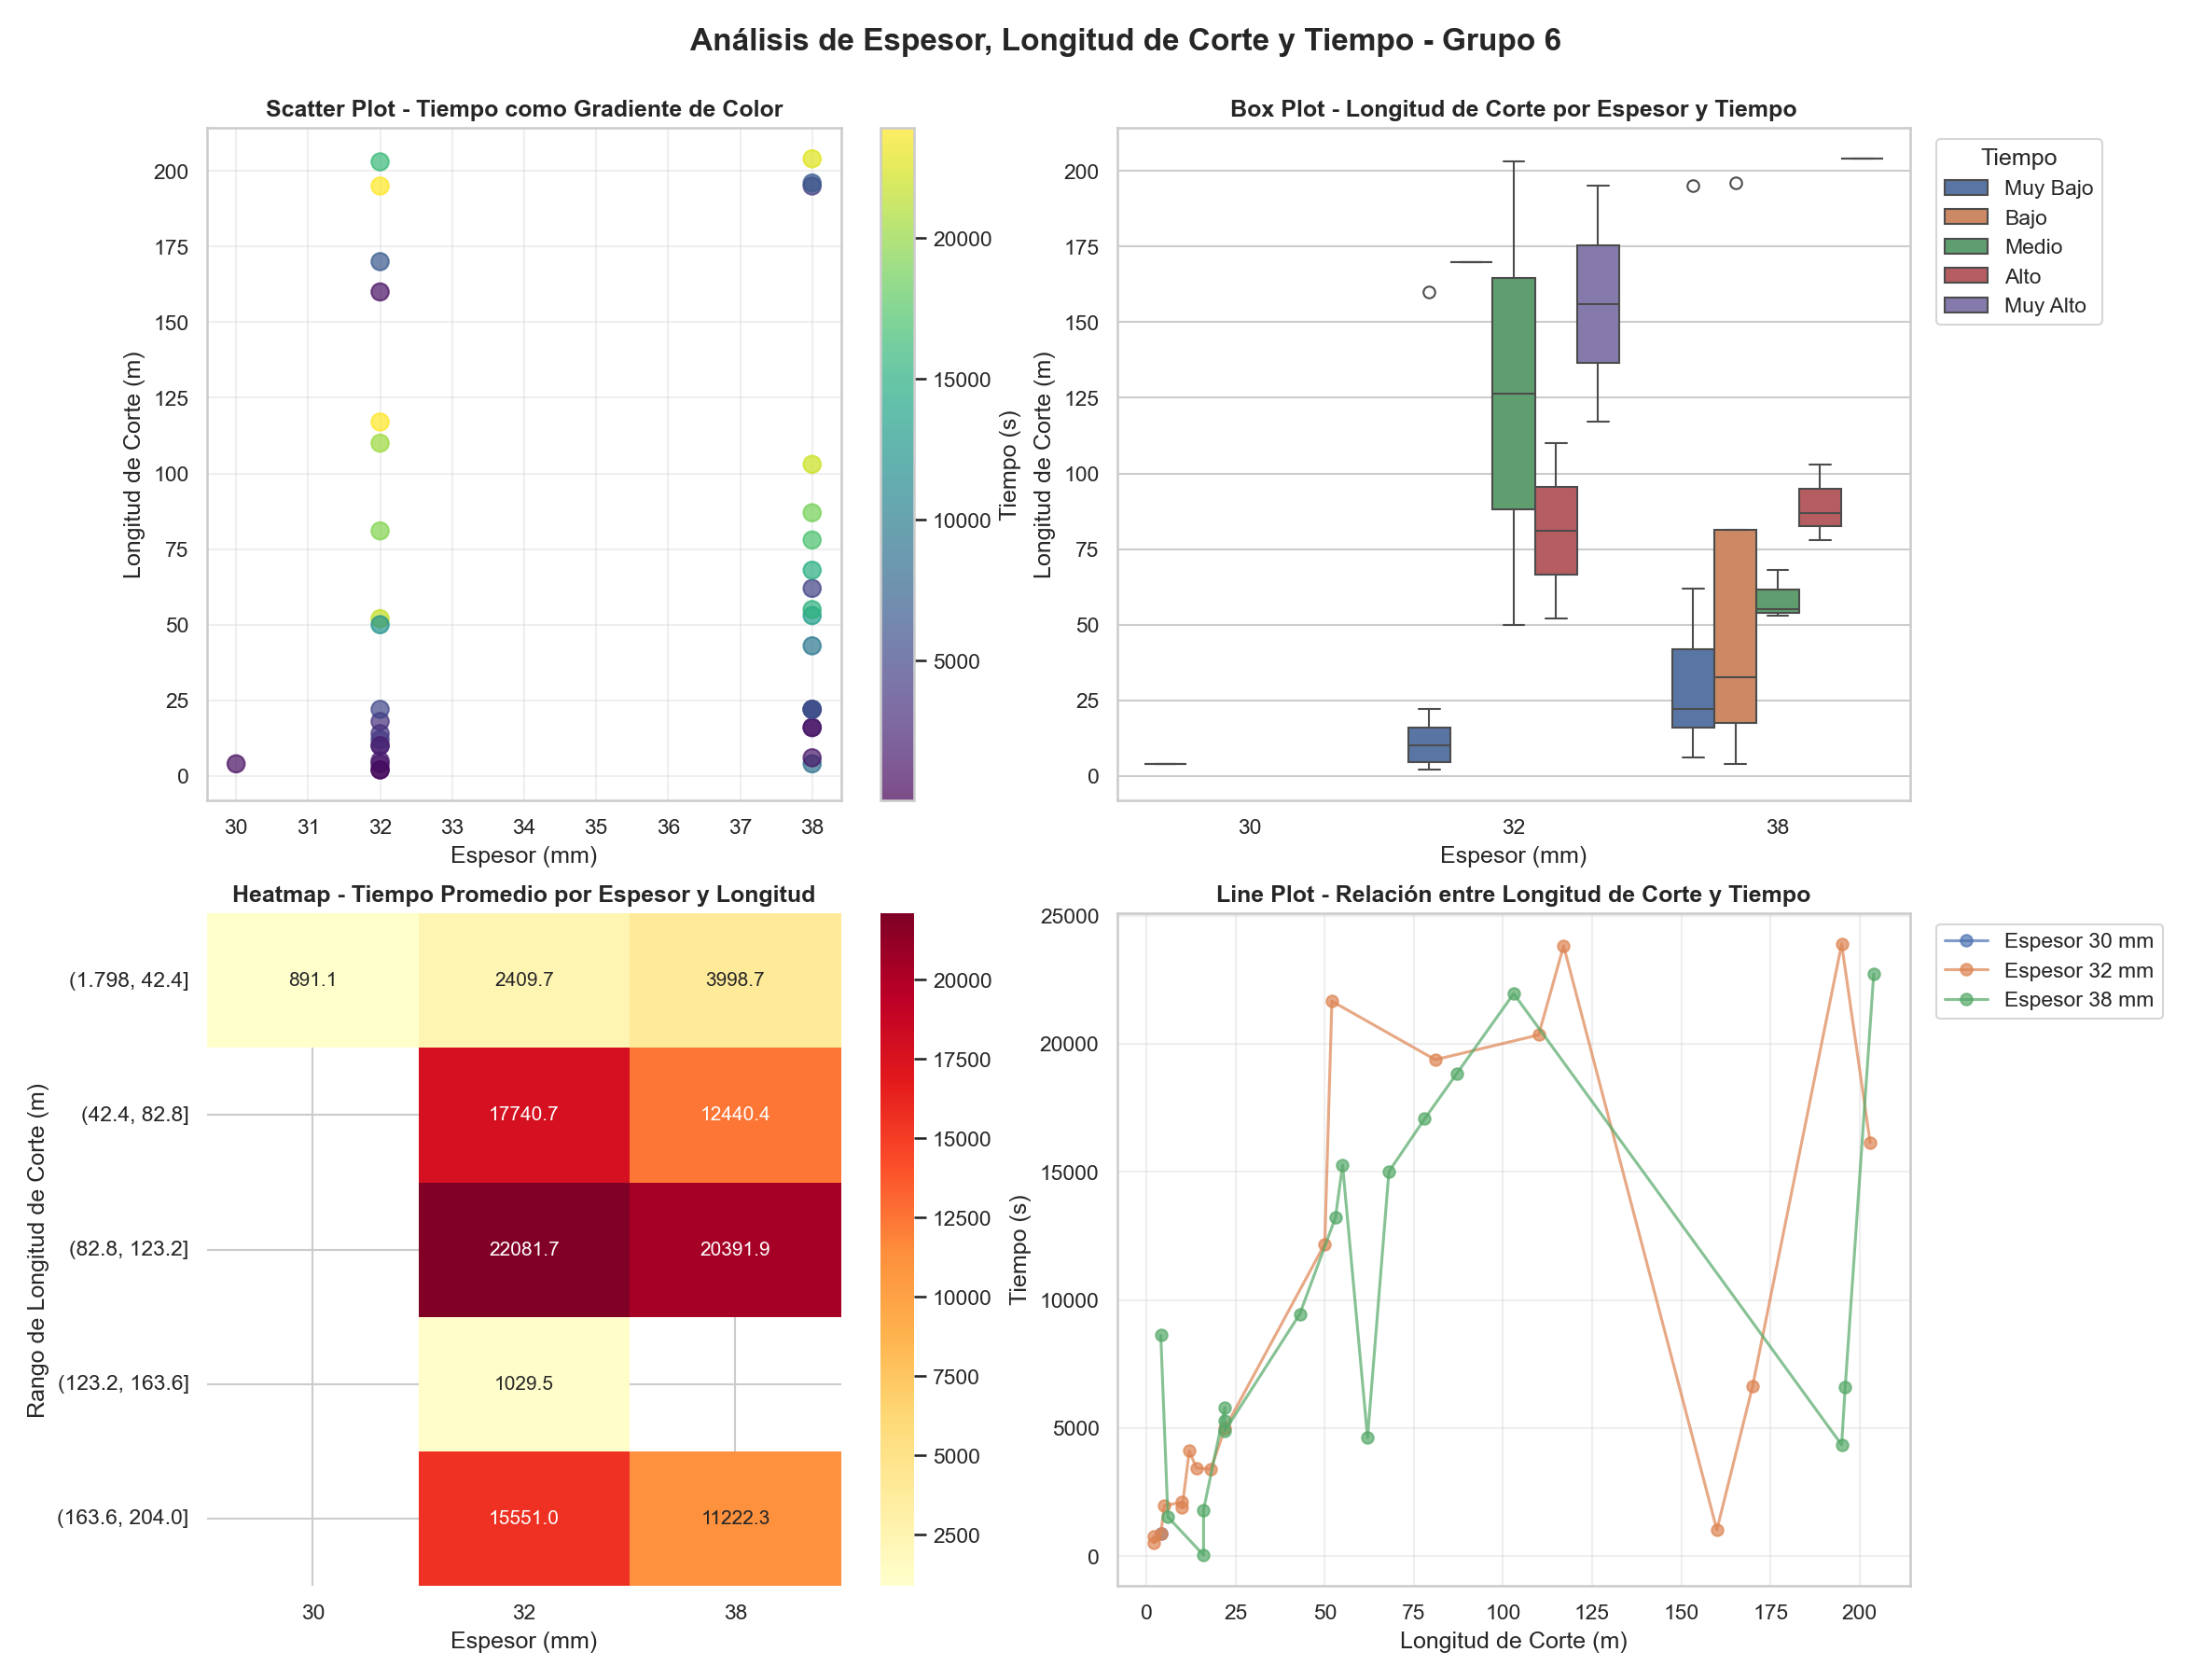

[<Figure size 2400x1800 with 6 Axes>,
 <Figure size 2400x1800 with 6 Axes>,
 <Figure size 2400x1800 with 6 Axes>,
 <Figure size 2400x1800 with 6 Axes>,
 <Figure size 2400x1800 with 6 Axes>,
 <Figure size 2400x1800 with 6 Axes>]

In [19]:
## Material Usage Patterns
# Call the function with the path to your Excel file
file_dir = str(project_root/'data'/'processed'/'clean_data'/'clean_full_tiempo_final.xlsx')
create_espesor_analysis_plots(file_dir)


In [20]:
def create_individual_espesor_plots(file_path, save_dir=None):
    """
    Create individual plots for each espesor showing Longitud de Corte vs Tiempo.
    Creates line plots connecting the data points.

    Parameters:
    -----------
    file_path : str
        Path to the Excel file containing the data
    save_dir : str, optional
        Directory to save the plots. If None, plots are only displayed (default: None)

    Returns:
    --------
    list
        List of matplotlib figure objects created
    """
    # Read the Excel file
    try:
        df = pd.read_excel(file_path)
        print(f"Successfully loaded data from: {file_path}")
        print(f"Data shape: {df.shape}")
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return []

    # Check if required columns exist
    required_columns = ['Espesor', 'Longitude Corte (m)', 'Tiempo']
    missing_columns = [col for col in required_columns if col not in df.columns]

    if missing_columns:
        print(f"Missing required columns: {missing_columns}")
        print(f"Available columns: {df.columns.tolist()}")
        return []

    # Create a copy to avoid modifying the original dataframe
    df = df.copy()

    # Remove rows with missing values in key columns
    df = df.dropna(subset=required_columns)

    # Get unique espesores and sort them
    unique_espesores = sorted(df['Espesor'].unique())
    print(f"Found {len(unique_espesores)} unique espesores: {unique_espesores}")

    # Set style
    sns.set_theme(style="whitegrid")
    plt.rcParams.update({'font.size': 12})

    # List to store figure objects
    figures = []

    # Create one plot for each espesor
    for espesor in unique_espesores:
        # Filter data for current espesor
        df_filtered = df[df['Espesor'] == espesor].copy()

        # Skip if no data for this espesor
        if df_filtered.empty:
            print(f"No data for espesor {espesor}mm")
            continue

        print(f"Processing espesor {espesor}mm - {len(df_filtered)} data points")

        # Sort by Longitud de Corte for proper line connection
        df_filtered = df_filtered.sort_values('Longitude Corte (m)')

        # Create figure
        fig, ax = plt.subplots(1, 1, figsize=(10, 6))
        figures.append(fig)

        # Create line plot with markers
        ax.plot(df_filtered['Longitude Corte (m)'],
                df_filtered['Tiempo'],
                marker='o',
                linestyle='-',
                linewidth=2,
                markersize=8,
                color='#2E86AB',
                markerfacecolor='#2E86AB',
                markeredgecolor='white',
                markeredgewidth=1,
                alpha=0.8,
                label='Datos')

        # Add trend line if there are multiple points
        if len(df_filtered) > 1:
            # Calculate trend line
            x_vals = df_filtered['Longitude Corte (m)']
            y_vals = df_filtered['Tiempo']

            # Remove any NaN values
            mask = ~(pd.isna(x_vals) | pd.isna(y_vals))
            x_clean = x_vals[mask]
            y_clean = y_vals[mask]

            if len(x_clean) > 1:
                try:
                    # Fit polynomial (degree 1 for linear trend)
                    coeffs = np.polyfit(x_clean, y_clean, 1)
                    trend_line = np.poly1d(coeffs)

                    # Calculate R-squared
                    correlation_matrix = np.corrcoef(x_clean, y_clean)
                    r_squared = correlation_matrix[0, 1] ** 2

                    # Plot trend line
                    x_trend = np.linspace(x_clean.min(), x_clean.max(), 100)
                    ax.plot(x_trend, trend_line(x_trend),
                            color='#A23B72',
                            linewidth=2,
                            linestyle='--',
                            alpha=0.8,
                            label=f'Tendencia (R² = {r_squared:.3f})')

                except Exception as e:
                    print(f"Error creating trend line for espesor {espesor}: {e}")

        # Customize the plot
        ax.set_title(f'Longitud de Corte vs Tiempo - Espesor {espesor} mm',
                     fontsize=14, fontweight='bold', pad=20)
        ax.set_xlabel('Longitud de Corte (m)', fontsize=12)
        ax.set_ylabel('Tiempo (s)', fontsize=12)
        ax.grid(True, alpha=0.3)

        # Add statistics box
        stats_text = f'N = {len(df_filtered)}\n'
        stats_text += f'Tiempo promedio: {df_filtered["Tiempo"].mean():.1f}s\n'
        stats_text += f'Longitud promedio: {df_filtered["Longitude Corte (m)"].mean():.2f}m\n'
        stats_text += f'Tiempo min: {df_filtered["Tiempo"].min():.1f}s\n'
        stats_text += f'Tiempo max: {df_filtered["Tiempo"].max():.1f}s'

        ax.text(0.02, 0.98, stats_text,
                transform=ax.transAxes,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                fontsize=9)

        # Add legend
        ax.legend(loc='lower right', frameon=True, fancybox=True, shadow=True)

        # Adjust layout
        plt.tight_layout()

        # Save figure if save_dir is provided
        if save_dir:
            import os
            if not os.path.exists(save_dir):
                os.makedirs(save_dir)
            filename = f'espesor_{espesor}mm_longitud_vs_tiempo.png'
            filepath = os.path.join(save_dir, filename)
            fig.savefig(filepath, dpi=300, bbox_inches='tight')
            print(f"Saved plot: {filepath}")

        plt.show()

    print(f"Created {len(figures)} plots for {len(unique_espesores)} espesores")
    return figures

Successfully loaded data from: /Users/joserubio/Desktop/proyectos/Kupfer/Casos/JKI/data/processed/clean_data/clean_full_tiempo_final.xlsx
Data shape: (602, 5)
Found 18 unique espesores: [2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20, 22, 25, 28, 30, 32, 38]
Processing espesor 2mm - 69 data points


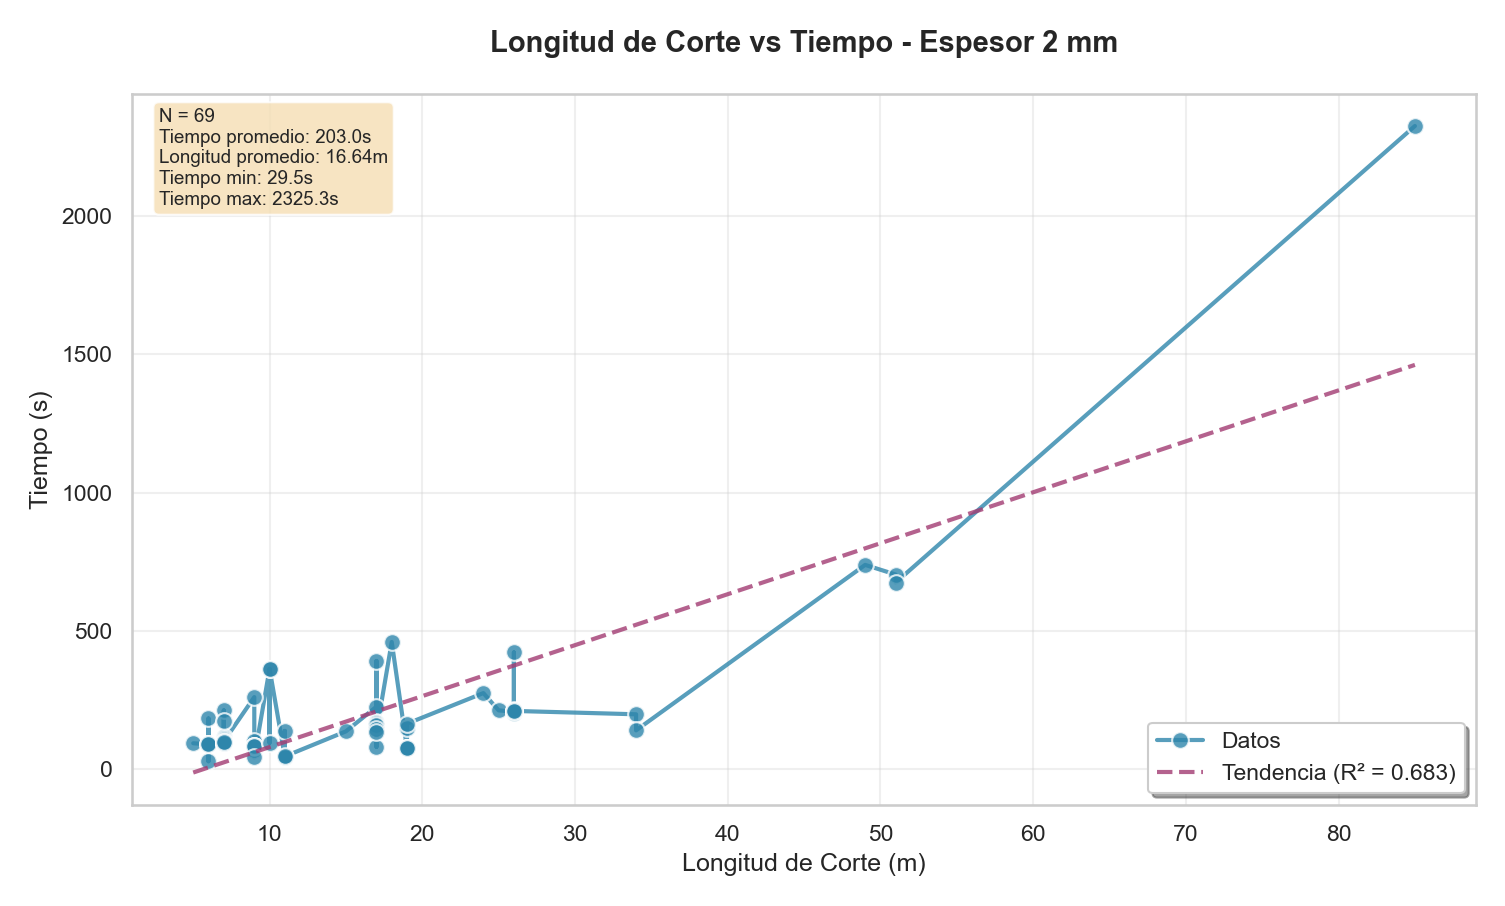

Processing espesor 3mm - 18 data points


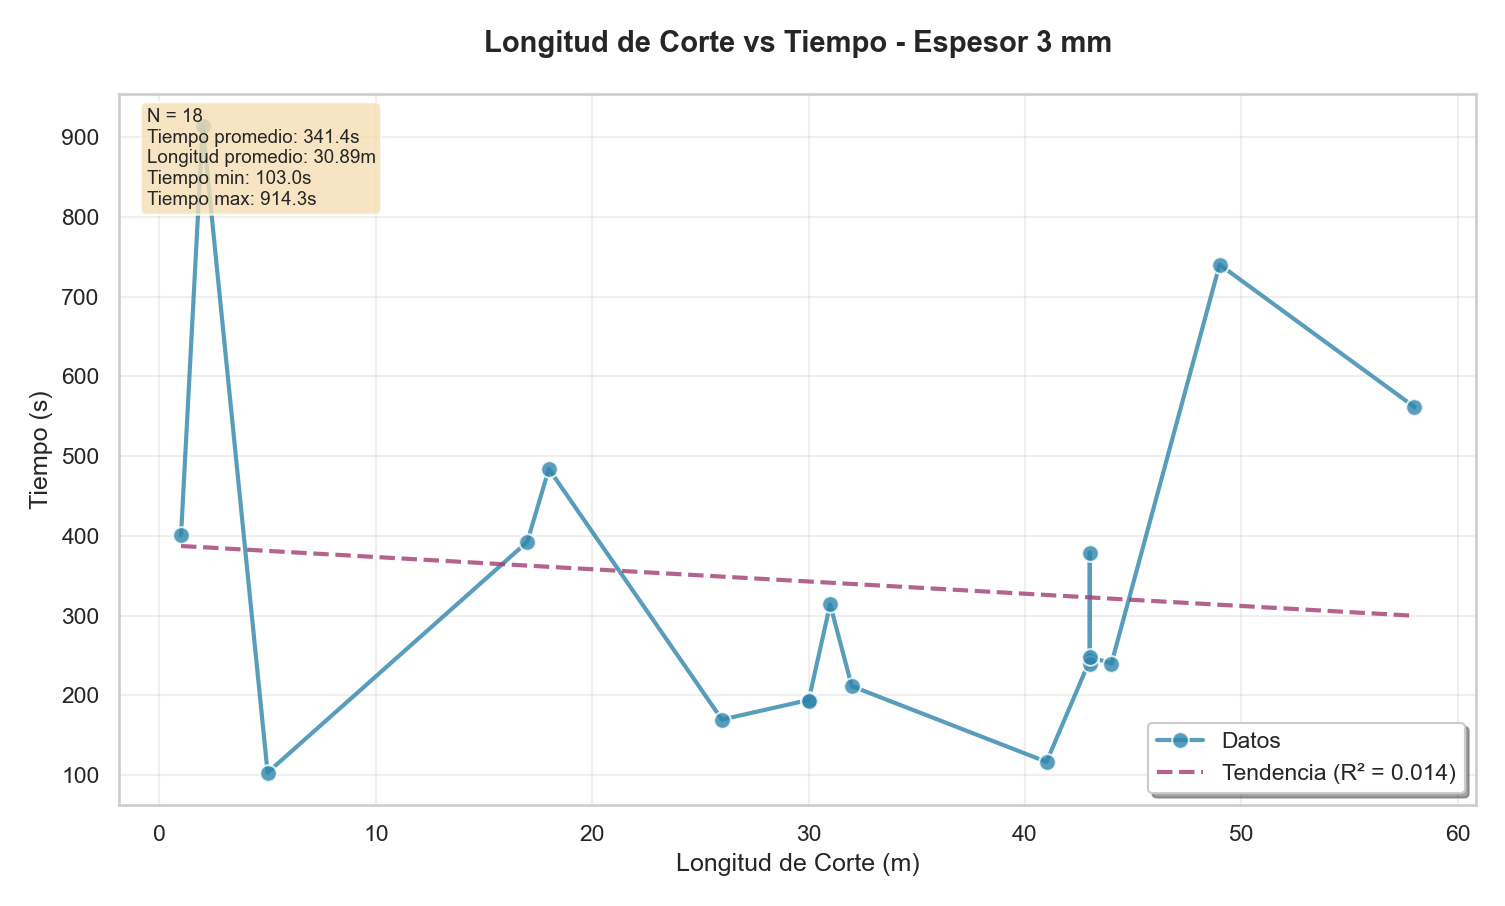

Processing espesor 4mm - 21 data points


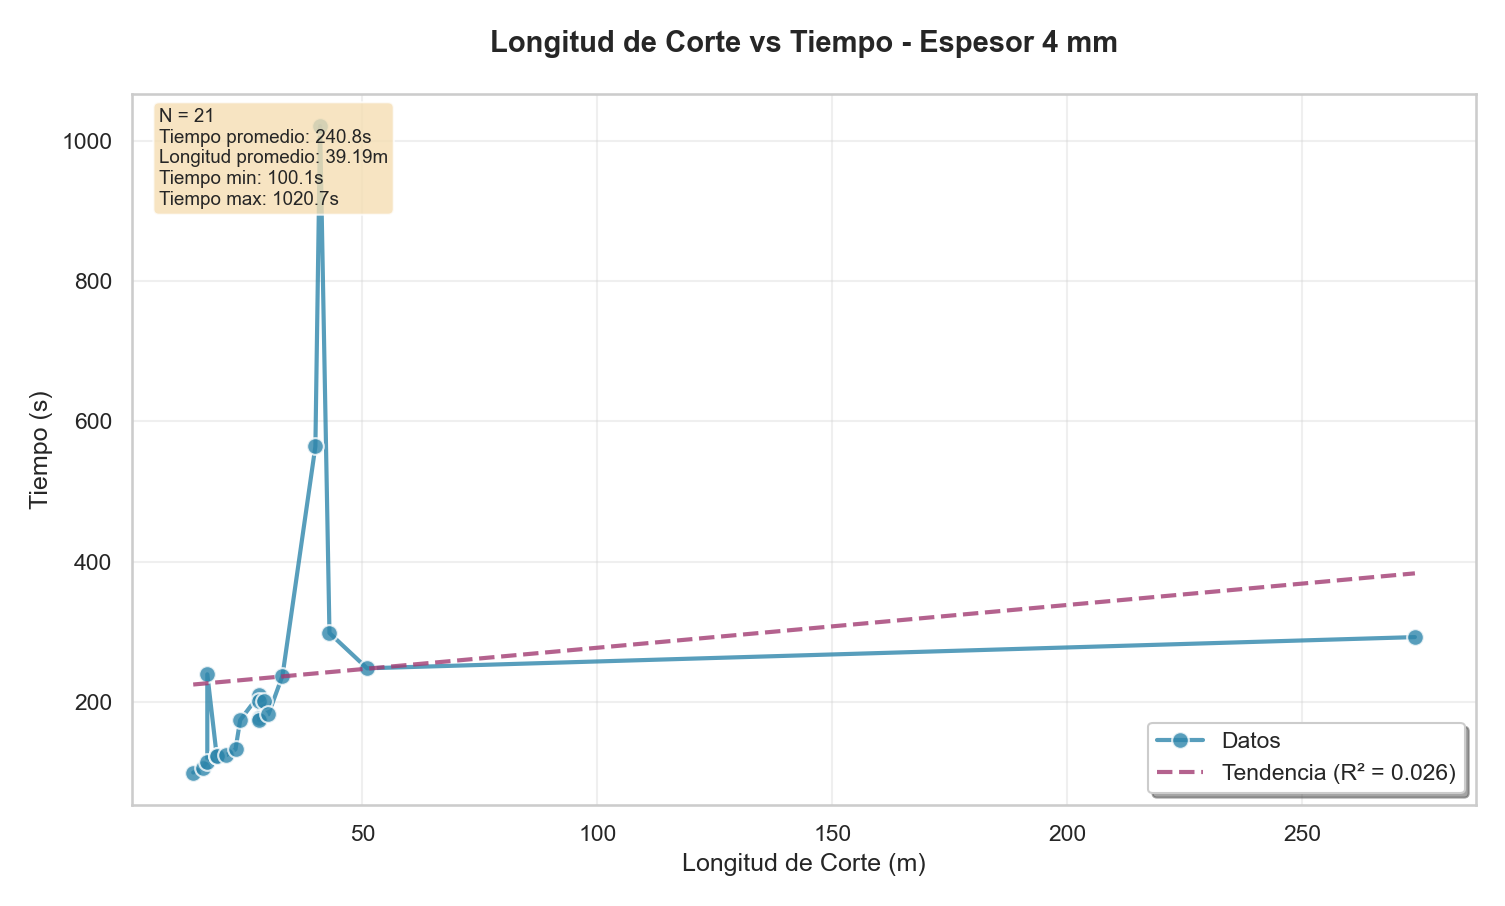

Processing espesor 5mm - 4 data points


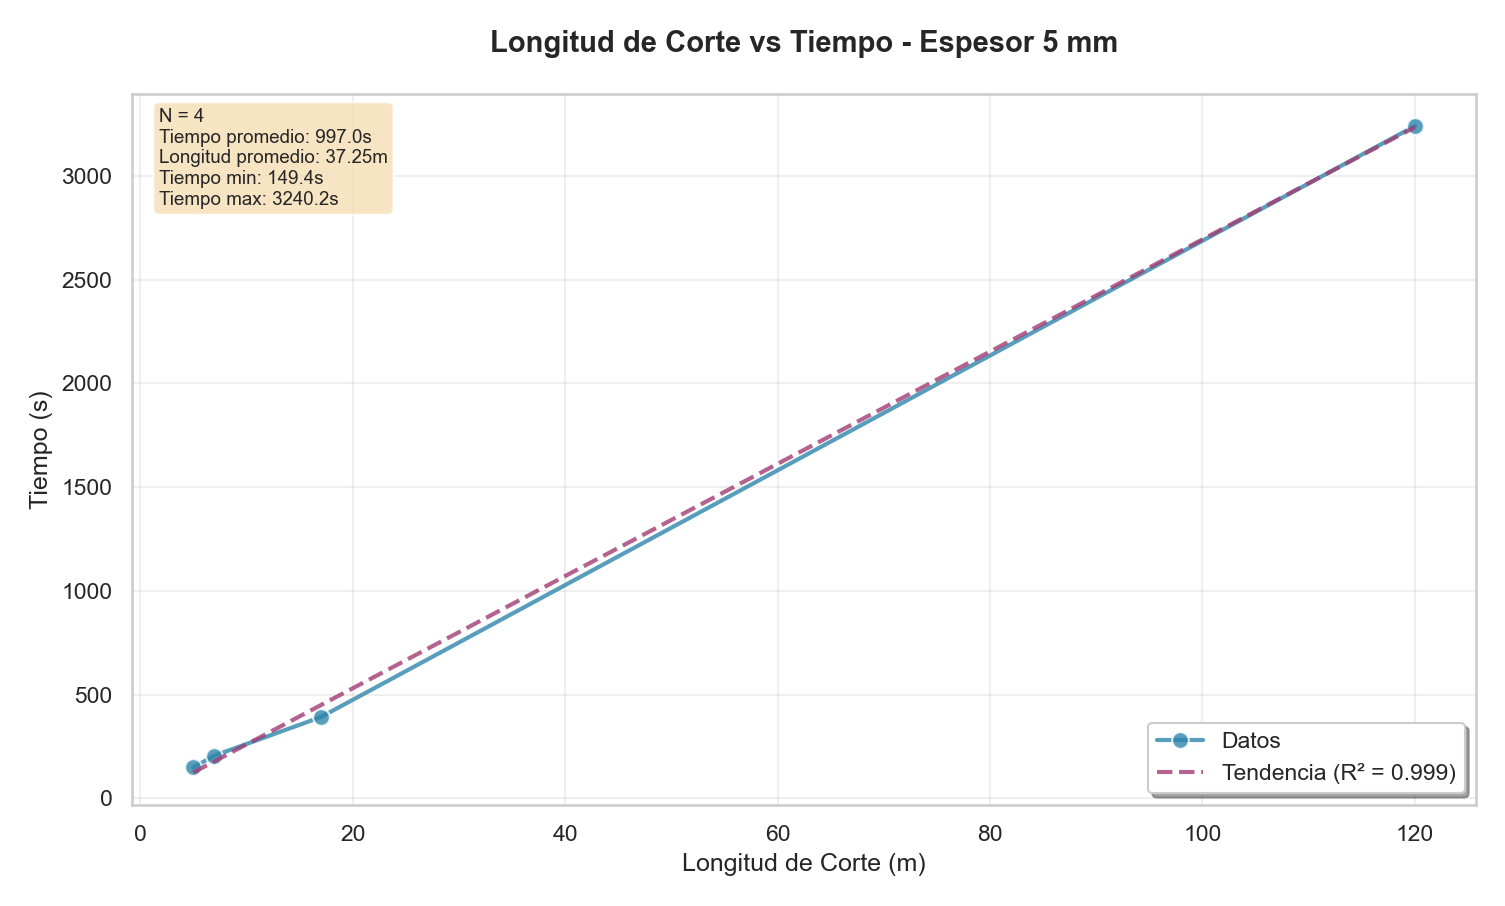

Processing espesor 6mm - 92 data points


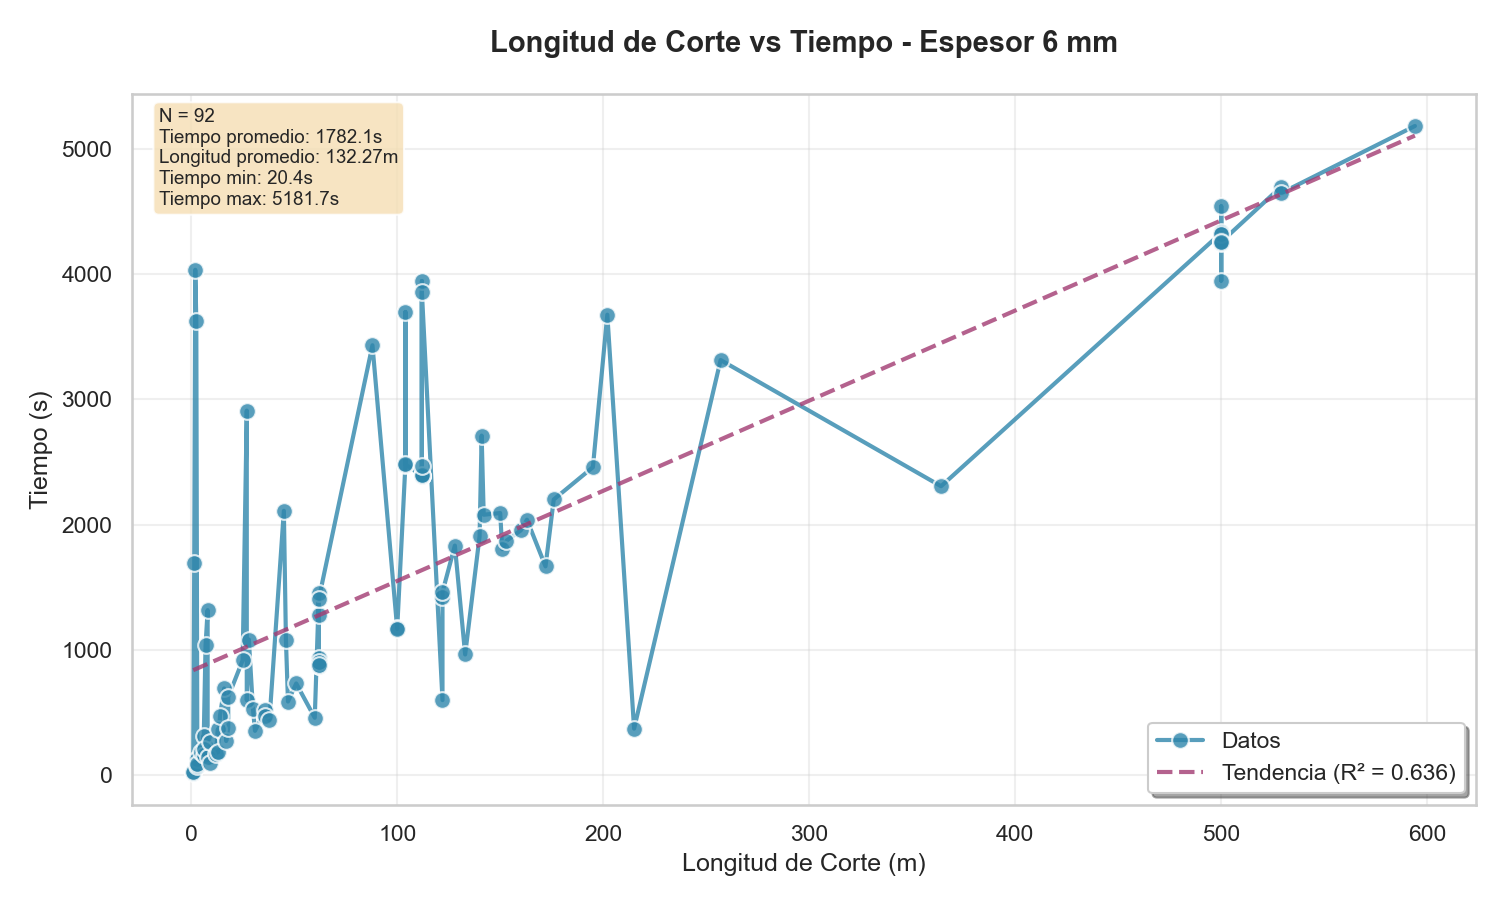

Processing espesor 8mm - 35 data points


Processing espesor 10mm - 99 data points


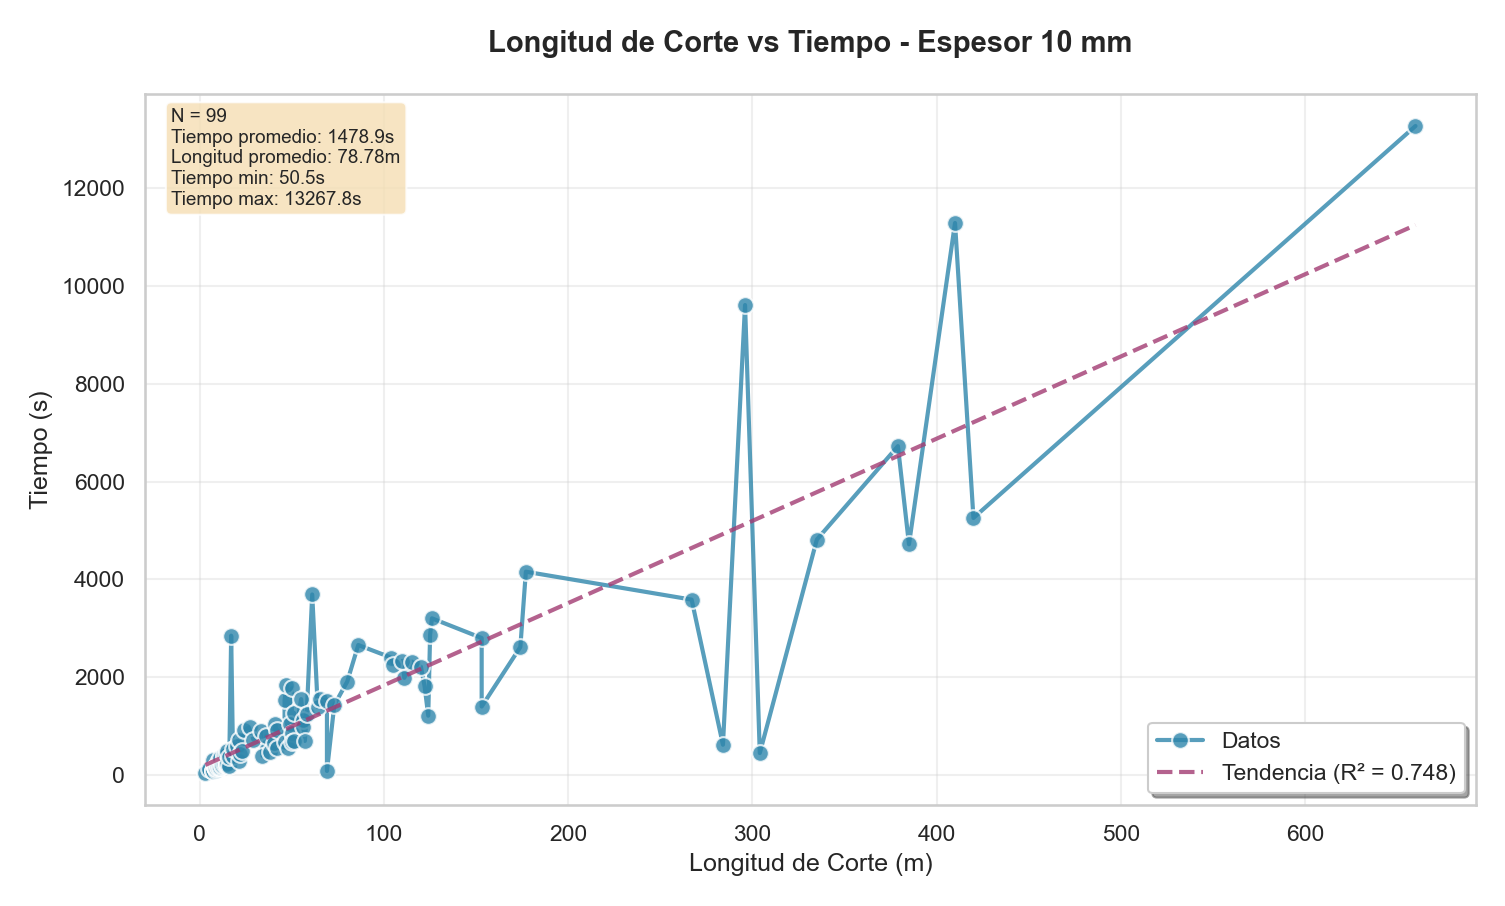

Processing espesor 12mm - 55 data points


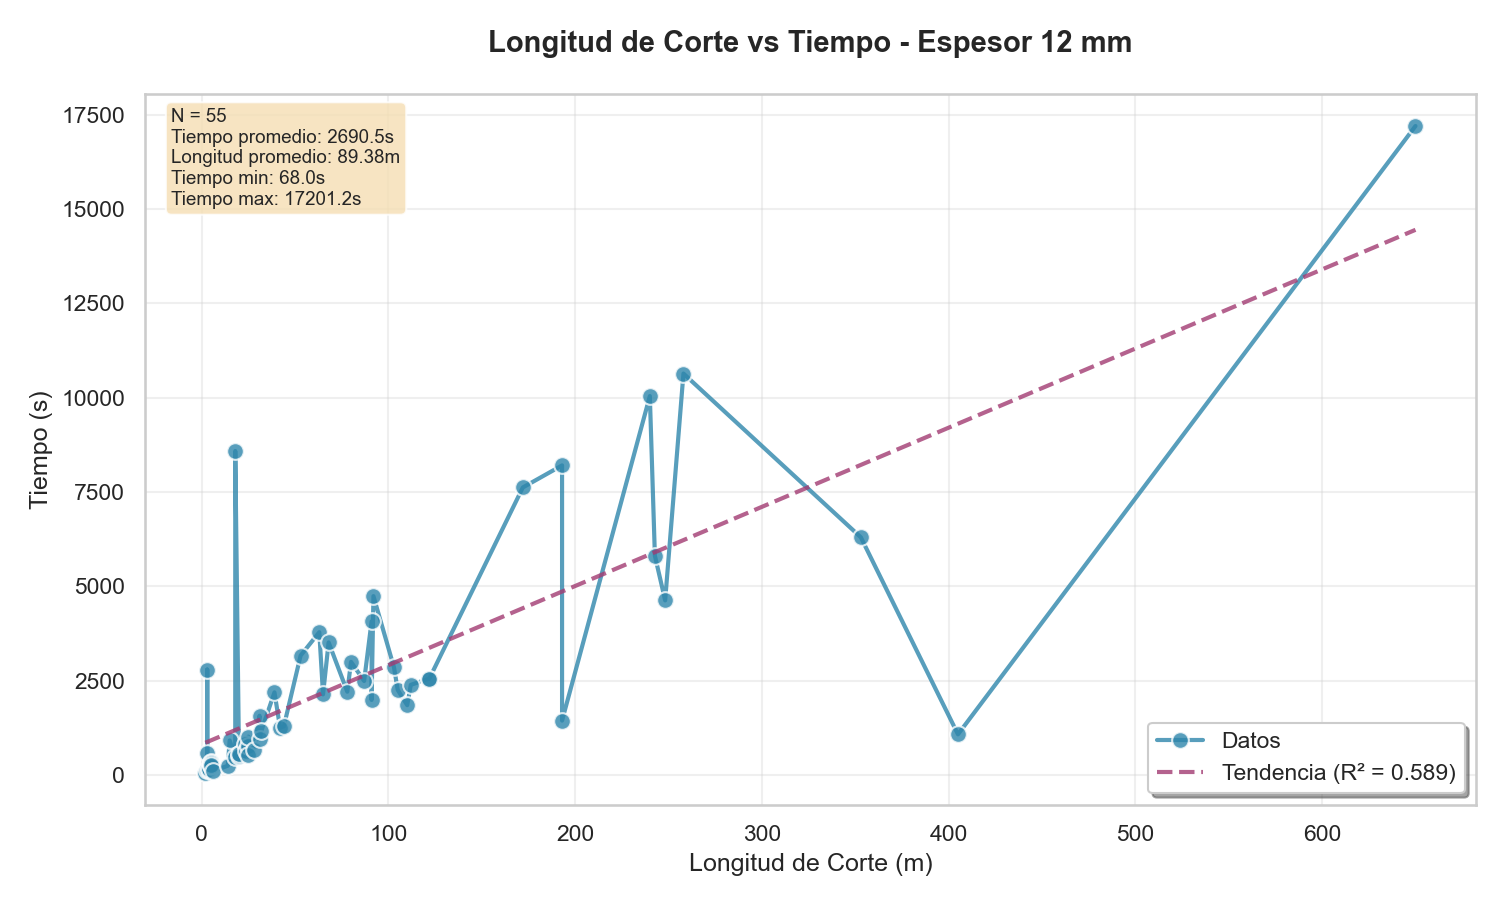

Processing espesor 14mm - 12 data points


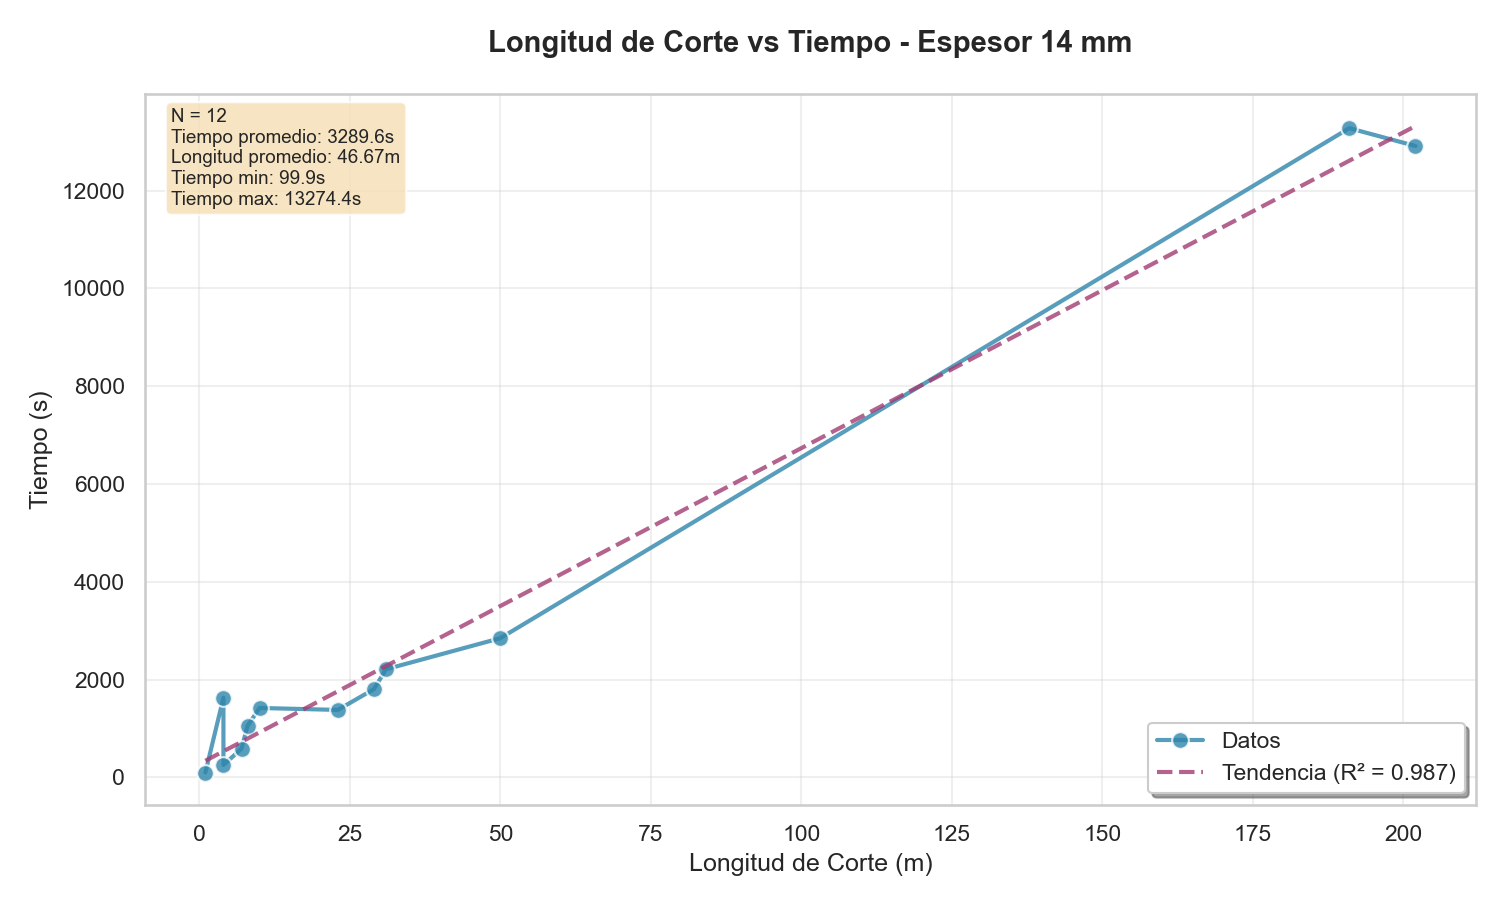

Processing espesor 16mm - 50 data points


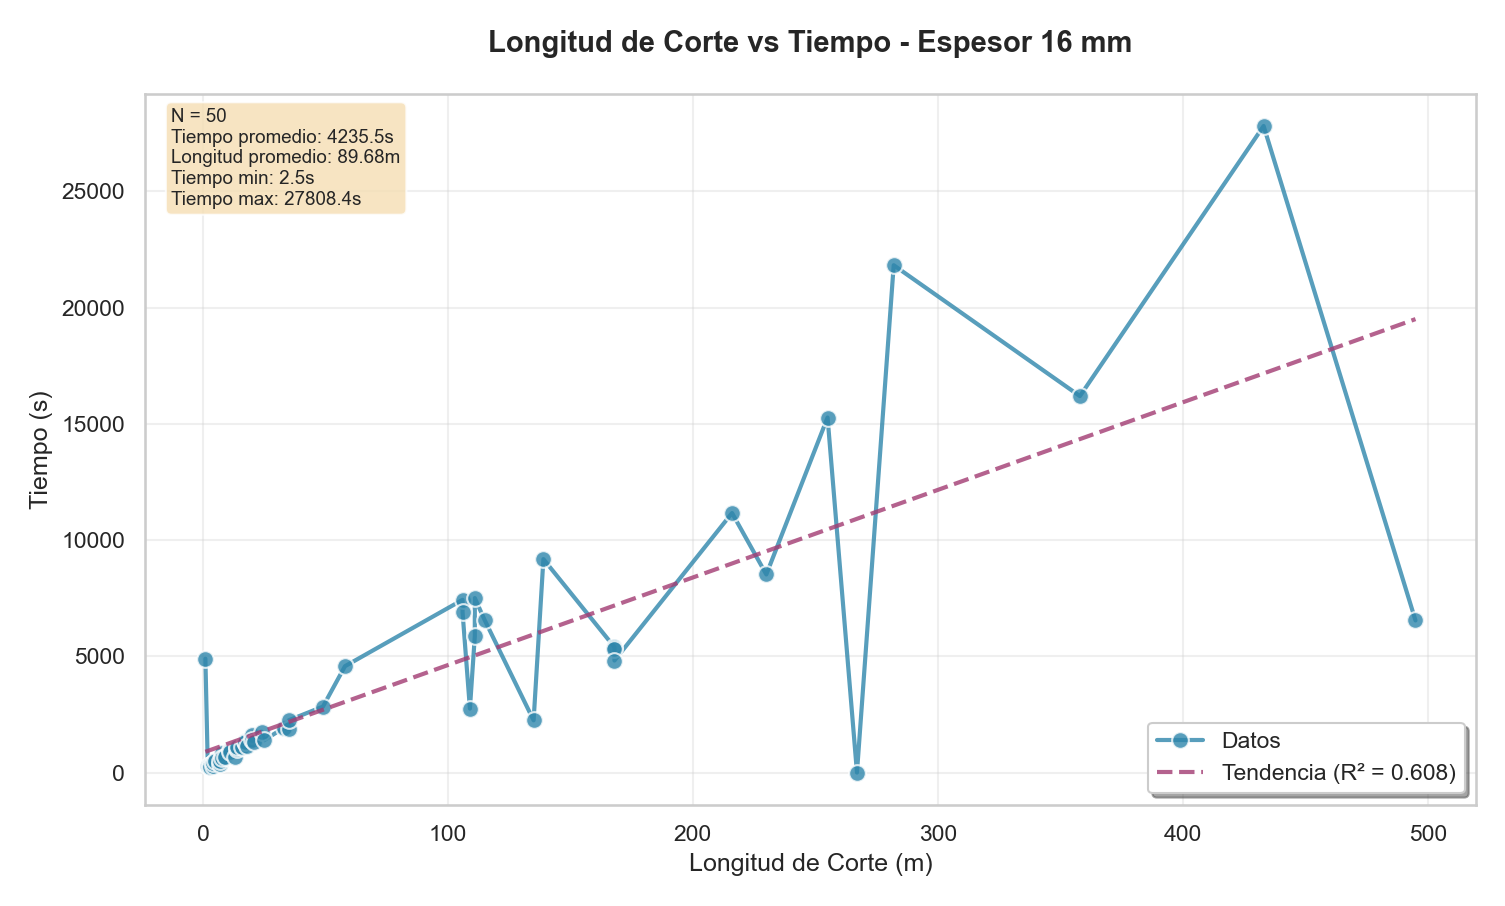

Processing espesor 18mm - 6 data points


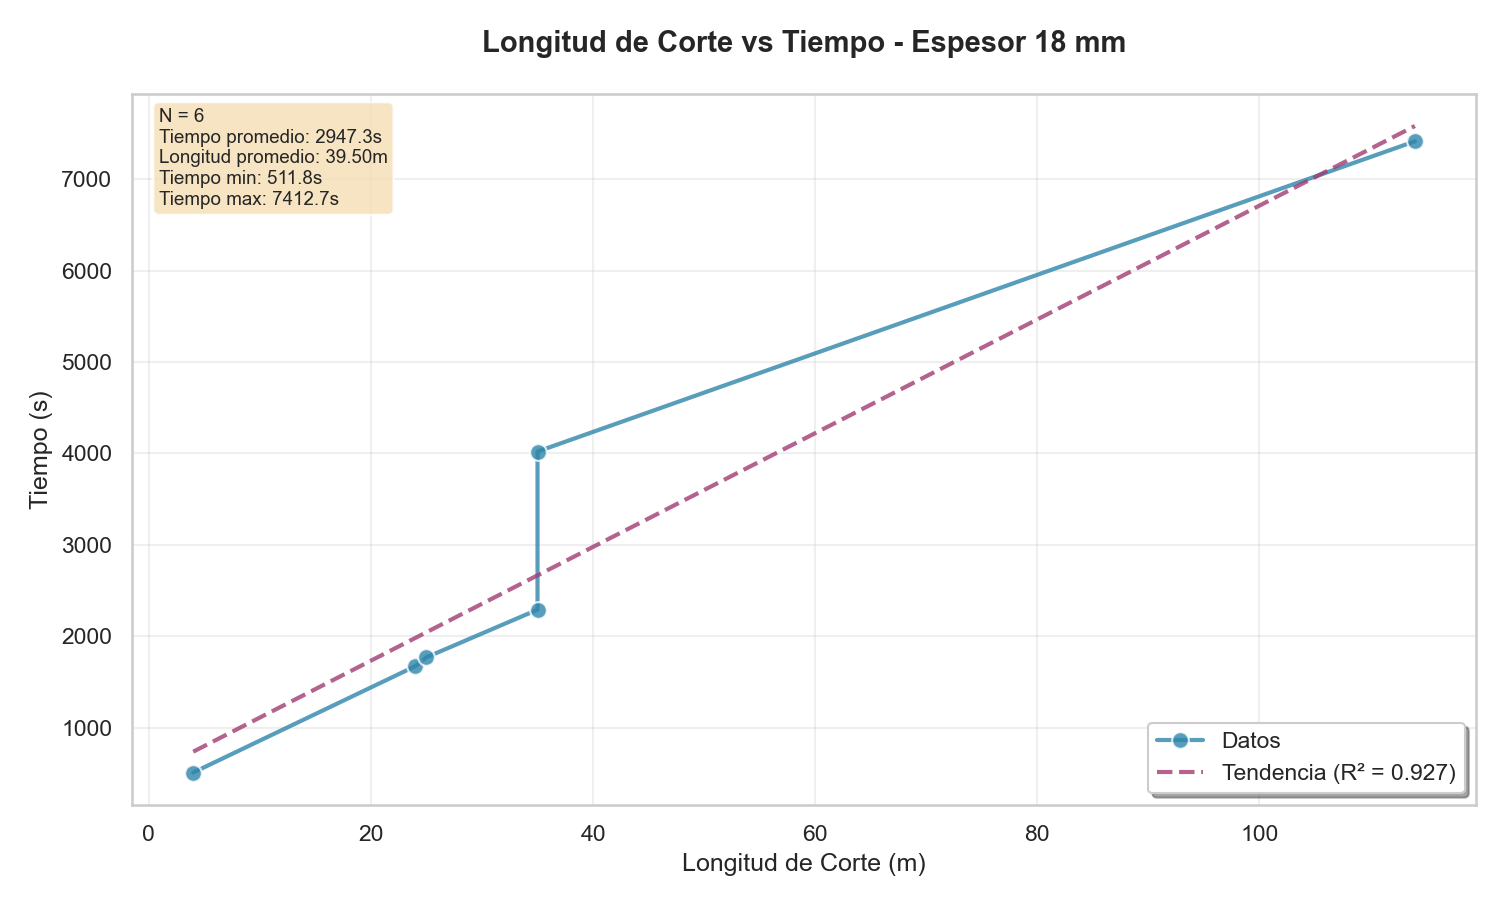

Processing espesor 20mm - 52 data points


Processing espesor 22mm - 1 data points


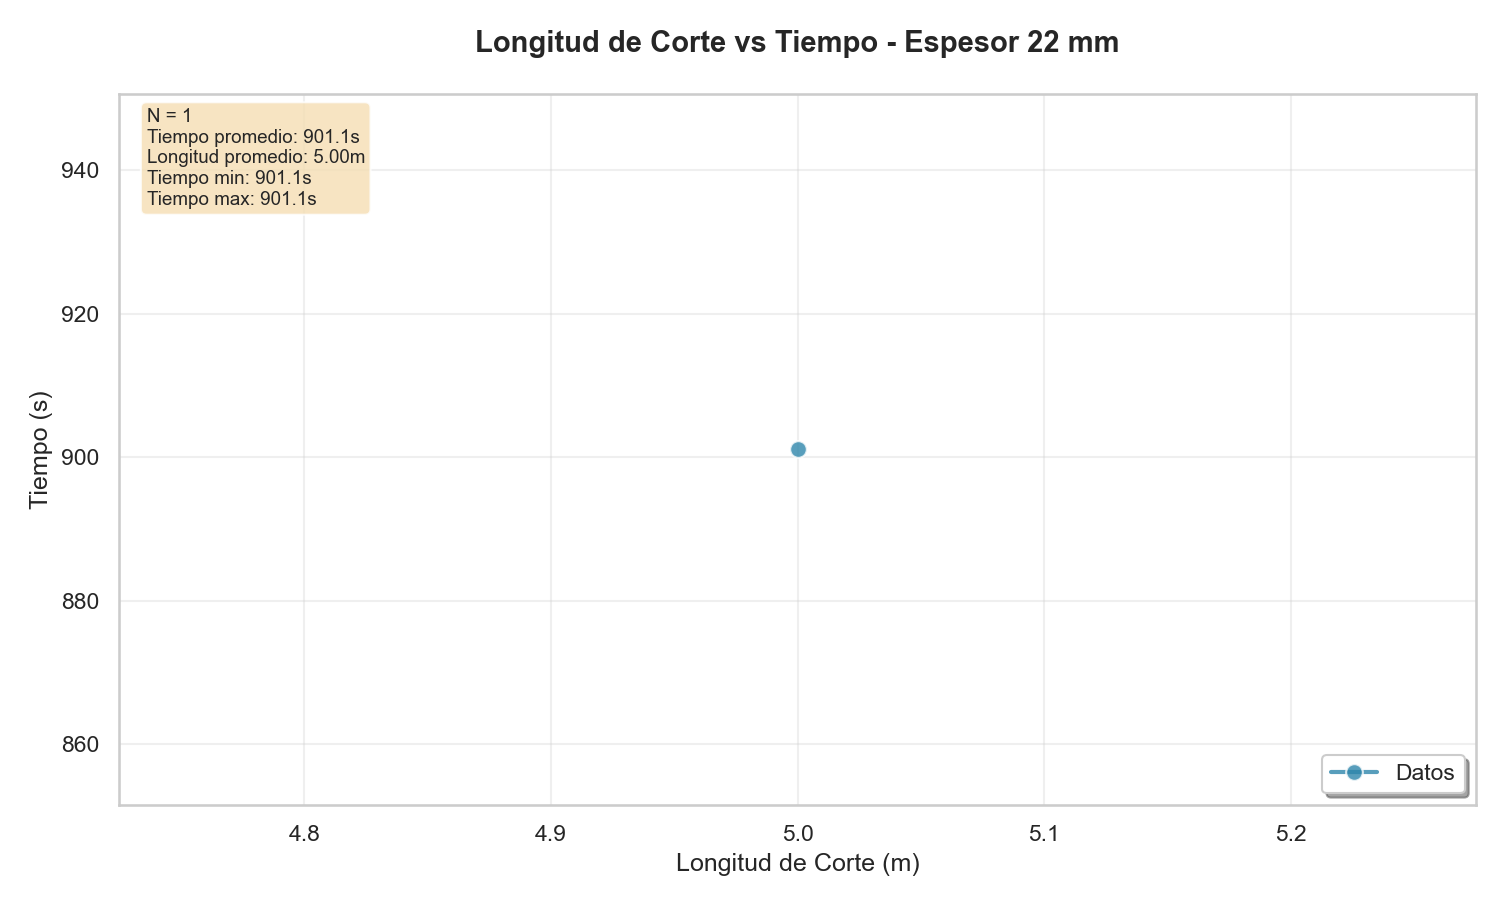

Processing espesor 25mm - 47 data points


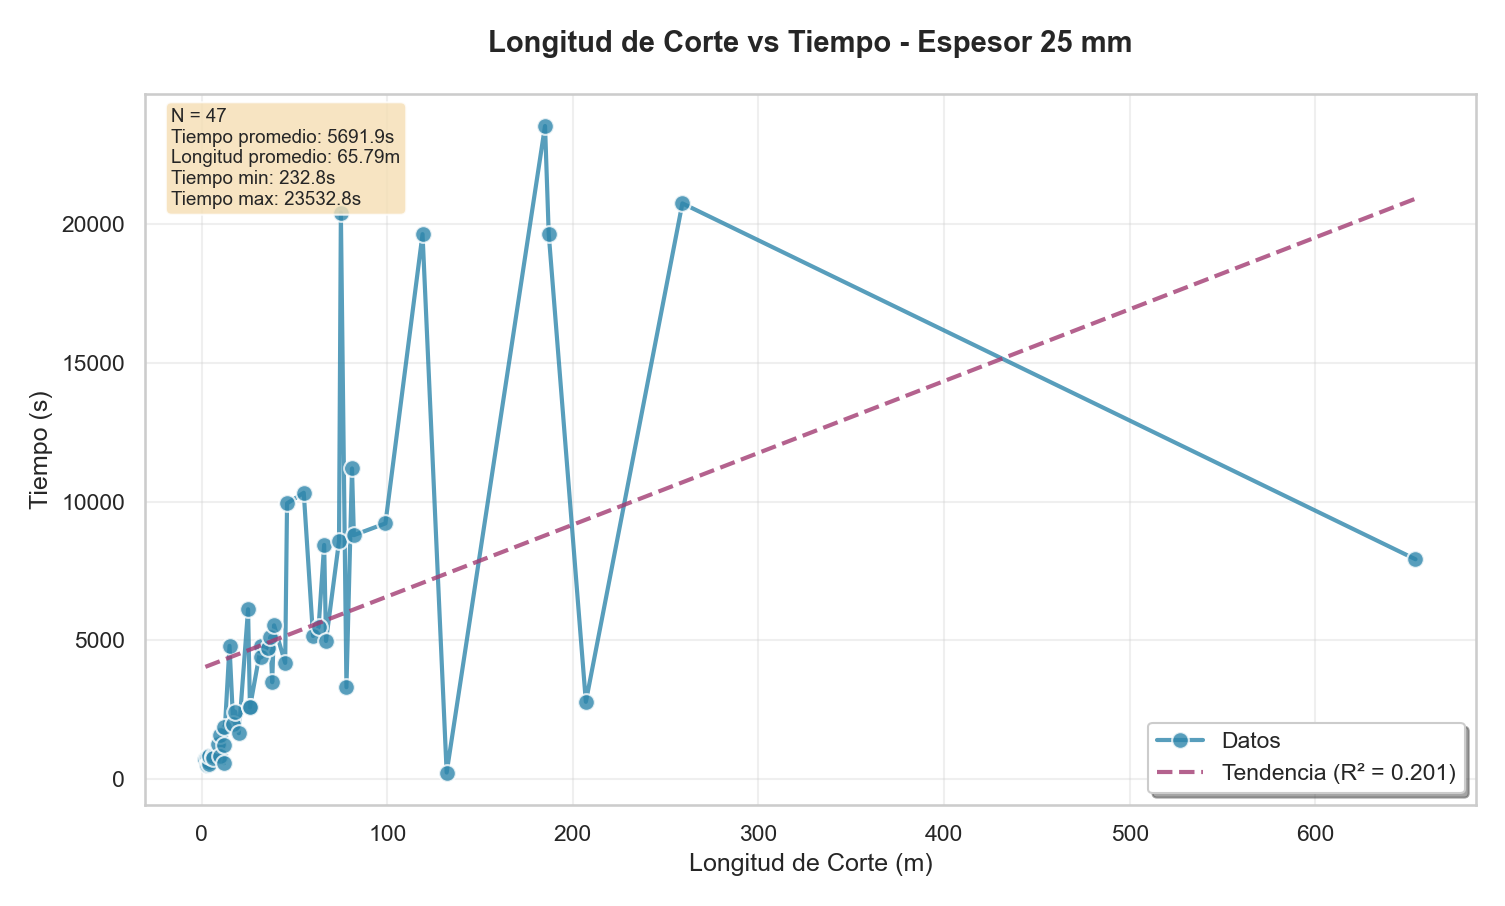

Processing espesor 28mm - 3 data points


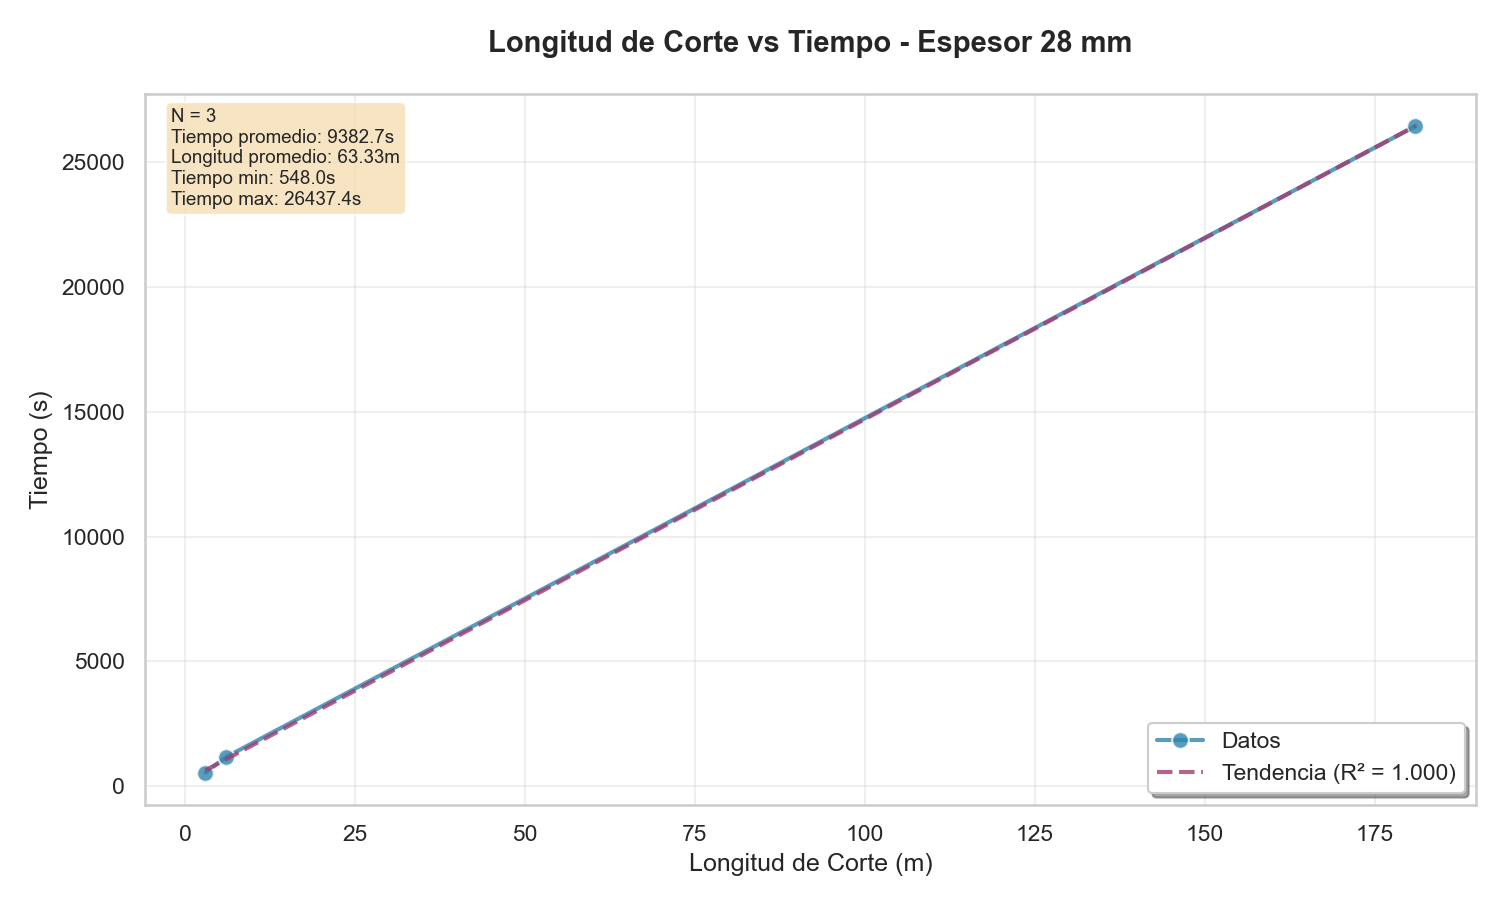

Processing espesor 30mm - 1 data points


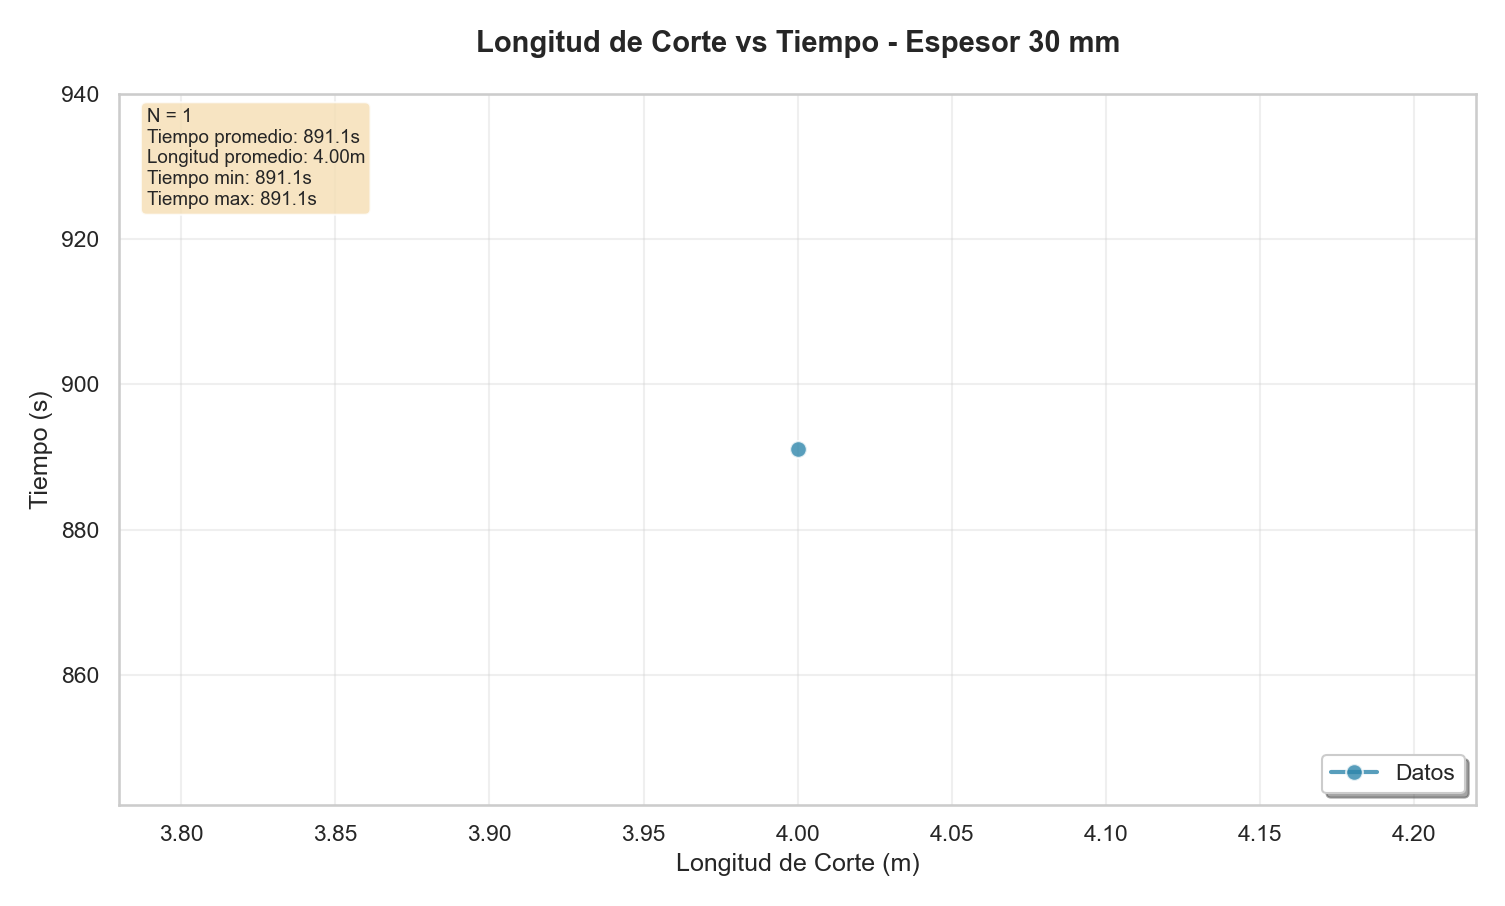

Processing espesor 32mm - 19 data points


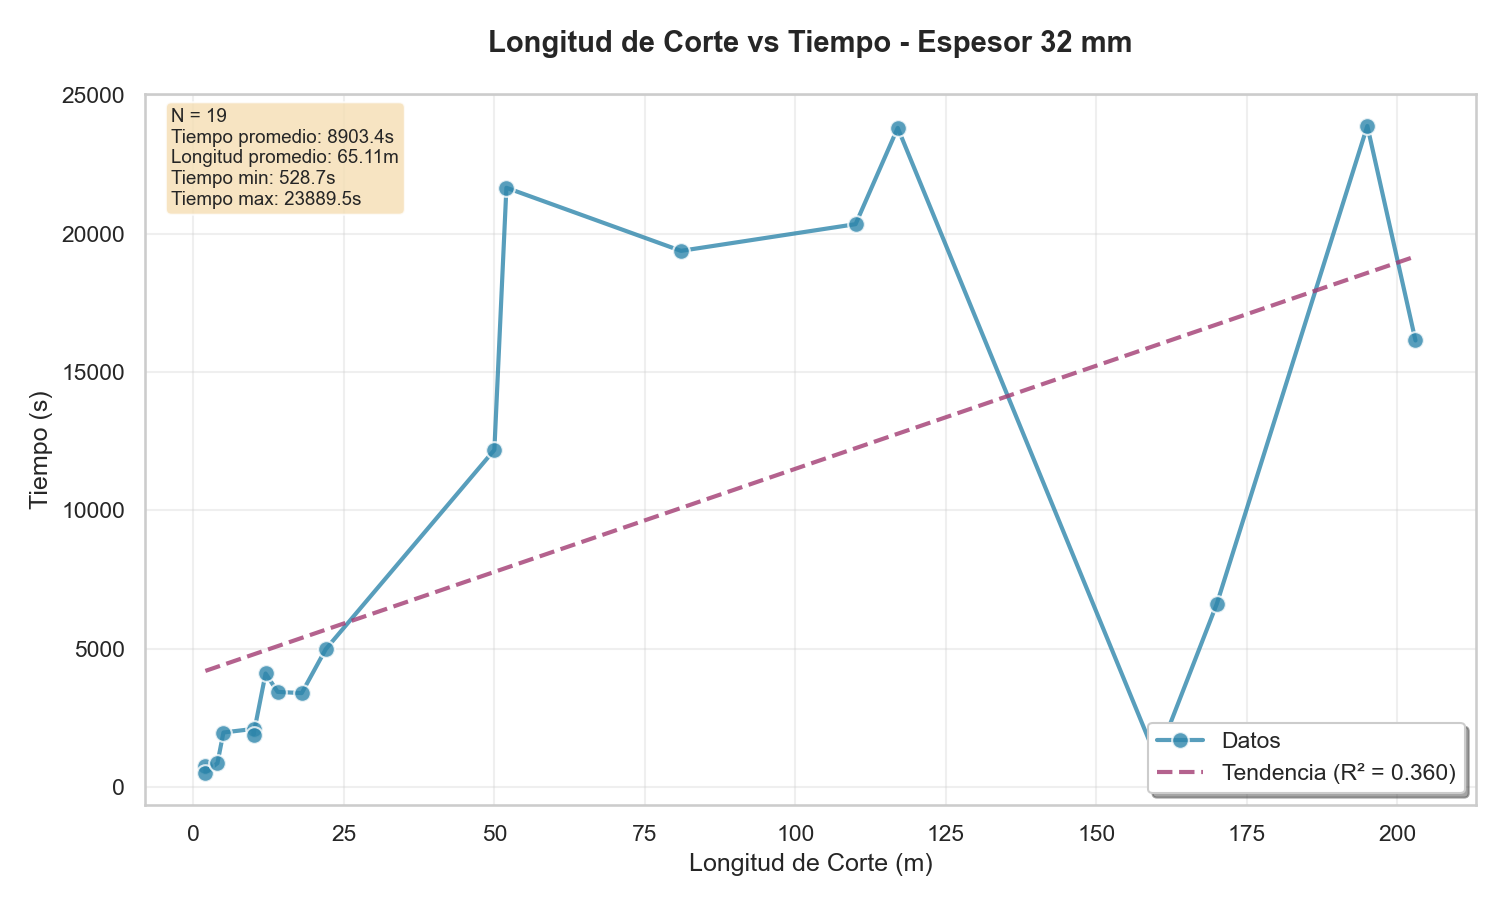

Processing espesor 38mm - 18 data points


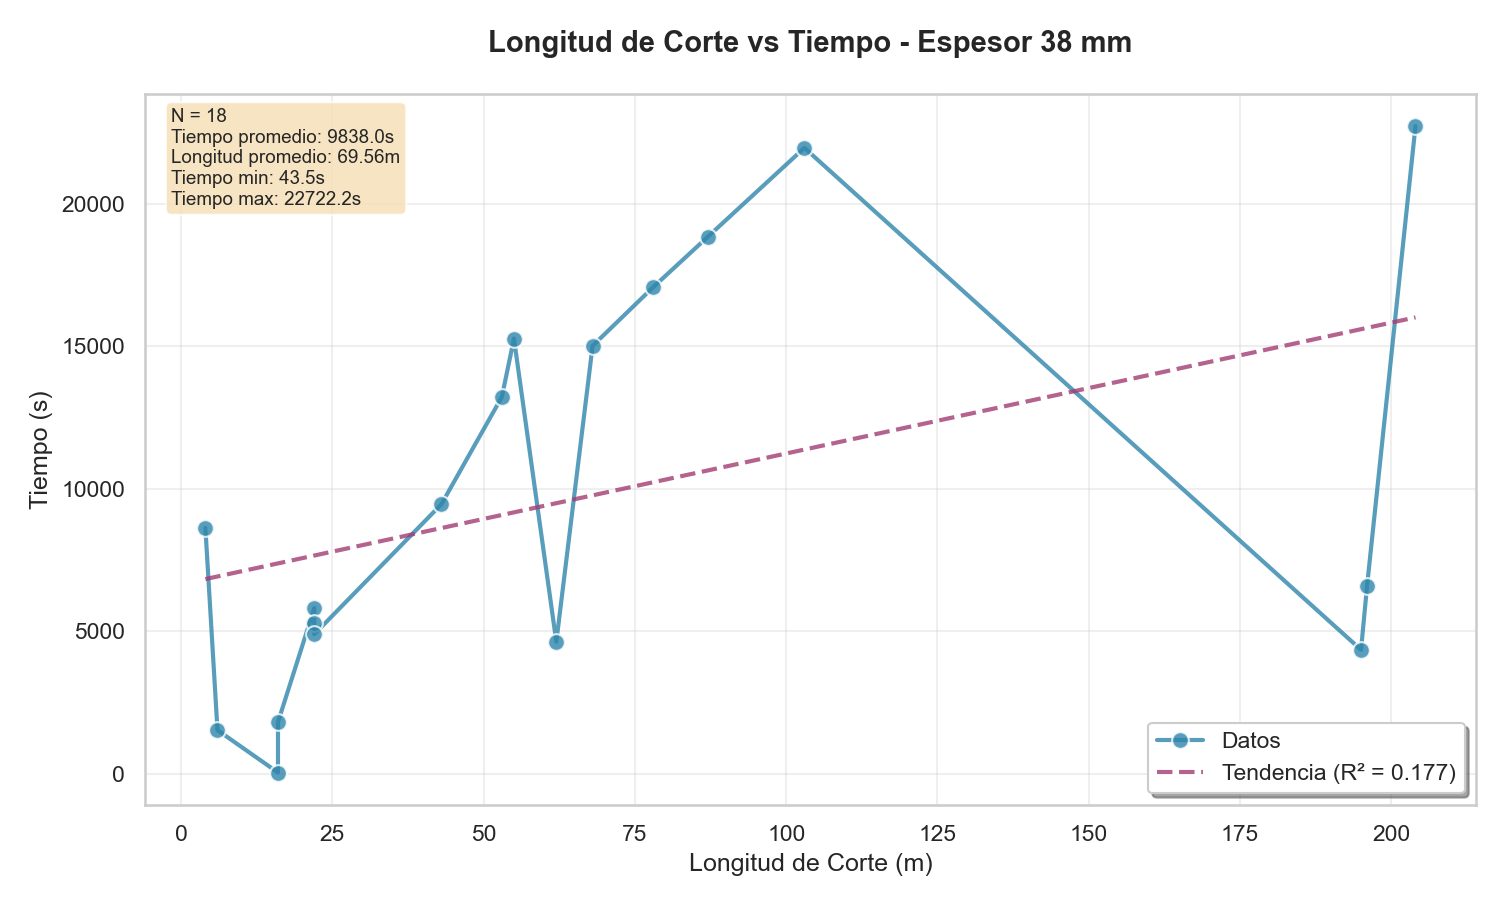

Created 18 plots for 18 espesores


In [21]:
figures = create_individual_espesor_plots(file_dir)

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from datetime import datetime


def prepare_data_for_model(file_path, enforce_monotonic=True):
    """
    Prepare and transform machining data for model training.
    Ensures monotonic relationship: as cutting length increases, time increases.

    Parameters:
    -----------
    file_path : str
        Path to the Excel file containing the data
    enforce_monotonic : bool
        Whether to enforce monotonic relationship per espesor

    Returns:
    --------
    tuple
        (X_train, X_test, y_train, y_test, scaler, df_processed, feature_columns)
    """

    # Load data
    df = pd.read_excel(file_path)
    print(f"Original data shape: {df.shape}")

    # Required columns
    required_columns = ['Espesor', 'Longitude Corte (m)', 'Tiempo']
    df = df[required_columns].copy()

    # Remove missing values
    df = df.dropna()
    print(f"After removing NaN: {df.shape}")

    # Remove negative or zero values
    df = df[(df['Longitude Corte (m)'] > 0) & (df['Tiempo'] > 0)]
    print(f"After removing invalid values: {df.shape}")

    # Process each espesor separately to ensure monotonic relationship
    processed_dfs = []

    for espesor in sorted(df['Espesor'].unique()):
        espesor_df = df[df['Espesor'] == espesor].copy()

        if len(espesor_df) < 2:
            continue

        # Sort by cutting length
        espesor_df = espesor_df.sort_values('Longitude Corte (m)')

        if enforce_monotonic:
            # Ensure monotonic relationship: time should increase with cutting length
            espesor_df['Tiempo_monotonic'] = espesor_df['Tiempo'].cummax()
            espesor_df['Tiempo'] = espesor_df['Tiempo_monotonic']
            espesor_df.drop('Tiempo_monotonic', axis=1, inplace=True)

        # Create additional features for this espesor
        espesor_df['Cutting_Length_Squared'] = espesor_df['Longitude Corte (m)'] ** 2
        espesor_df['Cutting_Rate'] = espesor_df['Tiempo'] / espesor_df['Longitude Corte (m)']  # Time per meter
        espesor_df['Espesor_Squared'] = espesor_df['Espesor'] ** 2
        espesor_df['Length_Thickness_Interaction'] = espesor_df['Longitude Corte (m)'] * espesor_df['Espesor']

        processed_dfs.append(espesor_df)

    # Combine all processed data
    df_processed = pd.concat(processed_dfs, ignore_index=True)
    print(f"Final processed data shape: {df_processed.shape}")

    # Prepare features and target
    feature_columns = [
        'Espesor',
        'Longitude Corte (m)',
        'Cutting_Length_Squared',
        'Espesor_Squared',
        'Length_Thickness_Interaction'
    ]

    X = df_processed[feature_columns]
    y = df_processed['Tiempo']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=df_processed['Espesor']
    )

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.values)
    X_test_scaled = scaler.transform(X_test.values)

    print(f"Training set shape: {X_train_scaled.shape}")
    print(f"Test set shape: {X_test_scaled.shape}")

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, df_processed, feature_columns


def train_espesor_model(X_train, X_test, y_train, y_test, model_type='random_forest'):
    """
    Train a model to predict machining time for all espesores.

    Parameters:
    -----------
    X_train, X_test : array-like
        Training and test features
    y_train, y_test : array-like
        Training and test targets
    model_type : str
        Type of model to use ('random_forest', 'linear')

    Returns:
    --------
    tuple
        (trained_model, predictions, metrics)
    """

    if model_type == 'random_forest':
        model = RandomForestRegressor(
            n_estimators=100,
            max_depth=10,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42
        )
    else:
        model = LinearRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    metrics = {
        'train_r2': r2_score(y_train, y_pred_train),
        'test_r2': r2_score(y_test, y_pred_test),
        'train_mse': mean_squared_error(y_train, y_pred_train),
        'test_mse': mean_squared_error(y_test, y_pred_test),
        'train_mae': mean_absolute_error(y_train, y_pred_train),
        'test_mae': mean_absolute_error(y_test, y_pred_test)
    }

    # Print metrics
    print(f"\n=== {model_type.upper()} MODEL RESULTS ===")
    print(f"Training R²: {metrics['train_r2']:.4f}")
    print(f"Test R²: {metrics['test_r2']:.4f}")
    print(f"Training MAE: {metrics['train_mae']:.2f} seconds")
    print(f"Test MAE: {metrics['test_mae']:.2f} seconds")
    print(f"Training RMSE: {np.sqrt(metrics['train_mse']):.2f} seconds")
    print(f"Test RMSE: {np.sqrt(metrics['test_mse']):.2f} seconds")

    return model, y_pred_test, metrics


def plot_model_results(y_test, y_pred_test, df_processed, model_type='Model'):
    """
    Plot model results and performance.
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Actual vs Predicted
    axes[0, 0].scatter(y_test, y_pred_test, alpha=0.6)
    axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0, 0].set_xlabel('Actual Time (seconds)')
    axes[0, 0].set_ylabel('Predicted Time (seconds)')
    axes[0, 0].set_title(f'{model_type}: Actual vs Predicted')
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Residuals plot
    residuals = y_test - y_pred_test
    axes[0, 1].scatter(y_pred_test, residuals, alpha=0.6)
    axes[0, 1].axhline(y=0, color='r', linestyle='--')
    axes[0, 1].set_xlabel('Predicted Time (seconds)')
    axes[0, 1].set_ylabel('Residuals')
    axes[0, 1].set_title(f'{model_type}: Residuals Plot')
    axes[0, 1].grid(True, alpha=0.3)

    # 3. Distribution of residuals
    axes[1, 0].hist(residuals, bins=30, alpha=0.7, edgecolor='black')
    axes[1, 0].set_xlabel('Residuals')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title(f'{model_type}: Residuals Distribution')
    axes[1, 0].grid(True, alpha=0.3)

    # 4. Performance by Espesor
    espesor_performance = []
    for espesor in sorted(df_processed['Espesor'].unique()):
        espesor_mask = df_processed['Espesor'] == espesor
        if espesor_mask.sum() > 0:
            espesor_data = df_processed[espesor_mask]
            espesor_performance.append({
                'Espesor': espesor,
                'Count': len(espesor_data),
                'Avg_Time': espesor_data['Tiempo'].mean(),
                'Std_Time': espesor_data['Tiempo'].std()
            })

    perf_df = pd.DataFrame(espesor_performance)
    axes[1, 1].bar(perf_df['Espesor'], perf_df['Avg_Time'], alpha=0.7)
    axes[1, 1].set_xlabel('Espesor (mm)')
    axes[1, 1].set_ylabel('Average Time (seconds)')
    axes[1, 1].set_title('Average Machining Time by Espesor')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return perf_df


def predict_new_job(model, scaler, espesor, cutting_length, feature_columns):
    """
    Predict machining time for a new job.

    Parameters:
    -----------
    model : trained model
    scaler : fitted StandardScaler
    espesor : float
        Material thickness
    cutting_length : float
        Cutting length in meters
    feature_columns : list
        List of feature column names

    Returns:
    --------
    float
        Predicted machining time in seconds
    """
    # Create feature vector
    features = np.array([[
        espesor,
        cutting_length,
        cutting_length ** 2,
        espesor ** 2,
        cutting_length * espesor
    ]])

    # Scale features
    features_scaled = scaler.transform(features)

    # Make prediction
    prediction = model.predict(features_scaled)[0]

    return prediction


def train_and_save_model(file_path, model_dir="saved_models"):
    """
    Train both models, compare them, and save the best one.

    Parameters:
    -----------
    file_path : str
        Path to your Excel data file
    model_dir : str
        Directory to save the model files

    Returns:
    --------
    tuple
        (best_model, scaler, feature_columns, best_metrics)
    """

    # Create directory if it doesn't exist
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)

    print("=== TRAINING MACHINING TIME PREDICTION MODEL ===")
    print("This model will predict machining time for any espesor based on cutting length")

    # Prepare data
    X_train, X_test, y_train, y_test, scaler, df_processed, feature_columns = prepare_data_for_model(file_path)

    # Train Random Forest
    rf_model, rf_predictions, rf_metrics = train_espesor_model(
        X_train, X_test, y_train, y_test,
        model_type='random_forest'
    )

    # Train Linear Regression
    lr_model, lr_predictions, lr_metrics = train_espesor_model(
        X_train, X_test, y_train, y_test,
        model_type='linear'
    )

    # Choose the best model based on R² score
    if rf_metrics['test_r2'] > lr_metrics['test_r2']:
        best_model = rf_model
        best_metrics = rf_metrics
        best_predictions = rf_predictions
        best_model_name = 'Random Forest'
        print(f"\n🏆 BEST MODEL: Random Forest (R² = {rf_metrics['test_r2']:.4f})")
    else:
        best_model = lr_model
        best_metrics = lr_metrics
        best_predictions = lr_predictions
        best_model_name = 'Linear Regression'
        print(f"\n🏆 BEST MODEL: Linear Regression (R² = {lr_metrics['test_r2']:.4f})")

    # Save the best model and components
    model_path = os.path.join(model_dir, 'machining_time_model.pkl')
    scaler_path = os.path.join(model_dir, 'feature_scaler.pkl')
    features_path = os.path.join(model_dir, 'feature_columns.pkl')
    metrics_path = os.path.join(model_dir, 'model_metrics.pkl')
    info_path = os.path.join(model_dir, 'model_info.txt')

    # Save model components
    joblib.dump(best_model, model_path)
    joblib.dump(scaler, scaler_path)
    joblib.dump(feature_columns, features_path)
    joblib.dump(best_metrics, metrics_path)

    # Save model info
    with open(info_path, 'w') as f:
        f.write(f"Machining Time Prediction Model\n")
        f.write(f"================================\n")
        f.write(f"Created: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write(f"Best Model: {best_model_name}\n")
        f.write(f"Test R²: {best_metrics['test_r2']:.4f}\n")
        f.write(f"Test MAE: {best_metrics['test_mae']:.2f} seconds\n")
        f.write(f"Test RMSE: {np.sqrt(best_metrics['test_mse']):.2f} seconds\n")
        f.write(f"Training samples: {len(X_train)}\n")
        f.write(f"Test samples: {len(X_test)}\n")
        f.write(f"Feature columns: {feature_columns}\n")

    print(f"\n=== MODEL SAVED SUCCESSFULLY ===")
    print(f"Model: {model_path}")
    print(f"Scaler: {scaler_path}")
    print(f"Features: {features_path}")
    print(f"Metrics: {metrics_path}")
    print(f"Info: {info_path}")

    # Plot results for the best model
    plot_model_results(y_test, best_predictions, df_processed, best_model_name)

    return best_model, scaler, feature_columns, best_metrics


def load_saved_model(model_dir="saved_models"):
    """
    Load the saved model components.

    Parameters:
    -----------
    model_dir : str
        Directory containing the saved model files

    Returns:
    --------
    tuple
        (model, scaler, feature_columns, metrics)
    """
    model_path = os.path.join(model_dir, 'machining_time_model.pkl')
    scaler_path = os.path.join(model_dir, 'feature_scaler.pkl')
    features_path = os.path.join(model_dir, 'feature_columns.pkl')
    metrics_path = os.path.join(model_dir, 'model_metrics.pkl')

    # Check if all files exist
    required_files = [model_path, scaler_path, features_path, metrics_path]
    missing_files = [f for f in required_files if not os.path.exists(f)]

    if missing_files:
        raise FileNotFoundError(f"Missing model files: {missing_files}")

    # Load components
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    feature_columns = joblib.load(features_path)
    metrics = joblib.load(metrics_path)

    print("✅ Model loaded successfully!")
    print(f"Model accuracy: {metrics['test_r2']:.4f} R²")
    print(f"Average error: {metrics['test_mae']:.1f} seconds")
    print(f"Typical error: ±{np.sqrt(metrics['test_mse']):.1f} seconds")

    return model, scaler, feature_columns, metrics


def predict_machining_time(espesor, cutting_length, model_dir="saved_models"):
    """
    Predict machining time using the saved model.

    Parameters:
    -----------
    espesor : float
        Material thickness in millimeters
    cutting_length : float
        Cutting length in meters
    model_dir : str
        Directory containing the saved model files

    Returns:
    --------
    dict
        Dictionary with prediction results
    """
    # Load model components
    model, scaler, feature_columns, metrics = load_saved_model(model_dir)

    # Create feature vector
    features = np.array([[
        espesor,                           # Espesor
        cutting_length,                    # Longitude Corte (m)
        cutting_length ** 2,               # Cutting_Length_Squared
        espesor ** 2,                      # Espesor_Squared
        cutting_length * espesor           # Length_Thickness_Interaction
    ]])

    # Scale features
    features_scaled = scaler.transform(features)

    # Make prediction
    predicted_seconds = model.predict(features_scaled)[0]
    predicted_minutes = predicted_seconds / 60

    # Add confidence interval based on model's RMSE
    rmse_seconds = np.sqrt(metrics['test_mse'])
    uncertainty_minutes = rmse_seconds / 60

    return {
        'predicted_time_seconds': round(predicted_seconds, 1),
        'predicted_time_minutes': round(predicted_minutes, 1),
        'estimated_range_min': round(predicted_minutes - uncertainty_minutes, 1),
        'estimated_range_max': round(predicted_minutes + uncertainty_minutes, 1),
        'confidence_level': '~68%',
        'model_accuracy': f"{metrics['test_r2']:.1%}",
        'typical_error_minutes': round(rmse_seconds / 60, 1)
    }


def predict_multiple_jobs(jobs_list, model_dir="saved_models"):
    """
    Predict machining time for multiple jobs.

    Parameters:
    -----------
    jobs_list : list of tuples
        List of (espesor, cutting_length) tuples
    model_dir : str
        Directory containing the saved model files

    Returns:
    --------
    pandas.DataFrame
        DataFrame with predictions for all jobs
    """
    # Load model components once
    model, scaler, feature_columns, metrics = load_saved_model(model_dir)

    results = []
    for espesor, cutting_length in jobs_list:
        # Create feature vector
        features = np.array([[
            espesor,
            cutting_length,
            cutting_length ** 2,
            espesor ** 2,
            cutting_length * espesor
        ]])

        # Scale and predict
        features_scaled = scaler.transform(features)
        predicted_seconds = model.predict(features_scaled)[0]
        predicted_minutes = predicted_seconds / 60

        # Add confidence interval
        rmse_seconds = np.sqrt(metrics['test_mse'])
        uncertainty_minutes = rmse_seconds / 60

        results.append({
            'Espesor (mm)': espesor,
            'Cutting Length (m)': cutting_length,
            'Predicted Time (minutes)': round(predicted_minutes, 1),
            'Min Time (minutes)': round(predicted_minutes - uncertainty_minutes, 1),
            'Max Time (minutes)': round(predicted_minutes + uncertainty_minutes, 1)
        })

    return pd.DataFrame(results)


# Example usage:
print("=== MACHINING TIME PREDICTION MODEL ===")
print("This model will predict machining time for any espesor based on cutting length")
print("Use train_and_save_model() to train and save the model")
print("Use predict_machining_time() to make predictions")

=== MACHINING TIME PREDICTION MODEL ===
This model will predict machining time for any espesor based on cutting length
Use train_and_save_model() to train and save the model
Use predict_machining_time() to make predictions


=== TRAINING MACHINING TIME PREDICTION MODEL ===
This model will predict machining time for any espesor based on cutting length
Original data shape: (602, 5)
After removing NaN: (602, 3)
After removing invalid values: (602, 3)
Final processed data shape: (600, 7)
Training set shape: (480, 5)
Test set shape: (120, 5)

=== RANDOM_FOREST MODEL RESULTS ===
Training R²: 0.9761
Test R²: 0.9784
Training MAE: 368.04 seconds
Test MAE: 456.77 seconds
Training RMSE: 866.71 seconds
Test RMSE: 933.56 seconds

=== LINEAR MODEL RESULTS ===
Training R²: 0.7964
Test R²: 0.8589
Training MAE: 1759.42 seconds
Test MAE: 1815.89 seconds
Training RMSE: 2531.72 seconds
Test RMSE: 2383.57 seconds

🏆 BEST MODEL: Random Forest (R² = 0.9784)

=== MODEL SAVED SUCCESSFULLY ===
Model: saved_models/machining_time_model.pkl
Scaler: saved_models/feature_scaler.pkl
Features: saved_models/feature_columns.pkl
Metrics: saved_models/model_metrics.pkl
Info: saved_models/model_info.txt


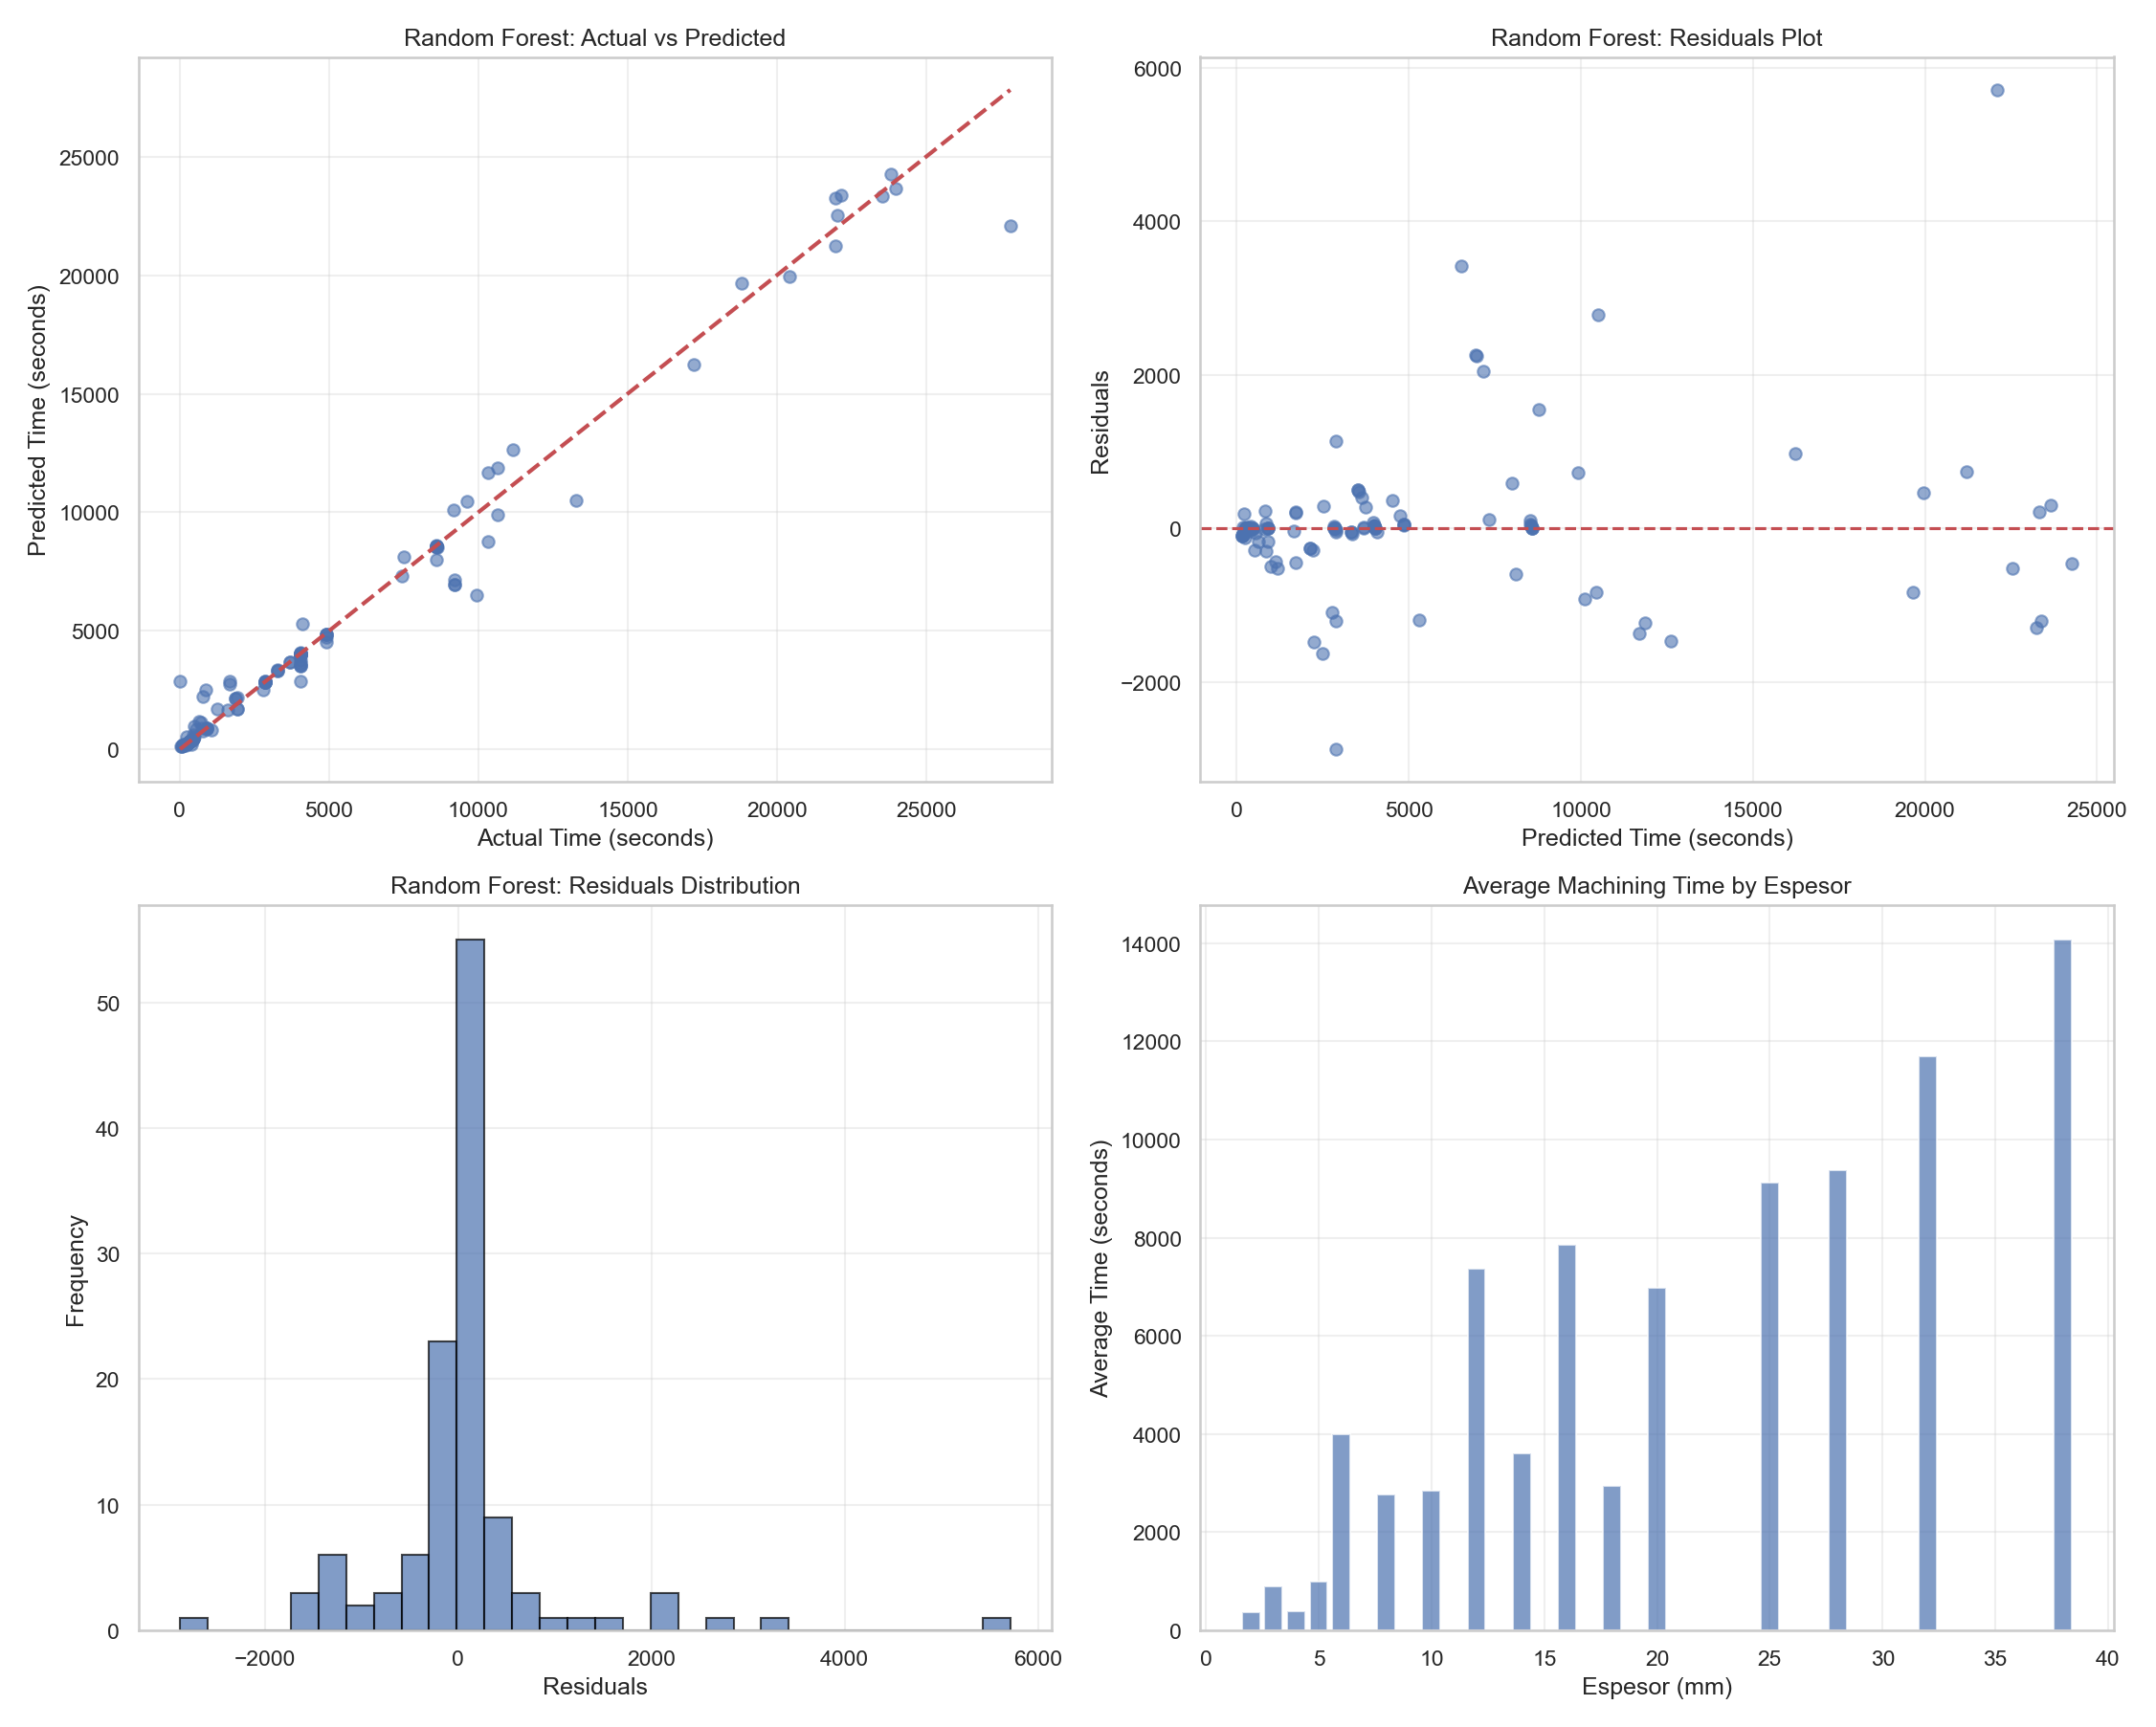

✅ Model loaded successfully!
Model accuracy: 0.9784 R²
Average error: 456.8 seconds
Typical error: ±933.6 seconds
Predicted time: 17.3 minutes
Range: 1.8 - 32.9 minutes
✅ Model loaded successfully!
Model accuracy: 0.9784 R²
Average error: 456.8 seconds
Typical error: ±933.6 seconds
   Espesor (mm)  Cutting Length (m)  Predicted Time (minutes)  \
0          10.0                 1.5                       2.5   
1          15.0                 2.0                      15.0   
2          20.0                 3.0                       8.0   

   Min Time (minutes)  Max Time (minutes)  
0               -13.1                18.1  
1                -0.6                30.6  
2                -7.5                23.6  


In [35]:
# Load and prepare data
 # Replace with your file path
model, scaler, feature_columns, metrics = train_and_save_model(file_dir)

# 2. Make predictions (use this anytime)
result = predict_machining_time(espesor=15.0, cutting_length=2.5)
print(f"Predicted time: {result['predicted_time_minutes']} minutes")
print(f"Range: {result['estimated_range_min']} - {result['estimated_range_max']} minutes")

# 3. Batch predictions
jobs = [(10.0, 1.5), (15.0, 2.0), (20.0, 3.0)]
batch_results = predict_multiple_jobs(jobs)
print(batch_results)


In [36]:
result = predict_machining_time(espesor=15.0, cutting_length=2.5)
print(f"Time: {result['predicted_time_minutes']} minutes")

✅ Model loaded successfully!
Model accuracy: 0.9784 R²
Average error: 456.8 seconds
Typical error: ±933.6 seconds
Time: 17.3 minutes
